Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!
  
  - Folium maps have custom Javascript and won't display in GitHub : https://stackoverflow.com/questions/53240378/folium-map-fail-to-render-in-notebook-on-github


# CoronaVirus Prediction

### Number of Day to Predict 21

In [1]:
%autosave 360

Autosaving every 360 seconds


In [2]:
num_days_R_prediction=21

In [3]:
#!pip install rpy2
import rpy2
%load_ext rpy2.ipython
%Rpush num_days_R_prediction

In [4]:
%%R
max_days_prediction<-num_days_R_prediction

In [5]:
bypass_weather=1 # =1 bypass weather_pi api calls
#
number_past_days_training=12 # =(8/14) * num_days_R_prediction  # Number of Past days on training # max to be on 6.Feb.2020
#
max_countries_map=50
#
## DROP_N=15 => 06/02
## DROP_N=45 => 08/03
## DROP_N=75 => 07/04
## DROP_N=145 => 15/06
## DROP_N=175 => 15/07
#
drop_n_dataset_days=235
#

### Load Data from Github - John Hopkins Institute 

In [6]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [7]:
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                             NaN             Afghanistan  33.939110   
1                             NaN                 Albania  41.153300   
2                             NaN                 Algeria  28.033900   
3                             NaN                 Andorra  42.506300   
4                             NaN                  Angola -11.202700   
5                             NaN     Antigua and Barbuda  17.060800   
6                             NaN               Argentina -38.416100   
7                             NaN                 Armenia  40.069100   
8    Australian Capital Territory               Australia -35.473500   
9                 New South Wales               Australia -33.868800   
10             Northern Territory               Australia -12.463400   
11                     Queensland               Australia -27.469800   
12                South Australia               Australia -34.928500   
13                       Tasmania               Australia -42.882100   
14                       Victoria               Australia -37.813600   
15              Western Australia               Australia -31.950500   
16                            NaN                 Austria  47.516200   
17                            NaN              Azerbaijan  40.143100   
18                            NaN                 Bahamas  25.025885   
19                            NaN                 Bahrain  26.027500   
20                            NaN              Bangladesh  23.685000   
21                            NaN                Barbados  13.193900   
22                            NaN                 Belarus  53.709800   
23                            NaN                 Belgium  50.833300   
24                            NaN                  Belize  17.189900   
25                            NaN                   Benin   9.307700   
26                            NaN                  Bhutan  27.514200   
27                            NaN                 Bolivia -16.290200   
28                            NaN  Bosnia and Herzegovina  43.915900   
29                            NaN                Botswana -22.328500   
..                            ...                     ...        ...   
243                           NaN                Thailand  15.870032   
244                           NaN             Timor-Leste  -8.874217   
245                           NaN                    Togo   8.619500   
246                           NaN     Trinidad and Tobago  10.691800   
247                           NaN                 Tunisia  33.886917   
248                           NaN                  Turkey  38.963700   
249                           NaN           United States  40.000000   
250                           NaN                  Uganda   1.373333   
251                           NaN                 Ukraine  48.379400   
252                           NaN    United Arab Emirates  23.424076   
253                      Anguilla          United Kingdom  18.220600   
254                       Bermuda          United Kingdom  32.307800   
255        British Virgin Islands          United Kingdom  18.420700   
256                Cayman Islands          United Kingdom  19.313300   
257               Channel Islands          United Kingdom  49.372300   
258   Falkland Islands (Malvinas)          United Kingdom -51.796300   
259                     Gibraltar          United Kingdom  36.140800   
260                   Isle of Man          United Kingdom  54.236100   
261                    Montserrat          United Kingdom  16.742498   
262      Turks and Caicos Islands          United Kingdom  21.694000   
263                           NaN          United Kingdom  55.378100   
264                           NaN                 Uruguay -32.522800   
265                           NaN              Uzbekistan  41.377491   
266                           NaN                 Vanuatu -

## Get Population

In [8]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [9]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                             NaN             Afghanistan  33.939110   
1                             NaN                 Albania  41.153300   
2                             NaN                 Algeria  28.033900   
3                             NaN                 Andorra  42.506300   
4                             NaN                  Angola -11.202700   
5                             NaN     Antigua and Barbuda  17.060800   
6                             NaN               Argentina -38.416100   
7                             NaN                 Armenia  40.069100   
8    Australian Capital Territory               Australia -35.473500   
9                 New South Wales               Australia -33.868800   
10             Northern Territory               Australia -12.463400   
11                     Queensland               Australia -27.469800   
12                South Australia               Australia -34.928500   
13                       Tasmania               Australia -42.882100   
14                       Victoria               Australia -37.813600   
15              Western Australia               Australia -31.950500   
16                            NaN                 Austria  47.516200   
17                            NaN              Azerbaijan  40.143100   
18                            NaN                 Bahamas  25.025885   
19                            NaN                 Bahrain  26.027500   
20                            NaN              Bangladesh  23.685000   
21                            NaN                Barbados  13.193900   
22                            NaN                 Belarus  53.709800   
23                            NaN                 Belgium  50.833300   
24                            NaN                  Belize  17.189900   
25                            NaN                   Benin   9.307700   
26                            NaN                  Bhutan  27.514200   
27                            NaN                 Bolivia -16.290200   
28                            NaN  Bosnia and Herzegovina  43.915900   
29                            NaN                Botswana -22.328500   
..                            ...                     ...        ...   
249                           NaN                Thailand  15.870032   
250                           NaN             Timor-Leste  -8.874217   
251                           NaN                    Togo   8.619500   
252                           NaN     Trinidad and Tobago  10.691800   
253                           NaN                 Tunisia  33.886917   
254                           NaN                  Turkey  38.963700   
255                           NaN           United States  40.000000   
256                           NaN                  Uganda   1.373333   
257                           NaN                 Ukraine  48.379400   
258                           NaN    United Arab Emirates  23.424076   
259                      Anguilla          United Kingdom  18.220600   
260                       Bermuda          United Kingdom  32.307800   
261        British Virgin Islands          United Kingdom  18.420700   
262                Cayman Islands          United Kingdom  19.313300   
263               Channel Islands          United Kingdom  49.372300   
264   Falkland Islands (Malvinas)          United Kingdom -51.796300   
265                     Gibraltar          United Kingdom  36.140800   
266                   Isle of Man          United Kingdom  54.236100   
267                    Montserrat          United Kingdom  16.742498   
268      Turks and Caicos Islands          United Kingdom  21.694000   
269                           NaN          United Kingdom  55.378100   
270                           NaN                 Uruguay -32.522800   
271                           NaN              Uzbekistan  41.377491   
272                           NaN                 Vanuatu -

In [10]:
# merge region death
death.iloc[185:195,:]

Province/State Country/Region        Lat        Long  1/22/20  1/23/20  \
185            NaN     Mauritania  21.007900  -10.940800        0        0   
186            NaN      Mauritius -20.348404   57.552152        0        0   
187            NaN         Mexico  23.634500 -102.552800        0        0   
188            NaN     Micronesia   7.425600  150.550800        0        0   
189            NaN        Moldova  47.411600   28.369900        0        0   
190            NaN         Monaco  43.733300    7.416700        0        0   
191            NaN       Mongolia  46.862500  103.846700        0        0   
192            NaN     Montenegro  42.708678   19.374390        0        0   
193            NaN        Morocco  31.791700   -7.092600        0        0   
194            NaN     Mozambique -18.665695   35.529562        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  2/6/21  2/7/21  2/8/21  2/9/21  \
185        0        0        0        0  ...     425     426     427     427   
186        0        0        0        0  ...      10      10      10      10   
187        0        0        0        0  ...  165786  166200  166731  168432   
188        0        0        0        0  ...       0       0       0       0   
189        0        0        0        0  ...    3530    3543    3557    3573   
190        0        0        0        0  ...      19      19      19      19   
191        0        0        0        0  ...       2       2       2       2   
192        0        0        0        0  ...     836     838     842     852   
193        0        0        0        0  ...    8381    8394    8408    8424   
194        0        0        0        0  ...     451     460     465     480   

     2/10/21  2/11/21  2/12/21  2/13/21   Population           region  
185      427      427      427      428     4,649,658  Mauritania_nan  
186       10       10       10       10           NaN   Mauritius_nan  
187   169760   171234   172557   173771   128,640,794      Mexico_nan  
188        0        0        0        0           NaN  Micronesia_nan  
189     3589     3607     3626     3640     4,035,942     Moldova_nan  
190       19       19       21       21        39,183      Monaco_nan  
191        2        2        2        2           NaN    Mongolia_nan  
192      861      869      880      882       622 500  Montenegro_nan  
193     8436     8440     8450     8460    36,817,128     Morocco_nan  
194      486      501      514      525    31,542,919  Mozambique_nan  

[10 rows x 395 columns]

In [11]:
# merge region recover
recover.iloc[175:185,:]

Province/State Country/Region        Lat      Long  \
175                               NaN     Montenegro  42.708678  19.37439   
176                               NaN        Morocco  31.791700  -7.09260   
177                               NaN     Mozambique -18.665700  35.52960   
178                               NaN        Namibia -22.957600  18.49040   
179                               NaN          Nepal  28.166700  84.25000   
180                             Aruba    Netherlands  12.521100 -69.96830   
181  Bonaire, Sint Eustatius and Saba    Netherlands  12.178400 -68.23850   
182                           Curacao    Netherlands  12.169600 -68.99000   
183                      Sint Maarten    Netherlands  18.042500 -63.05480   
184                               NaN    Netherlands  52.132600   5.29130   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  2/6/21  \
175        0        0        0        0        0        0  ...   56228   
176        0        0        0        0        0        0  ...  453921   
177        0        0        0        0        0        0  ...   26790   
178        0        0        0        0        0        0  ...   33359   
179        0        0        0        0        0        0  ...  267812   
180        0        0        0        0        0        0  ...    6796   
181        0        0        0        0        0        0  ...     180   
182        0        0        0        0        0        0  ...    4530   
183        0        0        0        0        0        0  ...    1780   
184        0        0        0        0        0        0  ...       0   

     2/7/21  2/8/21  2/9/21  2/10/21  2/11/21  2/12/21  2/13/21   Population   \
175   56731   57093   57423    57898    58210    58561    58927       622 500   
176  454504  454997  456032   456751   457325   457956   458504    36,817,128   
177   27162   27438   27814    28395    30124    31016    31506    31,542,919   
178   33454   33573   33675    33778    33950    34002    34099     2,540,905   
179  268072  268266  268431   268549   268660   268796   268929    29,300,000   
180    6834    6881    6902     6922     6962     7017     7067       116,600   
181     180     180     180      180      180      180      180           NaN   
182    4535    4539    4545     4547     4557     4559     4559       158,665   
183    1780    1794    1817     1828     1869     1870     1889           NaN   
184       0       0       0        0        0        0        0    17,180,000   

                                           region  
175                                Montenegro_nan  
176                                   Morocco_nan  
177                                Mozambique_nan  
178                                   Namibia_nan  
179                                     Nepal_nan  
180                             Netherlands_Aruba  
181  Netherlands_Bonaire, Sint Eustatius and Saba  
182                           Netherlands_Curacao  
183                      Netherlands_Sint Maarten  
184                               Netherlands_nan  

[10 rows x 395 columns]

In [12]:
confirmed.iloc[185:195,:]

Province/State Country/Region        Lat        Long  1/22/20  1/23/20  \
185            NaN     Mauritania  21.007900  -10.940800        0        0   
186            NaN      Mauritius -20.348404   57.552152        0        0   
187            NaN         Mexico  23.634500 -102.552800        0        0   
188            NaN     Micronesia   7.425600  150.550800        0        0   
189            NaN        Moldova  47.411600   28.369900        0        0   
190            NaN         Monaco  43.733300    7.416700        0        0   
191            NaN       Mongolia  46.862500  103.846700        0        0   
192            NaN     Montenegro  42.708678   19.374390        0        0   
193            NaN        Morocco  31.791700   -7.092600        0        0   
194            NaN     Mozambique -18.665695   35.529562        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...   2/6/21   2/7/21   2/8/21  \
185        0        0        0        0  ...    16792    16807    16827   
186        0        0        0        0  ...      584      584      593   
187        0        0        0        0  ...  1926080  1932145  1936013   
188        0        0        0        0  ...        1        1        1   
189        0        0        0        0  ...   164243   164569   164858   
190        0        0        0        0  ...     1647     1655     1665   
191        0        0        0        0  ...     2023     2073     2120   
192        0        0        0        0  ...    64739    65227    65657   
193        0        0        0        0  ...   474966   475355   475589   
194        0        0        0        0  ...    44112    44600    44912   

      2/9/21  2/10/21  2/11/21  2/12/21  2/13/21   Population           region  
185    16868    16902    16925    16954    16965     4,649,658  Mauritania_nan  
186      594      595      595      595      595           NaN   Mauritius_nan  
187  1946751  1957889  1968566  1978954  1988695   128,640,794      Mexico_nan  
188        1        1        1        1        1           NaN  Micronesia_nan  
189   165663   166553   167546   168826   169805     4,035,942     Moldova_nan  
190     1695     1717     1735     1752     1755        39,183      Monaco_nan  
191     2174     2207     2247     2293     2351           NaN    Mongolia_nan  
192    66234    66857    67441    68004    68476       622 500  Montenegro_nan  
193   476125   476689   477160   477656   478135    36,817,128     Morocco_nan  
194    45785    46736    47790    48588    49135    31,542,919  Mozambique_nan  

[10 rows x 395 columns]

In [13]:
confirmed.iloc[220:230,:]

Province/State                    Country/Region        Lat        Long  \
220            NaN                            Rwanda  -1.940300   29.873900   
221            NaN             Saint Kitts and Nevis  17.357822  -62.782998   
222            NaN                       Saint Lucia  13.909400  -60.978900   
223            NaN  Saint Vincent and the Grenadines  12.984300  -61.287200   
224            NaN                             Samoa -13.759000 -172.104600   
225            NaN                        San Marino  43.942400   12.457800   
226            NaN             Sao Tome and Principe   0.186400    6.613100   
227            NaN                      Saudi Arabia  23.885942   45.079162   
228            NaN                           Senegal  14.497400  -14.452400   
229            NaN                            Serbia  44.016500   21.005900   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  2/6/21  \
220        0        0        0        0        0        0  ...   16337   
221        0        0        0        0        0        0  ...      40   
222        0        0        0        0        0        0  ...    1813   
223        0        0        0        0        0        0  ...    1202   
224        0        0        0        0        0        0  ...       2   
225        0        0        0        0        0        0  ...    3127   
226        0        0        0        0        0        0  ...    1351   
227        0        0        0        0        0        0  ...  369961   
228        0        0        0        0        0        0  ...   28489   
229        0        0        0        0        0        0  ...  406352   

     2/7/21  2/8/21  2/9/21  2/10/21  2/11/21  2/12/21  2/13/21   Population   \
220   16451   16621   16811    16941    17068    17200    17267    12,952,218   
221      40      40      40       40       40       40       40           NaN   
222    1813    2027    2027     2027     2415     2487     2487       184,106   
223    1269    1283    1283     1340     1370     1370     1418       110,940   
224       2       2       2        2        2        2        2           NaN   
225    3127    3137    3187     3213     3247     3278     3278        33,916   
226    1351    1355    1385     1430     1431     1478     1482           NaN   
227  370278  370634  370987   371356   371720   372073   372410    34,695,447   
228   28760   29057   29245    29521    29914    30376    30641    16,743,927   
229  407881  409841  411855   413943   415943   417871   419493     8,744,671   

                                   region  
220                            Rwanda_nan  
221             Saint Kitts and Nevis_nan  
222                       Saint Lucia_nan  
223  Saint Vincent and the Grenadines_nan  
224                             Samoa_nan  
225                        San Marino_nan  
226             Sao Tome and Principe_nan  
227                      Saudi Arabia_nan  
228                           Senegal_nan  
229                            Serbia_nan  

[10 rows x 395 columns]

## Create Time Series + Plots

In [14]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [15]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

In [16]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
plt.show()

No handles with labels found to put in legend.


<Figure size 640x480 with 1 Axes>

Text(0.5, 1.0, 'Daily Update - Total Recovered - Major_4,25 2nd Areas')

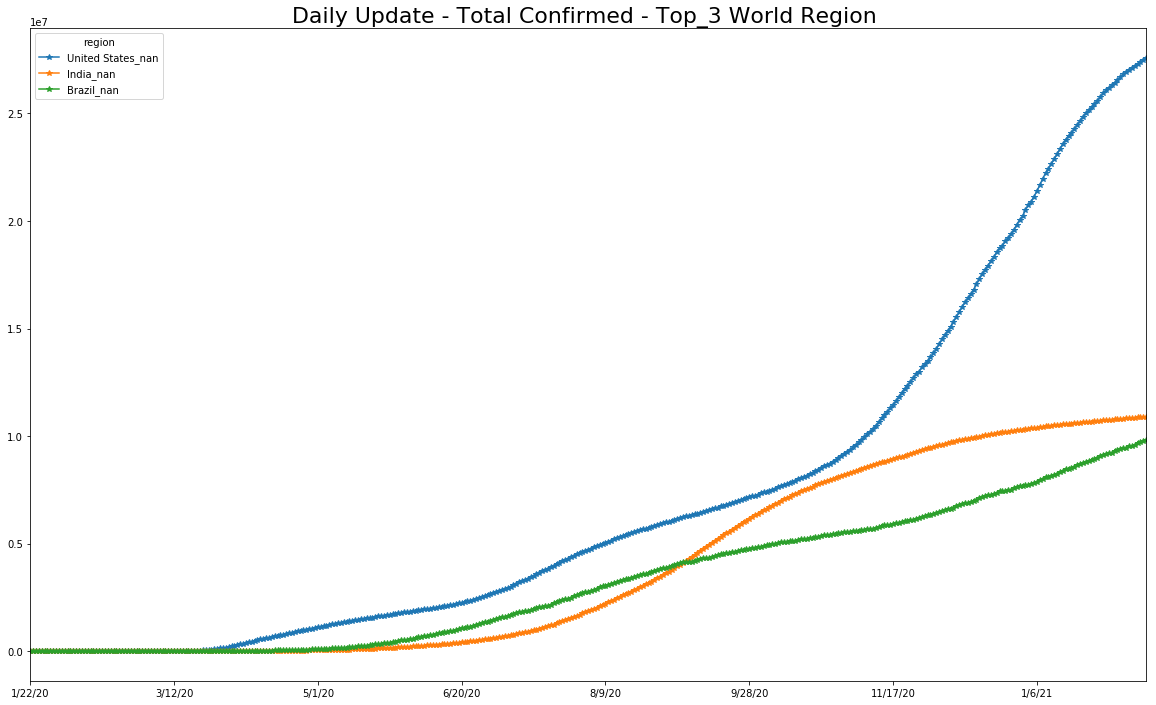

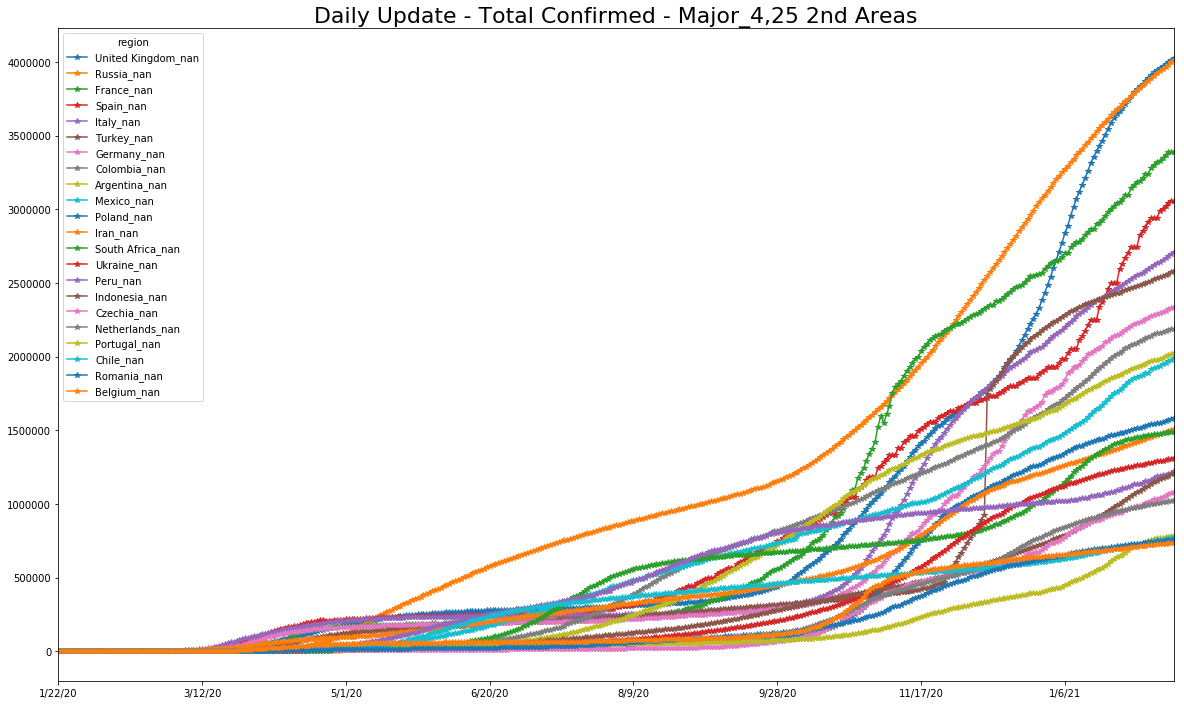

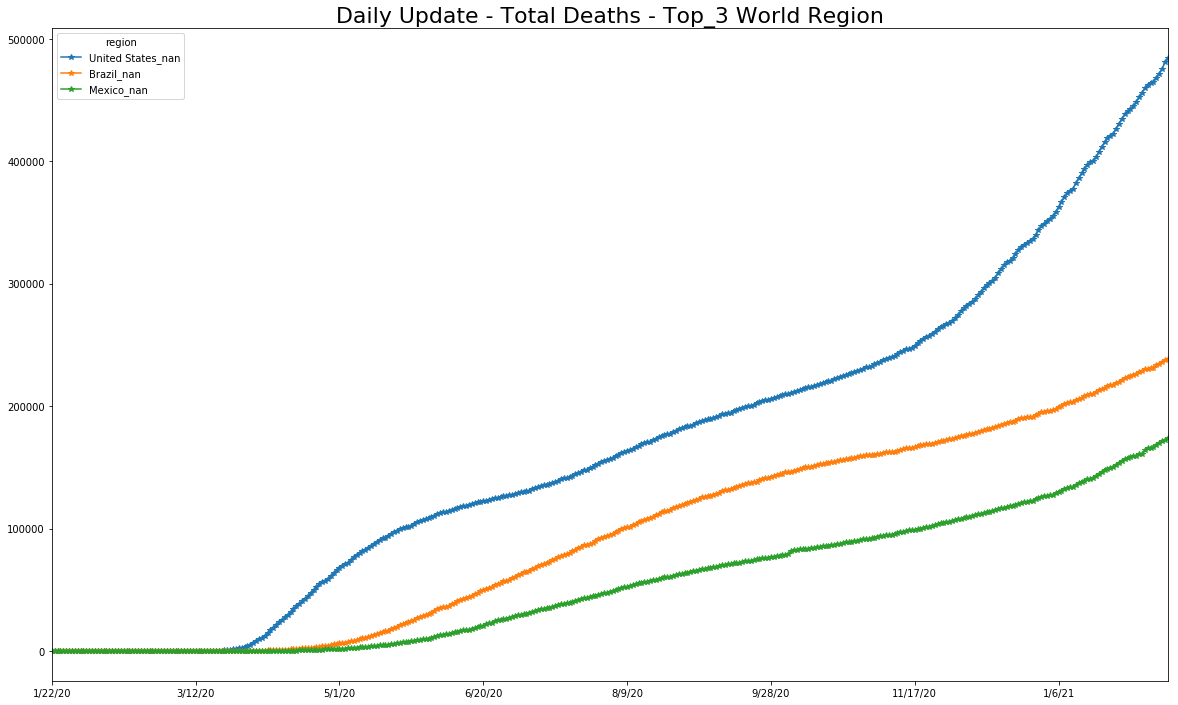

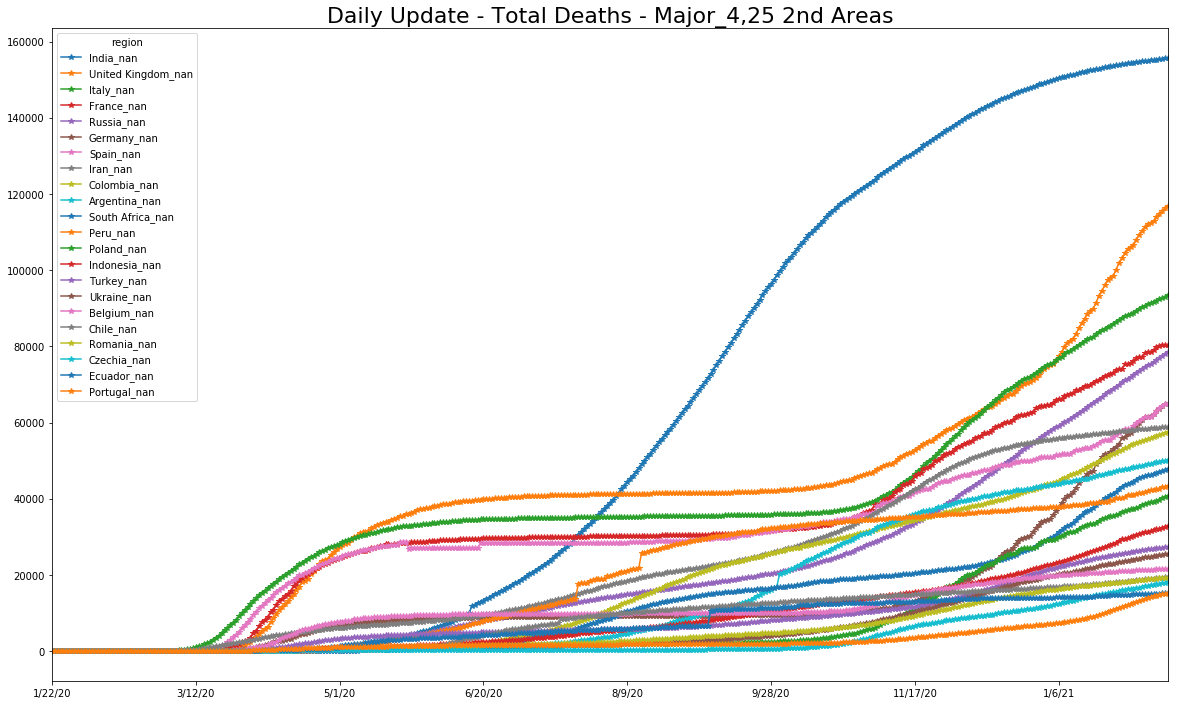

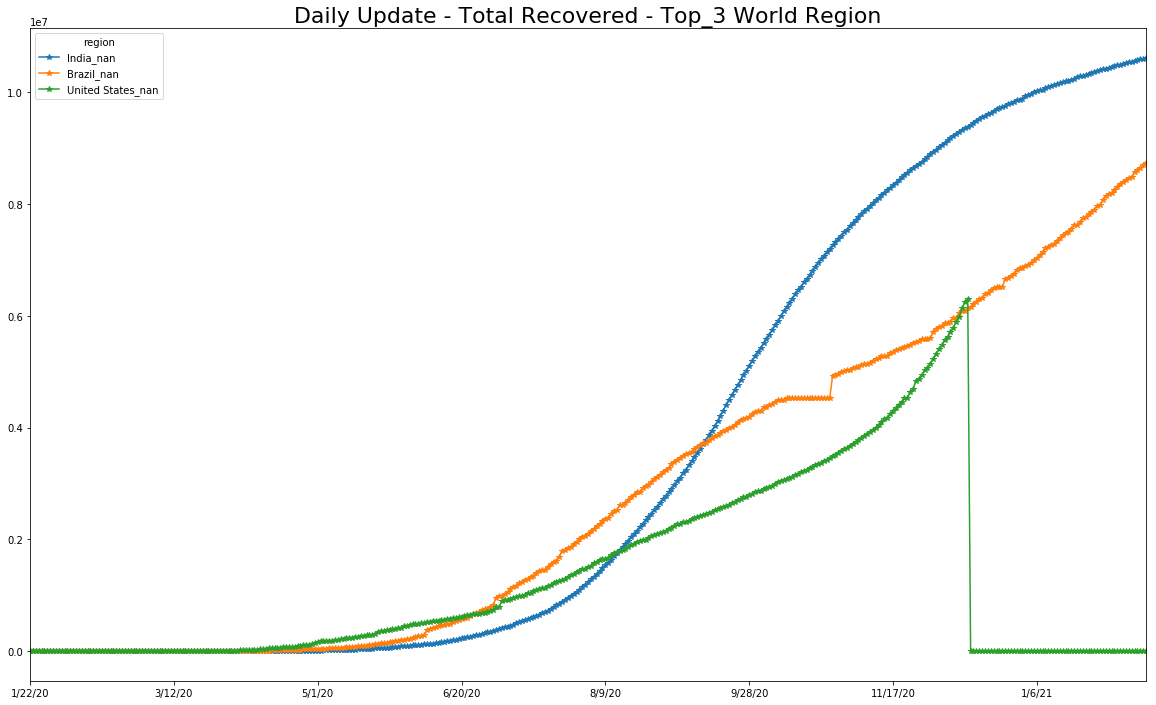

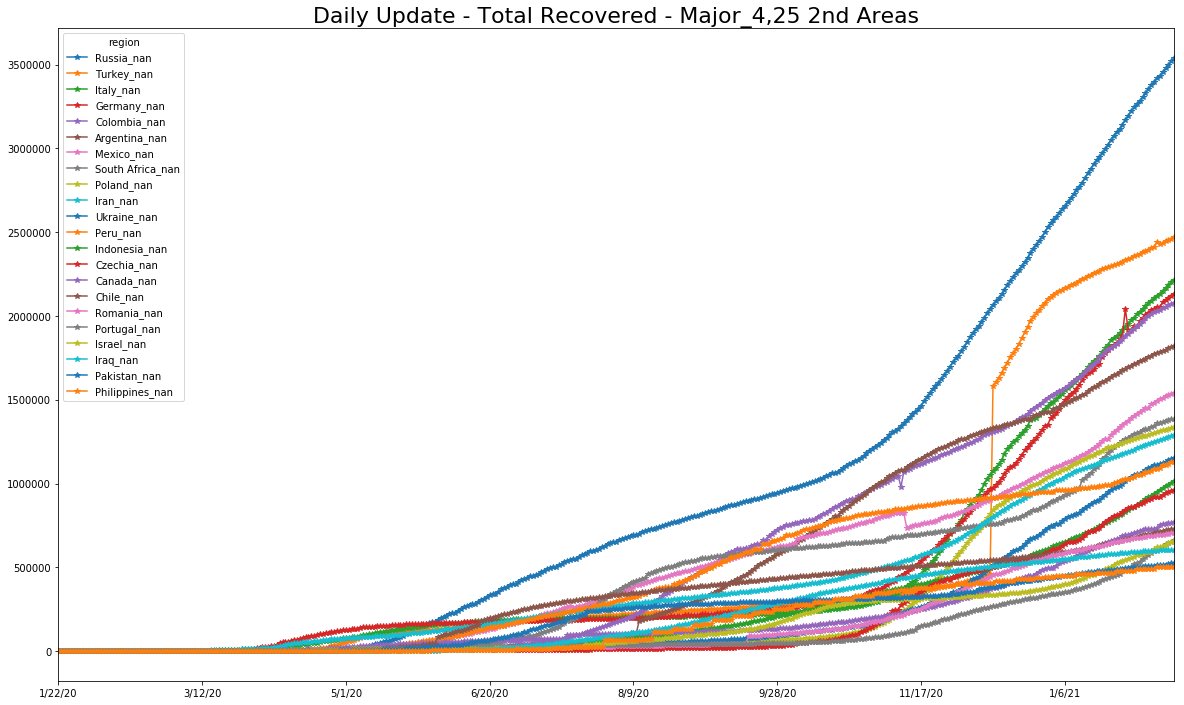

In [17]:
#
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts_d.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts_rec.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [18]:
#!pip install pyweatherbit
#
from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime

#
api_key="29d9e51c56b94621b16297bcdeee9c4d" # hxj@mail.xcom
#

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [19]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Portugal_nan',
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
        'Poland_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      # 'Australia_Queensland',
      # 'Australia_South Australia', 'Australia_Victoria', 
        'Brazil_nan',
      # 'Cambodia_nan',
      # 'Canada_British Columbia',
        'Canada_Ontario',
        'Canada_Quebec',
      # 'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      # 'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
     #  'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Austria_nan',
     #  'Taiwan*_nan', 
     #  'Vietnam_nan',
        'Turkey_nan',
        'Peru_nan',
        'Chile_nan',
        'Mexico_nan'
       ]
#

#### Weather History

In [20]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=len(confirmed.iloc[1])-1 #90# 89 #88 #87 #86 #85 #84 #83 #82 #81 #80 #79 #78 #77 #76 #75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

my_weather_fetch_list= my_train_list # ['Canada_Quebec'] #  ['Iran_nan'] #['Brazil_nan'] #

start_date_init=pd.to_datetime('today').strftime('%Y/%m/%d') # '2020-04-18'
print('start_date_init=',start_date_init)
offset_days=-1 # -1 to start yesterday pick today # API free-tier just picks one per api call!
max_days=1 #1

w=pd.DataFrame(columns=['date','region','min','max'])
if bypass_weather != 1 :
    for h in range(0,max_days):
        offset_days=h
        start_date=pd.to_datetime(start_date_init)
        #
        end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
        start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
        prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
        prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
        #
        for i in range (1,len(confirmed)):
            if confirmed.iloc[i,vpos] not in my_weather_fetch_list:
                continue
            if confirmed.iloc[i,vpos] in my_weather_fetch_list:
                #
                # Clean JSON structure return from API Call
                jas=""
                jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
                if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                     or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                    continue
                try:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
                except Exception:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
    #        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

xcountry_region=Albania_nan
start_date_init= 2021/02/14


In [21]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [22]:
w[:]

Empty DataFrame
Columns: [date, region, min, max]
Index: []

## Kalman Filter With R

In [23]:
# Joao - FIX - Improve Performance 
### Drop the Months of Jan, Feb < 06/02 as
### they are too in the Past and model no longuer trains in China Hubei only!
#
## DROP_N=75 => 07/04

drop_n=drop_n_dataset_days

ts=ts[drop_n:]
ts_d=ts_d[drop_n:]
ts_rec=ts_rec[drop_n:]

In [24]:
ts[:3]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
9/13/20            38716        11353        48254         1344        3388   
9/14/20            38772        11520        48496         1438        3439   
9/15/20            38815        11672        48734         1438        3569   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
9/13/20                       95         555537        45862   
9/14/20                       95         565446        45969   
9/15/20                       95         577338        46119   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
9/13/20                                     113                       4170   
9/14/20                                     113                       4177   
9/15/20                                     113                       4185   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Vanuatu_nan  \
9/13/20  ...            6520750         1808           47287            0   
9/14/20  ...            6555127         1812           47836            0   
9/15/20  ...            6594554         1827           48429            0   

region   Venezuela_nan  Vietnam_nan  West Bank and Gaza_nan  Yemen_nan  \
9/13/20          60540         1063                   30574       2011   
9/14/20          61569         1063                   31362       2013   
9/15/20          62655         1063                   32250       2016   

region   Zambia_nan  Zimbabwe_nan  
9/13/20       13539          7526  
9/14/20       13720          7531  
9/15/20       13819          7576  

[3 rows x 273 columns]

In [25]:
ts[-4:]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
2/10/21            55402        88671       109782        10352       20210   
2/11/21            55420        89776       110049        10391       20261   
2/12/21            55445        90835       110303        10427       20294   
2/13/21            55473        91987       110513        10463       20329   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
2/10/21                      350        2001034       168496   
2/11/21                      381        2008345       168676   
2/12/21                      419        2015496       168830   
2/13/21                      427        2021553       169022   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
2/10/21                                     118                       5132   
2/11/21                                     118                       5134   
2/12/21                                     118                       5136   
2/13/21                                     118                       5138   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Vanuatu_nan  \
2/10/21  ...           27287159        46778           79237            1   
2/11/21  ...           27392512        47254           79303            1   
2/12/21  ...           27492023        47828           79340            1   
2/13/21  ...           27574201        48459           79381            1   

region   Venezuela_nan  Vietnam_nan  West Bank and Gaza_nan  Yemen_nan  \
2/10/21         131476         2091                  164736       2133   
2/11/21         131828         2140                  165535       2134   
2/12/21         132259         2142                  166200       2136   
2/13/21         132743         2195                  166800       2136   

region   Zambia_nan  Zimbabwe_nan  
2/10/21       65573         34864  
2/11/21       66598         34864  
2/12/21       67681         35045  
2/13/21       68454         35104  

[4 rows x 273 columns]

In [26]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [27]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')

Sys.setenv(TZ='GMT')
Sys.timezone()

[1] "GMT"


In [28]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: 
── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = "")
)
ℹ Use `spec()` for the full column specifications.




In [29]:
p=%R pred_all

In [30]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [31]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

w_v2_v2=pd.read_csv('data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w_v2_v227=pd.read_csv('data/w_v2_v227.csv', sep=',', encoding='latin1')
w_v2_v227['date']=pd.to_datetime(w_v2_v227['date'],format='%Y/%m/%d')

w=pd.read_csv('data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

### Append Weather fetched now to file w_v2_v2
w_n_forward=w_v2_v2.append(w_v2_v227) 
w_n_forward=w_n_forward.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_n_forward=w_n_forward.sort_values(by=['region','date'], ascending=True)
w_n_forward.to_csv(r'data/w_v2_v2.csv', index = False, header=True)

In [32]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2).append(w_v2_v227) 
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [33]:
w_in_model=pd.read_csv('data/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [34]:
w_in_model.tail(2)

date       region   min   max
8379 2020-05-10  Vietnam_nan  26.9  33.0
8380 2020-05-11  Vietnam_nan  25.0  33.0

### Build Train Set Data Structure

In [35]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [36]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-2,2]*100 -1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-4,2]*100 -1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-8,2]*100 -1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(10000000) ### Fill 10M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=(((train['last_day'] +1)*100)/((train['population'] +1)*100000) *10) # *100 - % converter
 #
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
train=train.merge(w_in_model,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app


In [37]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date           region  confirmed  1_day_change  3_day_change  \
1     2020-09-14  Afghanistan_nan      38772             0             0   
2     2020-09-15  Afghanistan_nan      38815            56             0   
3     2020-09-16  Afghanistan_nan      38855            43             0   
4     2020-09-17  Afghanistan_nan      38872            40           139   
5     2020-09-18  Afghanistan_nan      38897            17           100   
6     2020-09-19  Afghanistan_nan      38919            25            82   
7     2020-09-20  Afghanistan_nan      39044            22            64   
8     2020-09-21  Afghanistan_nan      39074           125           172   
9     2020-09-22  Afghanistan_nan      39096            30           177   
10    2020-09-23  Afghanistan_nan      39145            22           177   
11    2020-09-24  Afghanistan_nan      39170            49           101   
12    2020-09-25  Afghanistan_nan      39186            25            96   
13    2020-09-26  Afghanistan_nan      39192            16            90   
14    2020-09-27  Afghanistan_nan      39227             6            47   
15    2020-09-28  Afghanistan_nan      39239            35            57   
16    2020-09-29  Afghanistan_nan      39254            12            53   
17    2020-09-30  Afghanistan_nan      39268            15            62   
18    2020-10-01  Afghanistan_nan      39285            14            41   
19    2020-10-02  Afghanistan_nan      39290            17            46   
20    2020-10-03  Afghanistan_nan      39297             5            36   
21    2020-10-04  Afghanistan_nan      39341             7            29   
22    2020-10-05  Afghanistan_nan      39422            44            56   
23    2020-10-06  Afghanistan_nan      39486            81           132   
24    2020-10-07  Afghanistan_nan      39548            64           189   
25    2020-10-08  Afghanistan_nan      39616            62           207   
26    2020-10-09  Afghanistan_nan      39693            68           194   
27    2020-10-10  Afghanistan_nan      39703            77           207   
28    2020-10-11  Afghanistan_nan      39799            10           155   
29    2020-10-12  Afghanistan_nan      39870            96           183   
30    2020-10-13  Afghanistan_nan      39928            71           177   
...          ...              ...        ...           ...           ...   
43215 2021-01-16     Zimbabwe_nan      26881           741          2870   
43216 2021-01-17     Zimbabwe_nan      27203           772          2625   
43217 2021-01-18     Zimbabwe_nan      27892           322          1835   
43218 2021-01-19     Zimbabwe_nan      28675           689          1783   
43219 2021-01-20     Zimbabwe_nan      29408           783          1794   
43220 2021-01-21     Zimbabwe_nan      30047           733          2205   
43221 2021-01-22     Zimbabwe_nan      30523           639          2155   
43222 2021-01-23     Zimbabwe_nan      31007           476          1848   
43223 2021-01-24     Zimbabwe_nan      31320           484          1599   
43224 2021-01-25     Zimbabwe_nan      31646           313          1273   
43225 2021-01-26     Zimbabwe_nan      32004           326          1123   
43226 2021-01-27     Zimbabwe_nan      32304           358           997   
43227 2021-01-28     Zimbabwe_nan      32646           300           984   
43228 2021-01-29     Zimbabwe_nan      32952           342          1000   
43229 2021-01-30     Zimbabwe_nan      33273           306           948   
43230 2021-01-31     Zimbabwe_nan      33388           321           969   
43231 2021-02-01     Zimbabwe_nan      33548           115           742   
43232 2021-02-02     Zimbabwe_nan      33814           160           596   
43233 2021-02-03     Zimbabwe_nan      33964           266           541   
43234 2021-02-04     Zimbabwe_nan      34171           150           576   
43235 2021-02-05     Zimbabwe_nan      34331           207  

In [38]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [39]:
# Joao - Fix - Nulls are an issue

train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
43244 2021-02-14  Zimbabwe_nan          0            59           240   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
43244           617         100.168384         100.688418         101.789109   

       last_day  kalman_prediction  population  infected_rate  min  max  
43244     35104            35204.0    14862924       0.000024  NaN  NaN

In [40]:
## JOAO - FIX Drop Duplicates
train=train.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
## JOAO - FIX Drop empty region='nan_nan'
train=train[train['region']!='nan_nan']
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
43244 2021-02-14  Zimbabwe_nan          0            59           240   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
43244           617         100.168384         100.688418         101.789109   

       last_day  kalman_prediction  population  infected_rate  min  max  
43244     35104            35204.0    14862924       0.000024  NaN  NaN

In [41]:
train.to_csv(r'data/train.csv', index = False, header=True)

##Shared -- Ratio in Confirmed - 21Day Forecast -- train 25April2020 - I
ratiod=pd.read_csv('data/train.csv', sep=',', encoding='latin1')
todayd=datetime.today().strftime('%Y-%m-%d')
ratiofn="World v2 -- Confirmed - "+str(num_days_R_prediction)+"Day Forecast -- train "+todayd+".csv"

ratiod['population_percentage : infected_rate confirmed']=ratiod['infected_rate']*100
### Assumption : Each affected person can contact up to 9 others that not report or are assimptomatic COVID19 cases.
ratiod['population_percentage : factor 9/10 infected_rate confirmed']=np.clip(ratiod['infected_rate']*900,0.0,1.0)
#
ratiod['delta : pred new_cases']=ratiod['kalman_prediction']-ratiod['last_day']
ratiod['delta : pred new_cases per 1M hab']=ratiod['delta : pred new_cases']/ratiod['population']*1000000

### roling 7day_AVG
ratiod['delta : roling 7day AVG']=ratiod['7_day_change']/7
ratiod['delta : aprox 14-day case notification rate per 100k hab']=(ratiod['7_day_change']*2)/ratiod['population']*100000
###

ratiod=ratiod.rename(columns={'kalman_prediction': 'confirmed_prediction', 'last_day': 'confirmed_yesterday'})
ratiod.to_csv(r'data/'+ratiofn, index = False, header=True)
ratiod[-3:]

date        region  confirmed  1_day_change  3_day_change  \
42312  2021-02-12  Zimbabwe_nan      35045             0           206   
42313  2021-02-13  Zimbabwe_nan      35104           181           264   
42314  2021-02-14  Zimbabwe_nan          0            59           240   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
42312           693         100.000029         100.594408         102.028065   
42313           714         100.519189         100.759064         102.079782   
42314           617         100.168384         100.688418         101.789109   

       confirmed_yesterday  ...  population  infected_rate  min  max  \
42312                34864  ...    14862924       0.000023  NaN  NaN   
42313                35045  ...    14862924       0.000024  NaN  NaN   
42314                35104  ...    14862924       0.000024  NaN  NaN   

       population_percentage : infected_rate confirmed  \
42312                                         0.002346   
42313                                         0.002358   
42314                                         0.002362   

       population_percentage : factor 9/10 infected_rate confirmed  \
42312                                           0.021112             
42313                                           0.021222             
42314                                           0.021257             

       delta : pred new_cases  delta : pred new_cases per 1M hab  \
42312                   171.0                          11.505139   
42313                    85.0                           5.718929   
42314                   100.0                           6.728151   

       delta : roling 7day AVG  \
42312                99.000000   
42313               102.000000   
42314                88.142857   

       delta : aprox 14-day case notification rate per 100k hab  
42312                                           9.325218         
42313                                           9.607800         
42314                                           8.302539         

[3 rows x 21 columns]

## Kalman 1 day Prediction with Evaluation

                region           mse          rmse            mae
263  United States_nan  4.982183e+12  2.232080e+06  214866.032468


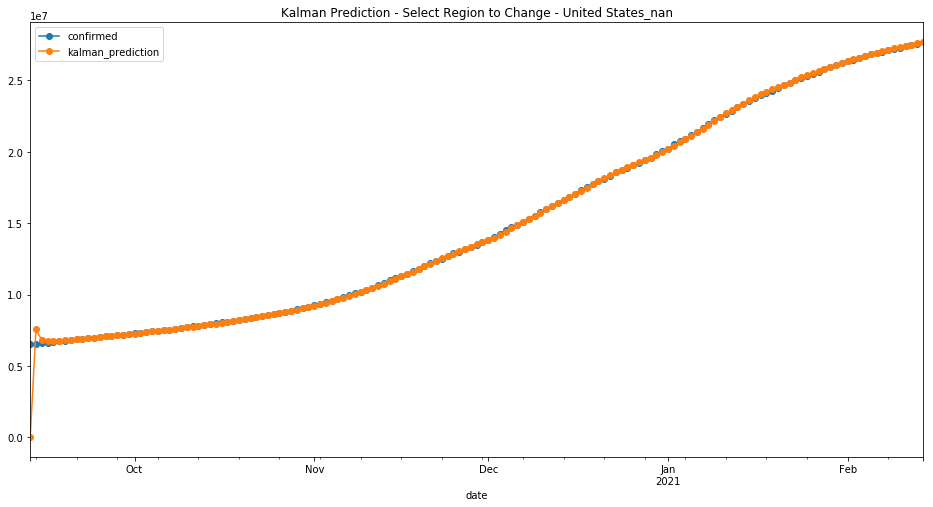

In [42]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse           rmse           mae
213  Russia_nan  1.055353e+11  324861.902779  29494.525974


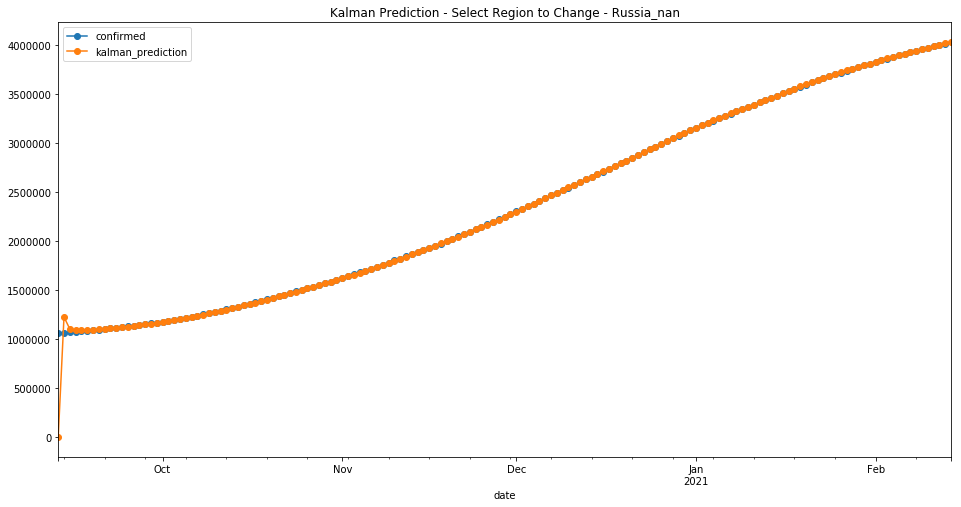

In [43]:
# Select region
region='Russia_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse           rmse           mae
30  Brazil_nan  6.347777e+11  796729.394169  86311.201299


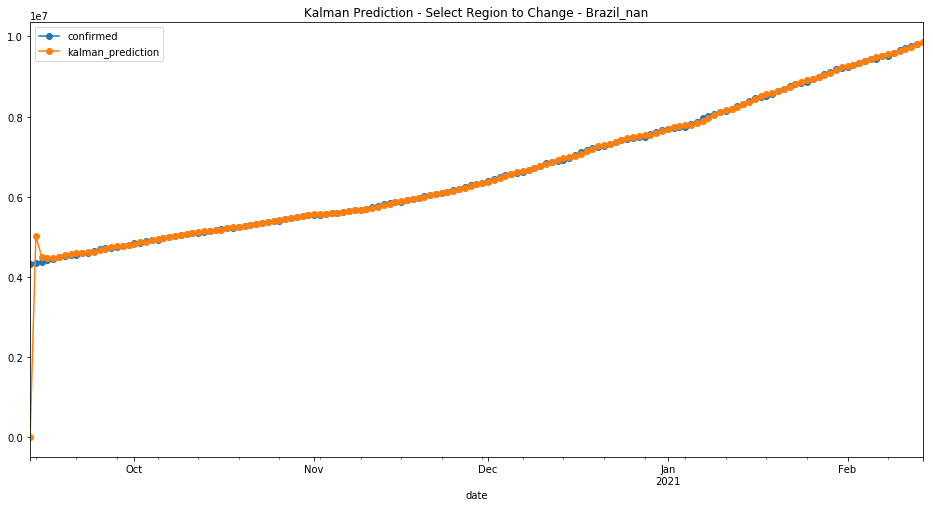

In [44]:
# Select region
region='Brazil_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                 region           mse          rmse           mae
262  United Kingdom_nan  1.061604e+11  325822.65143  32853.149351


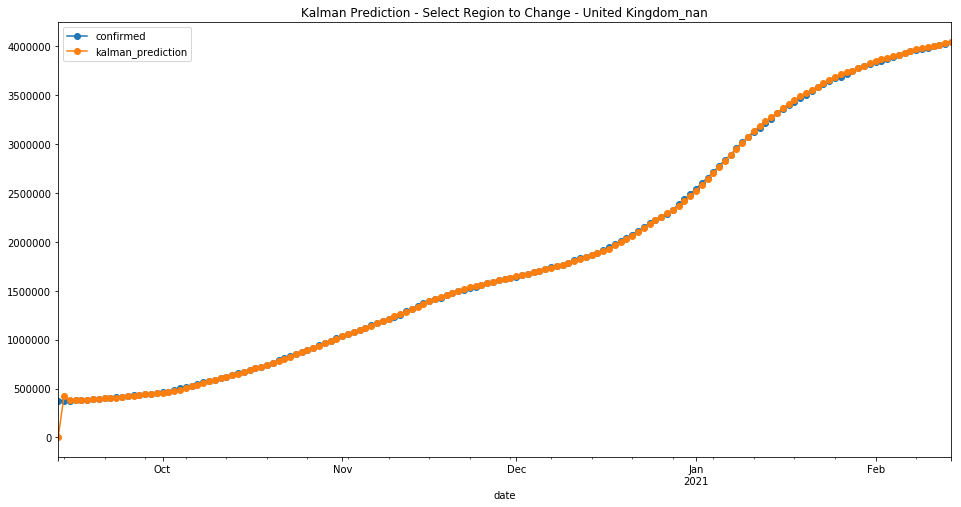

In [45]:
# Select region
region='United Kingdom_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [46]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='3G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.10" 2021-01-19; OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpe0k3y76r
  JVM stdout: /tmp/tmpe0k3y76r/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpe0k3y76r/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ------------------------------------------------------------------
H2O_cluster_uptime:         02 secs
H2O_cluster_timezone:       Etc/GMT
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.32.0.4
H2O_cluster_version_age:    12 days
H2O_cluster_name:           H2O_from_python_unknownUser_q60apt
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.543 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         accepting new members, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python_version:             3.7.7 final
--------------------------  ------------------------------------------------------------------

In [47]:

train=train.fillna(0)

########################################################

### Joao - Training  progression - When growth happened 2020/03/05 to 2020/04/12
### Joao - FIX - Refresh this daily forward

### Old Fixed manual ### Last run 17April2020
##
#train_df=train[train['date']>'2020-03-04']
#train_df=train[train['date']<'2020-04-16']
#boots=train_df[train_df['date']>='2020-04-08'] # some bootstrap to give more weight for recent days
#train_df=train_df.append([boots[boots['date']>='2020-04-12']]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
#region_to_train=my_train_list
#train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
#test=train[train['date']>='2020-04-03']
#test=test[test['date']<'2020-04-17']
#test_v2=test[test['region'].isin(region_to_train)]
#valid_v2=test_v2[test_v2['date']>='2020-04-16']

########################################################

# Set minimum of 14 training day 2weeks.
#
if number_past_days_training>=7 : 
    ntraindays=number_past_days_training 
else : 
    ntraindays=7
#
to_day=pd.to_datetime('today')
first_train_date=(to_day+pd.DateOffset(days=-ntraindays)).strftime('%Y-%m-%d') # ntraindays/7 weeks =ntraindays days training
last_train_date=(to_day+pd.DateOffset(days=-1)).strftime('%Y-%m-%d')
first_bootstrap_date=(to_day+pd.DateOffset(days=-9)).strftime('%Y-%m-%d')
boost_bootstrap_date=(to_day+pd.DateOffset(days=-4)).strftime('%Y-%m-%d')
first_test_date=(to_day+pd.DateOffset(days=-10)).strftime('%Y-%m-%d')
last_test_date=to_day.strftime('%Y-%m-%d')
first_valid_date=(to_day+pd.DateOffset(days=-2)).strftime('%Y-%m-%d')

print('first_train_date=',first_train_date)
print('last_train_date=',last_train_date)
print('first_bootstrap_date=',first_bootstrap_date)
print('boost_bootstrap_date=',boost_bootstrap_date)
print('first_test_date=',first_test_date)
print('last_test_date=',last_test_date)
print('first_valid_date=',first_valid_date)

train_df=train[train['date']>first_train_date]
train_df=train[train['date']<last_train_date]
boots=train_df[train_df['date']>=first_bootstrap_date] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>=boost_bootstrap_date]]*5,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>first_test_date]
test=test[test['date']<=last_test_date]
test_v2=test[test['region'].isin(region_to_train)]
valid_v2=test_v2[test_v2['date']>=first_valid_date]


first_train_date= 2021-02-02
last_train_date= 2021-02-13
first_bootstrap_date= 2021-02-05
boost_bootstrap_date= 2021-02-10
first_test_date= 2021-02-04
last_test_date= 2021-02-14
first_valid_date= 2021-02-12


In [48]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'min', 'max',
            'infected_rate',
            'kalman_prediction'
          #  ,'population_percent_infected_rate_confirmed'
          #  ,'delta_new_cases'
          #  ,'delta_new_cases_per_1M_hab'
          ]

In [49]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [50]:
pred2.iloc[:25]

0  confirmed       date           region
0    55450.0      55265 2021-02-05  Afghanistan_nan
1    55490.0      55330 2021-02-06  Afghanistan_nan
2    55549.0      55335 2021-02-07  Afghanistan_nan
3    55568.0      55359 2021-02-08  Afghanistan_nan
4    55588.0      55384 2021-02-09  Afghanistan_nan
5    55605.0      55402 2021-02-10  Afghanistan_nan
6    55622.0      55420 2021-02-11  Afghanistan_nan
7    55635.0      55445 2021-02-12  Afghanistan_nan
8    55653.0      55473 2021-02-13  Afghanistan_nan
9    55678.0          0 2021-02-14  Afghanistan_nan
10   82845.0      83082 2021-02-05      Albania_nan
11   83956.0      84212 2021-02-06      Albania_nan
12   85113.0      85336 2021-02-07      Albania_nan
13   86275.0      86289 2021-02-08      Albania_nan
14   87293.0      87528 2021-02-09      Albania_nan
15   88518.0      88671 2021-02-10      Albania_nan
16   89676.0      89776 2021-02-11      Albania_nan
17   90827.0      90835 2021-02-12      Albania_nan
18   91909.0      91987 2021-02-13      Albania_nan
19   93059.0          0 2021-02-14      Albania_nan
20  108759.0     108629 2021-02-05      Algeria_nan
21  109016.0     108629 2021-02-06      Algeria_nan
22  109043.0     109088 2021-02-07      Algeria_nan
23  109454.0     109313 2021-02-08      Algeria_nan
24  109660.0     109559 2021-02-09      Algeria_nan

In [51]:
pred2.iloc[175:195]

0  confirmed       date          region
175  231566.0     231509 2021-02-10  Azerbaijan_nan
176  231697.0     231649 2021-02-11  Azerbaijan_nan
177  231841.0     231840 2021-02-12  Azerbaijan_nan
178  232036.0     231995 2021-02-13  Azerbaijan_nan
179  232194.0          0 2021-02-14  Azerbaijan_nan
180    8400.0       8256 2021-02-05     Bahamas_nan
181    8422.0       8256 2021-02-06     Bahamas_nan
182    8447.0       8256 2021-02-07     Bahamas_nan
183    8443.0       8289 2021-02-08     Bahamas_nan
184    8387.0       8289 2021-02-09     Bahamas_nan
185    8476.0       8289 2021-02-10     Bahamas_nan
186    8479.0       8311 2021-02-11     Bahamas_nan
187    8434.0       8311 2021-02-12     Bahamas_nan
188    8494.0       8311 2021-02-13     Bahamas_nan
189    8495.0          0 2021-02-14     Bahamas_nan
190  105976.0     106198 2021-02-05     Bahrain_nan
191  106693.0     106713 2021-02-06     Bahrain_nan
192  107275.0     107329 2021-02-07     Bahrain_nan
193  107905.0     108048 2021-02-08     Bahrain_nan
194  108606.0     108807 2021-02-09     Bahrain_nan

In [52]:
pred2.iloc[220:240]

0  confirmed       date       region
220  254810.0     255172 2021-02-05  Belarus_nan
221  256580.0     256959 2021-02-06  Belarus_nan
222  258404.0     258691 2021-02-07  Belarus_nan
223  260215.0     259499 2021-02-08  Belarus_nan
224  261053.0     260060 2021-02-09  Belarus_nan
225  261630.0     261859 2021-02-10  Belarus_nan
226  263357.0     263551 2021-02-11  Belarus_nan
227  264873.0     265284 2021-02-12  Belarus_nan
228  266634.0     267029 2021-02-13  Belarus_nan
229  268423.0          0 2021-02-14  Belarus_nan
230  721018.0     721432 2021-02-05  Belgium_nan
231  723714.0     723870 2021-02-06  Belgium_nan
232  726185.0     725610 2021-02-07  Belgium_nan
233  727947.0     726483 2021-02-08  Belgium_nan
234  728735.0     728334 2021-02-09  Belgium_nan
235  730547.0     730951 2021-02-10  Belgium_nan
236  732997.0     733100 2021-02-11  Belgium_nan
237  734984.0     735220 2021-02-12  Belgium_nan
238  737157.0     737115 2021-02-13  Belgium_nan
239  739074.0          0 2021-02-14  Belgium_nan

In [53]:
#
train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time


test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

valid_h20_v2=h2o.H2OFrame(valid_v2)

#training_columns = ['region','1_day_change', '3_day_change', '7_day_change','1_day_change_rate','3_day_change_rate','7_day_change_rate','last_day', 'kalman_prediction','infected_rate', 'min', 'max']
training_cols_v2 = ['region']+x_col #+['population_percent_infected_rate_confirmed','delta_new_cases','delta_new_cases_per_1M_hab']
training_columns = training_cols_v2

# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Model V2
model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=23)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2, validation_frame=valid_h20_v2)


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%


In [54]:
#Print Model

print('# MSE on the training data = ',model_v2.mse())
print('# MSE on the validation data = ',model_v2.mse(valid=True))
print('# R^2 on the training data = ',model_v2.r2())
print('# R^2 on the validation data = ',model_v2.r2(valid=True))

# MSE on the training data =  7999483143.460533
# MSE on the validation data =  8016692278117.732
# R^2 on the training data =  0.9992837303015384
# R^2 on the validation data =  0.5234566444020192


In [55]:
model_v2.show()

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1613283088555_1


Model Summary: 


number_of_trees  number_of_internal_trees  model_size_in_bytes  \
0              500.0                     500.0           20176954.0   

   min_depth  max_depth  mean_depth  min_leaves  max_leaves  mean_leaves  
0       21.0       23.0      22.954      2741.0      3281.0     3161.084



ModelMetricsRegression: drf
** Reported on train data. **

MSE: 7999483143.460533
RMSE: 89439.82973743037
MAE: 8412.578811801652
RMSLE: 0.22765961234502102
Mean Residual Deviance: 7999483143.460533

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 8016692278117.732
RMSE: 2831376.3928728607
MAE: 746527.0340797831
RMSLE: 7.486063016050211
Mean Residual Deviance: 8016692278117.732

Scoring History: 


timestamp    duration  number_of_trees  training_rmse  \
0     2021-02-14 06:11:36   0.071 sec              0.0            NaN   
1     2021-02-14 06:11:37   0.462 sec              1.0  130337.590863   
2     2021-02-14 06:11:37   0.599 sec              2.0  105094.009881   
3     2021-02-14 06:11:37   0.754 sec              3.0  103417.683787   
4     2021-02-14 06:11:37   0.846 sec              4.0  105139.461701   
5     2021-02-14 06:11:37   0.917 sec              5.0  122046.881864   
6     2021-02-14 06:11:37   1.015 sec              6.0  118846.996584   
7     2021-02-14 06:11:37   1.104 sec              7.0  131718.040254   
8     2021-02-14 06:11:37   1.174 sec              8.0  124618.695606   
9     2021-02-14 06:11:38   1.323 sec              9.0  113977.294307   
10    2021-02-14 06:11:38   1.411 sec             10.0   92811.635986   
11    2021-02-14 06:11:38   1.478 sec             11.0   92895.078218   
12    2021-02-14 06:11:38   1.563 sec             12.0  117680.053402   
13    2021-02-14 06:11:38   1.634 sec             13.0  120012.270385   
14    2021-02-14 06:11:38   1.701 sec             14.0  124382.046555   
15    2021-02-14 06:11:38   1.781 sec             15.0  122428.526666   
16    2021-02-14 06:11:38   1.848 sec             16.0  124496.270776   
17    2021-02-14 06:11:38   1.921 sec             17.0  121659.949020   
18    2021-02-14 06:11:38   1.987 sec             18.0  121081.888366   
19    2021-02-14 06:11:38   2.061 sec             19.0  119304.594191   

    training_mae  training_deviance  validation_rmse  validation_mae  \
0            NaN                NaN              NaN             NaN   
1   21702.776286       1.698789e+10     1.897857e+06   603182.056918   
2   17867.623120       1.104475e+10     2.408922e+06   676197.587088   
3   18172.602536       1.069522e+10     2.619016e+06   701328.597590   
4   17138.305264       1.105431e+10     2.730912e+06   716042.358965   
5   17112.253385       1.489544e+10     2.800396e+06   725410.852306   
6   16721.551196       1.412461e+10     2.846055e+06   729622.007892   
7   18002.677830       1.734964e+10     2.693603e+06   732149.105363   
8   16705.500957       1.552982e+10     2.738057e+06   734579.309427   
9   15873.083571       1.299082e+10     2.773238e+06   736532.075767   
10  14753.663714       8.614000e+09     2.670172e+06   722533.985529   
11  14251.678134       8.629496e+09     2.727005e+06   765842.289203   
12  15373.223746       1.384859e+10     2.752475e+06   764287.563596   
13  15475.013143       1.440295e+10     2.669059e+06   750798.576598   
14  15320.754409       1.547089e+10     2.695984e+06   751032.507266   
15  15026.179789       1.498874e+10     2.719665e+06   751284.538401   
16  14867.200650       1.549932e+10     2.740905e+06   751512.176465   
17  14536.878453       1.480114e+10     2.758555e+06   751543.836473   
18  14228.903142       1.466082e+10     2.775414e+06   751824.879536   
19  13879.915727       1.423359e+10     2.790694e+06   752012.317041   

    validation_deviance  
0                   NaN  
1          3.601861e+12  
2          5.802905e+12  
3          6.859246e+12  
4          7.457879e+12  
5          7.842220e+12  
6          8.100026e+12  
7          7.255498e+12  
8          7.496955e+12  
9          7.690848e+12  
10         7.129817e+12  
11         7.436556e+12  
12         7.576117e+12  
13         7.123874e+12  
14         7.268328e+12  
15         7.396576e+12  
16         7.512562e+12  
17         7.609628e+12  
18         7.702925e+12  
19         7.787972e+12


See the whole table with table.as_data_frame()

Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0   kalman_prediction         1.080336e+19           1.000000    0.357274
1            last_day         8.040069e+18           0.744219    0.265890
2              region         4.356712e+18           0.403274    0.144079
3        3_day_change         2.092698e+18           0.193708    0.069207
4        1_day_change         1.448089e+18           0.134041    0.047889
5        7_day_change         1.394998e+18           0.129126    0.046133
6       infected_rate         1.179594e+18           0.109188    0.039010
7                 max         4.295035e+17           0.039756    0.014204
8                 min         3.669692e+17           0.033968    0.012136
9   7_day_change_rate         5.817427e+16           0.005385    0.001924
10  3_day_change_rate         5.186684e+16           0.004801    0.001715
11  1_day_change_rate         1.628005e+16           0.001507    0.000538

In [56]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
modlv2=model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF
modlv2.sort_values('percentage',ascending=False)

variable  relative_importance  scaled_importance  percentage
0   kalman_prediction         1.080336e+19           1.000000    0.357274
1            last_day         8.040069e+18           0.744219    0.265890
2              region         4.356712e+18           0.403274    0.144079
3        3_day_change         2.092698e+18           0.193708    0.069207
4        1_day_change         1.448089e+18           0.134041    0.047889
5        7_day_change         1.394998e+18           0.129126    0.046133
6       infected_rate         1.179594e+18           0.109188    0.039010
7                 max         4.295035e+17           0.039756    0.014204
8                 min         3.669692e+17           0.033968    0.012136
9   7_day_change_rate         5.817427e+16           0.005385    0.001924
10  3_day_change_rate         5.186684e+16           0.004801    0.001715
11  1_day_change_rate         1.628005e+16           0.001507    0.000538

In [57]:
## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


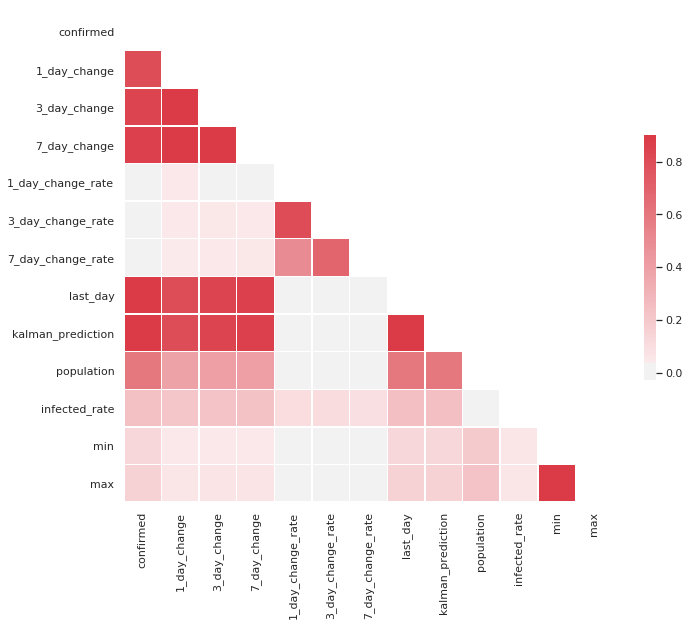

In [58]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [59]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.801885
3_day_change         0.848623
7_day_change         0.869421
1_day_change_rate    0.025602
3_day_change_rate    0.025506
7_day_change_rate    0.020142
last_day             0.990431
kalman_prediction    0.991181
population           0.600466
infected_rate        0.245715
min                  0.132143
max                  0.154336
Name: confirmed, dtype: float64


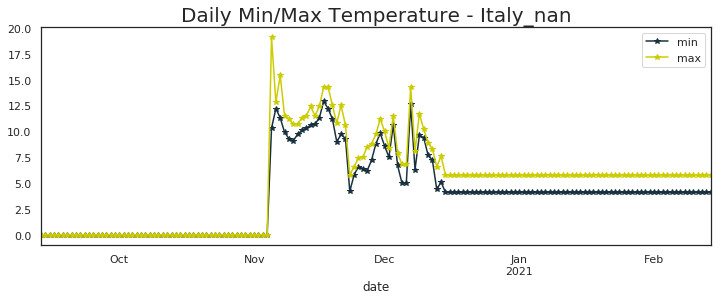

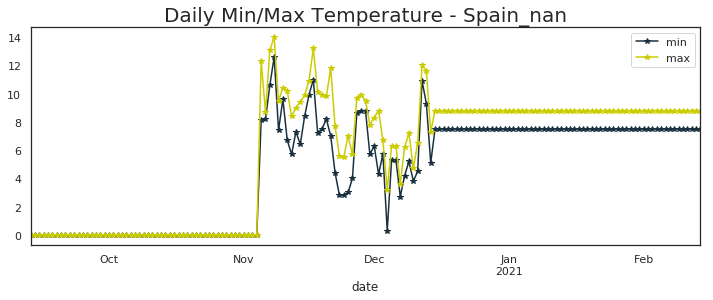

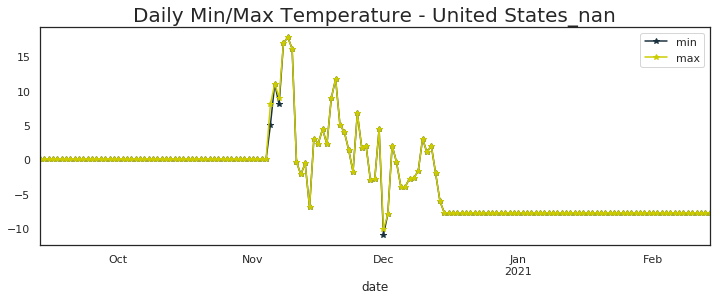

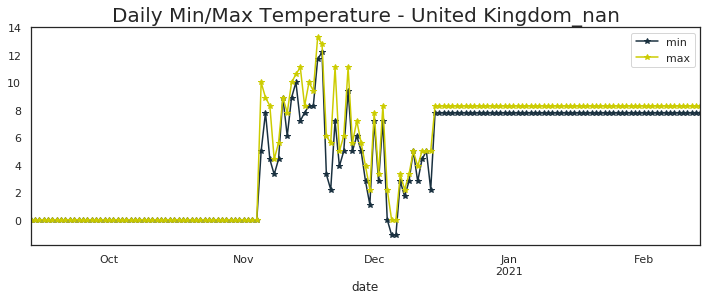

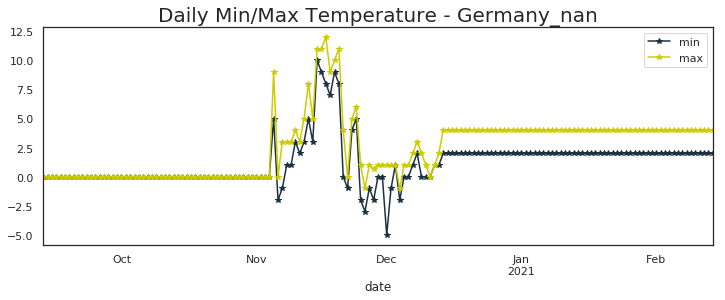

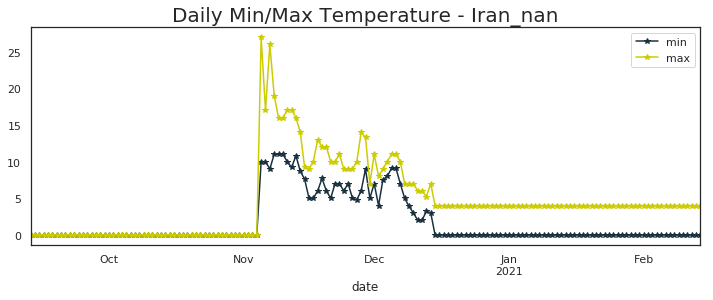

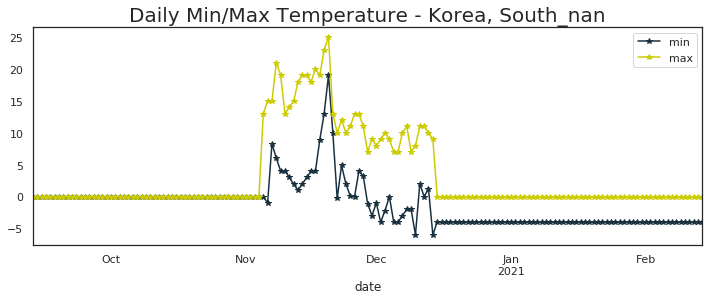

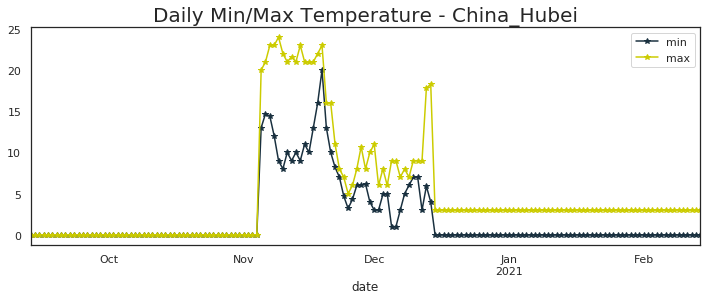

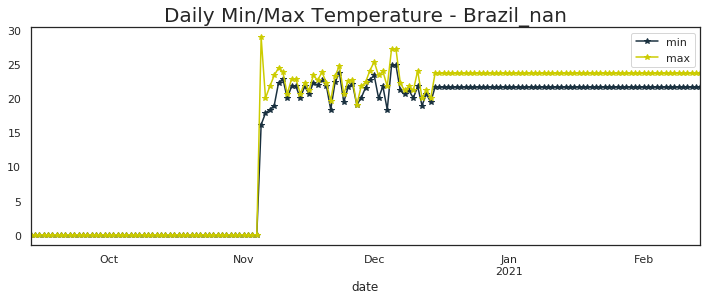

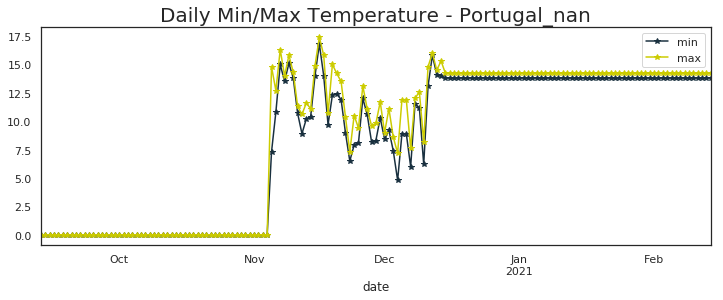

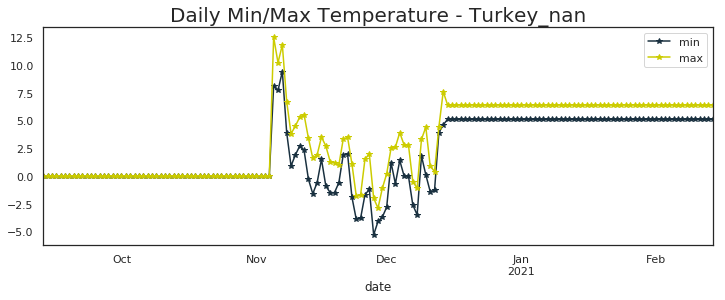

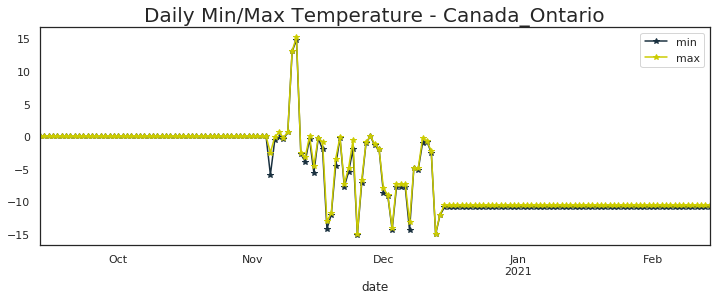

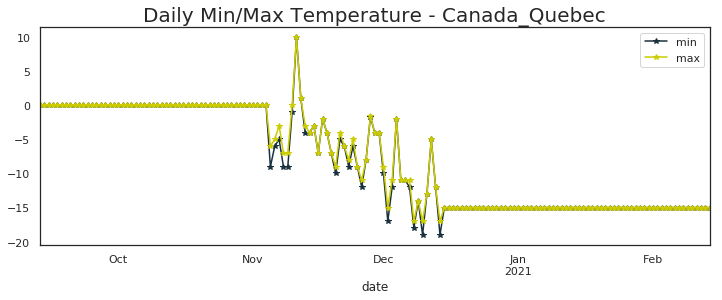

In [60]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan','Iran_nan',
          'Korea, South_nan','China_Hubei','Brazil_nan','Portugal_nan','Turkey_nan',
          'Canada_Ontario','Canada_Quebec']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [61]:
avg_temp=train[['region','confirmed','min','max']]  # from 20-02-20 to 06-04-2020
avg_temp=avg_temp.groupby(by='region').max()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                             min   max
region                                
United States_nan           17.8  17.8
India_nan                   22.0  31.0
Brazil_nan                  24.8  28.9
United Kingdom_nan          12.2  13.3
Russia_nan                   0.0   4.0
France_nan                  12.1  13.3
Spain_nan                   12.6  14.0
Italy_nan                   12.9  19.1
Turkey_nan                   9.4  12.5
Germany_nan                 10.0  12.0
Colombia_nan                 0.0   0.0
Argentina_nan                0.0   0.0
Mexico_nan                  15.1  15.1
Poland_nan                   8.9  10.6
Iran_nan                    11.0  27.0
South Africa_nan             0.0   0.0
Ukraine_nan                  0.0   0.0
Peru_nan                    24.6  29.9
Indonesia_nan                0.0   0.0
Czechia_nan                  0.0   0.0
Netherlands_nan             14.4  16.1
Portugal_nan                16.8  17.4
Chile_nan                   

### Kalman X Days Ahead Prediction

In [62]:
%%R

#install.packages('reshape')

NULL


In [63]:
%%R

require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL

### JOAO - FIX
#
### Flexy Days maximum forward prediction =A Hint!= "Error increases as number of days increases"
days_prediction<-max_days_prediction # Set i days prediction # max_days_prediction=90 days forward prediction with Kalman Filter

for (i in 1: days_prediction) { 
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

R[write to console]: 
── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = "")
)
ℹ Use `spec()` for the full column specifications.




In [64]:
all_new=%R all_new

In [65]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

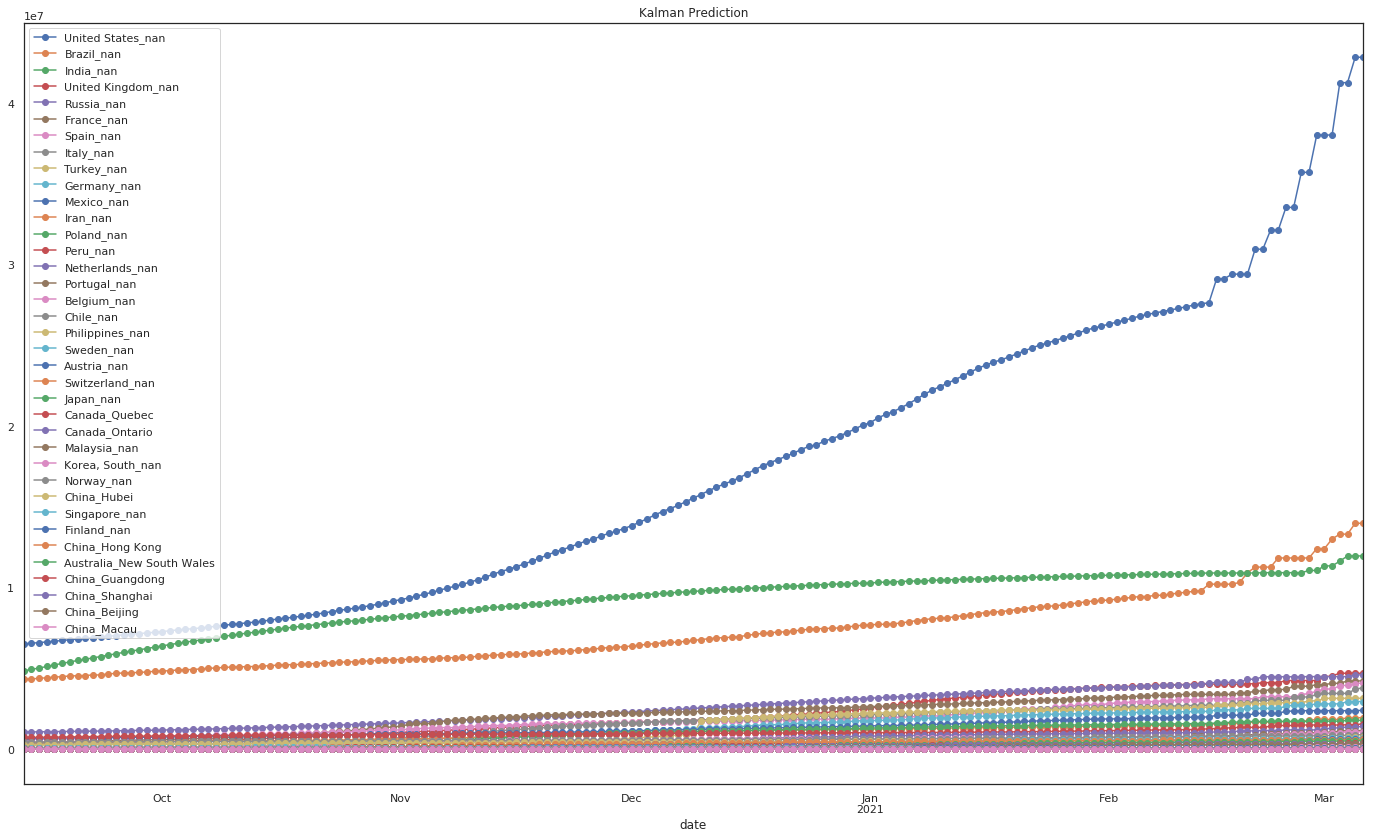

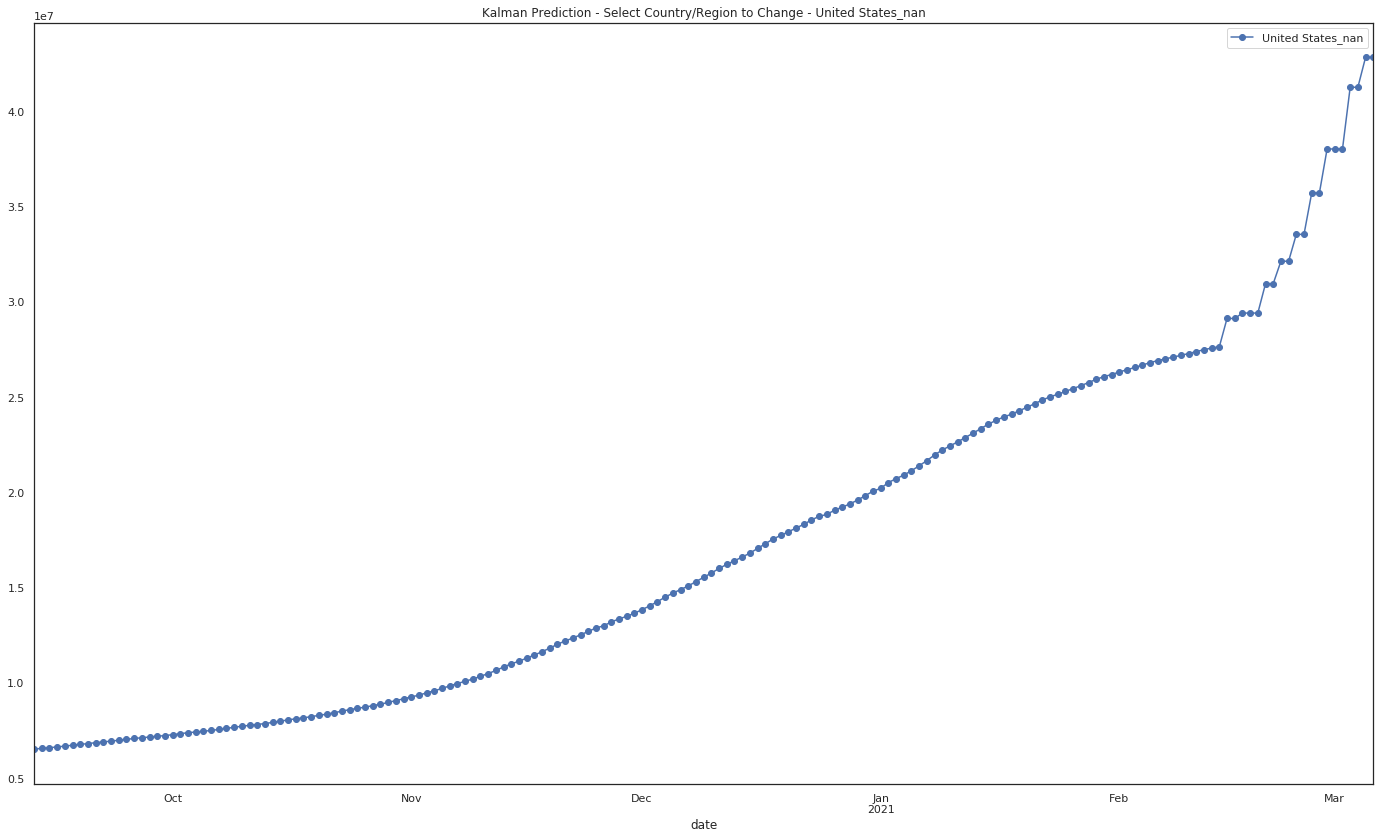

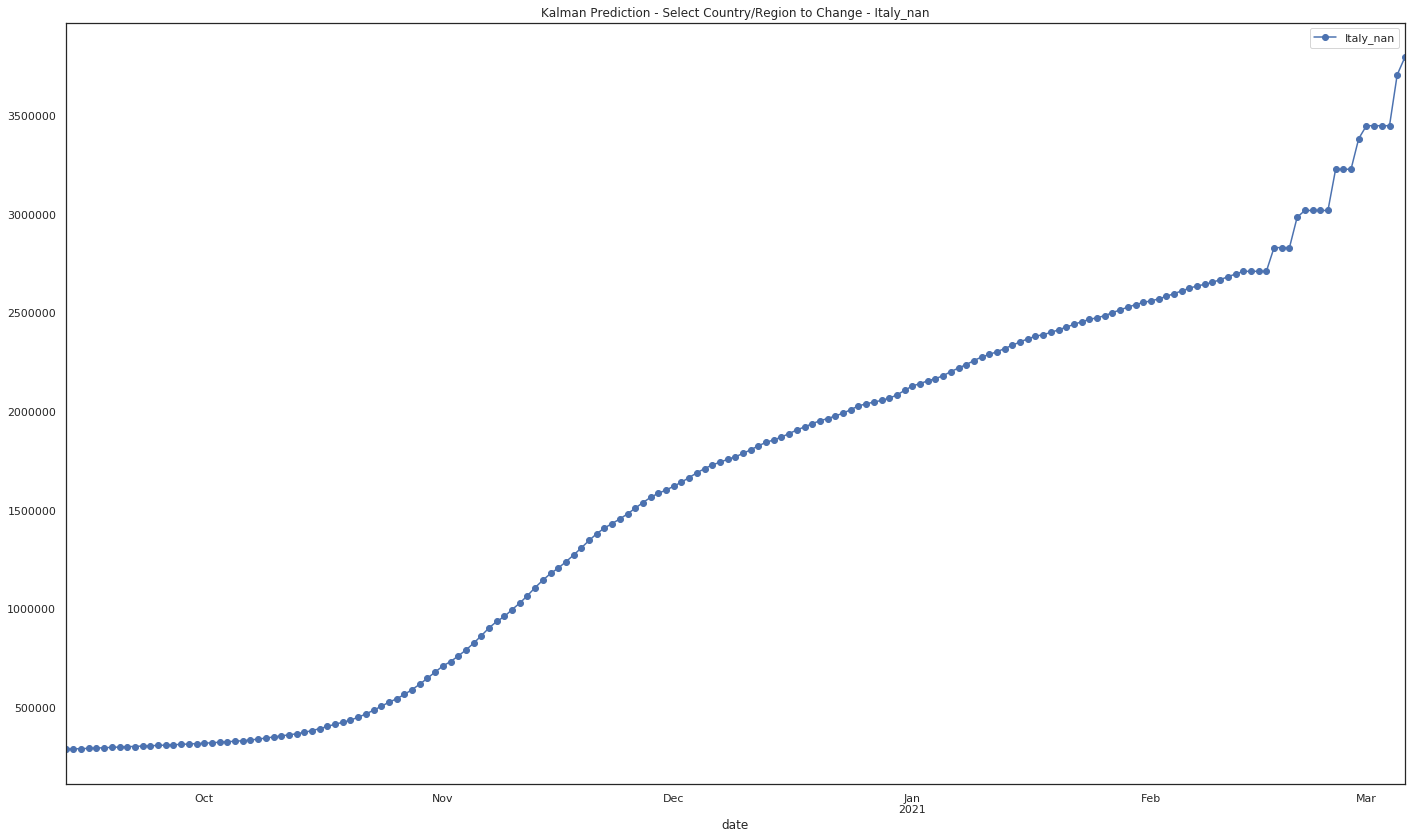

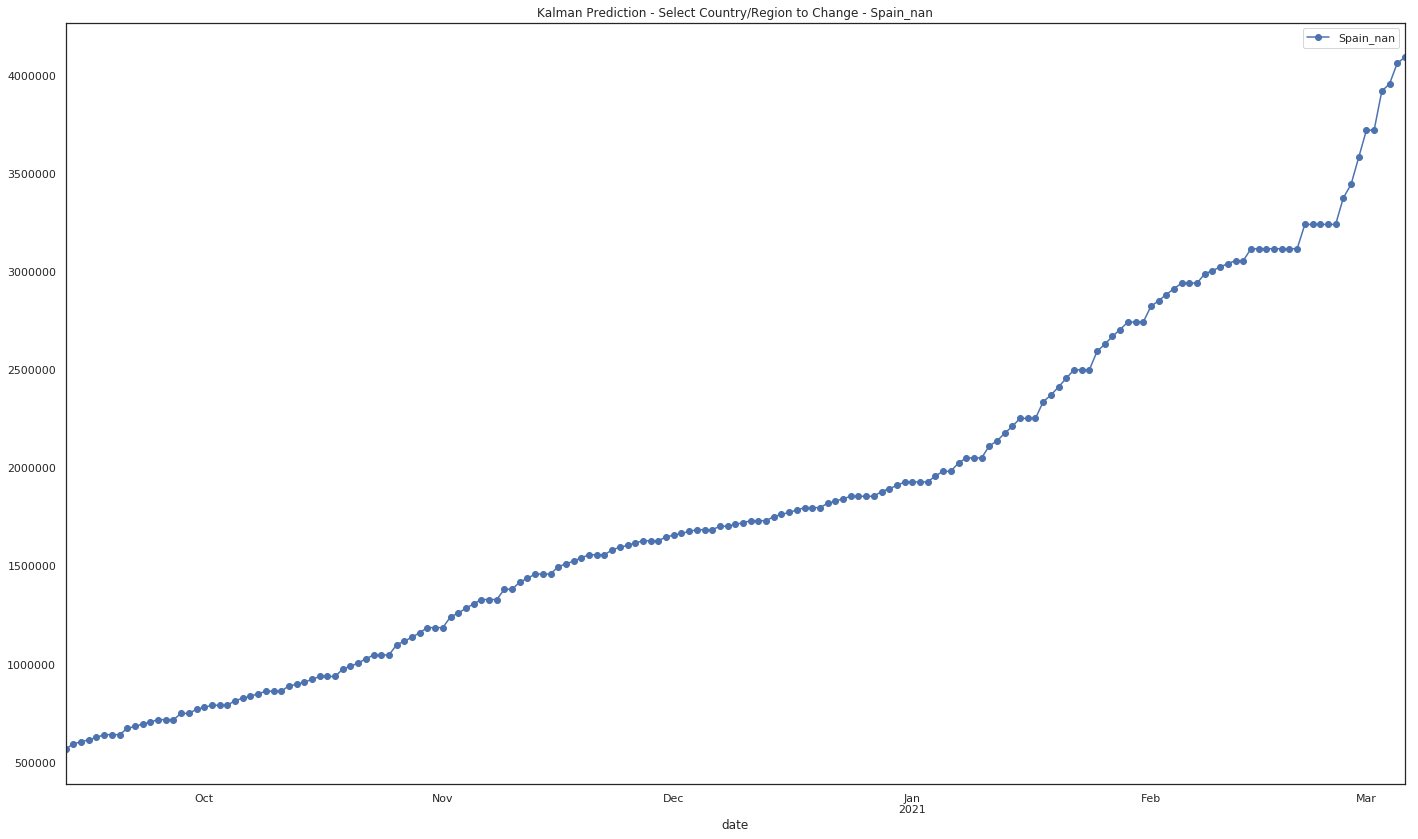

In [66]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman=p_kalman.reindex(p_kalman.max().sort_values(ascending=False).index, axis=1)
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
p_kalman2=all_new[['date','United States_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#
p_kalman3=all_new[['date','Italy_nan']] ## Joao
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))
#
p_kalman4=all_new[['date','Spain_nan']] ## Joao
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


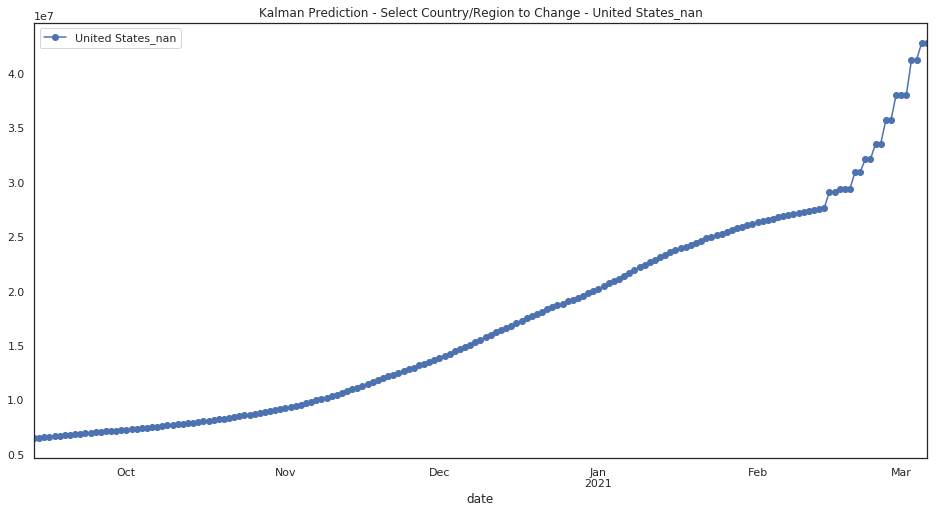

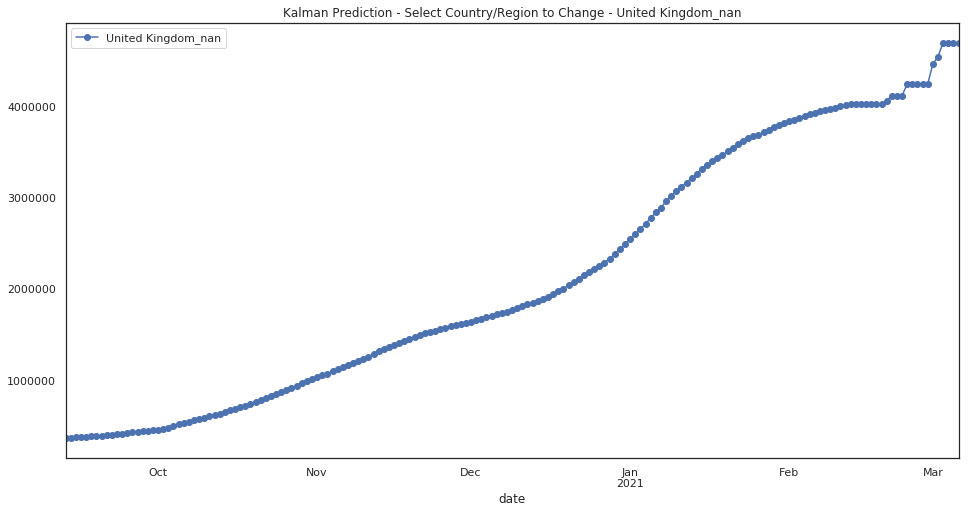

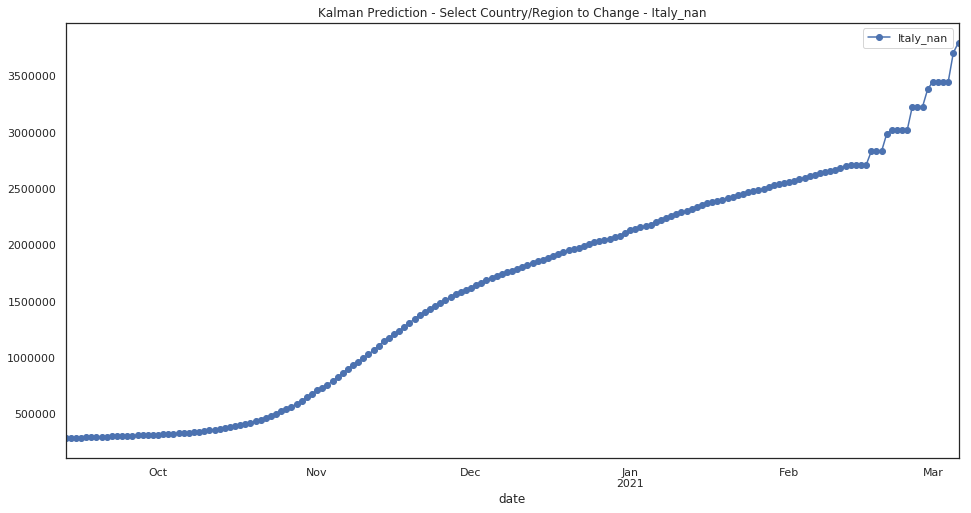

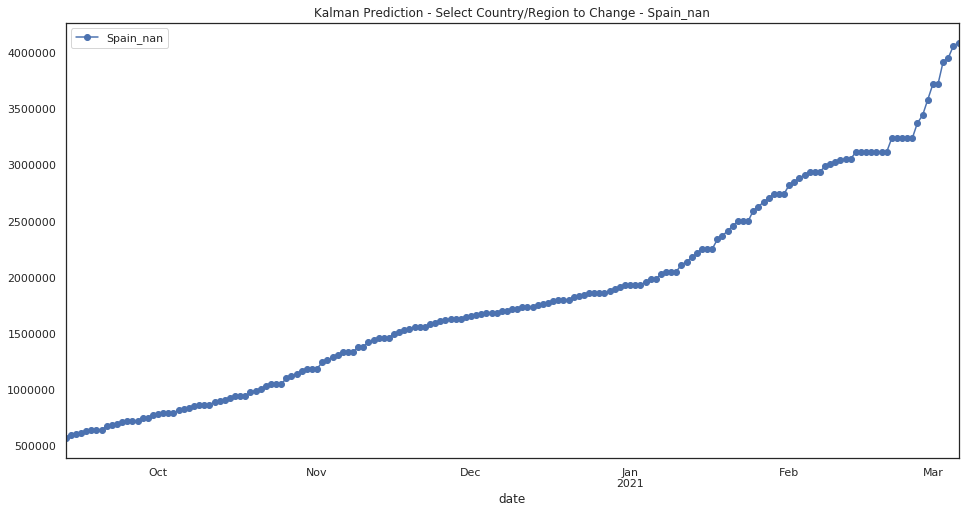

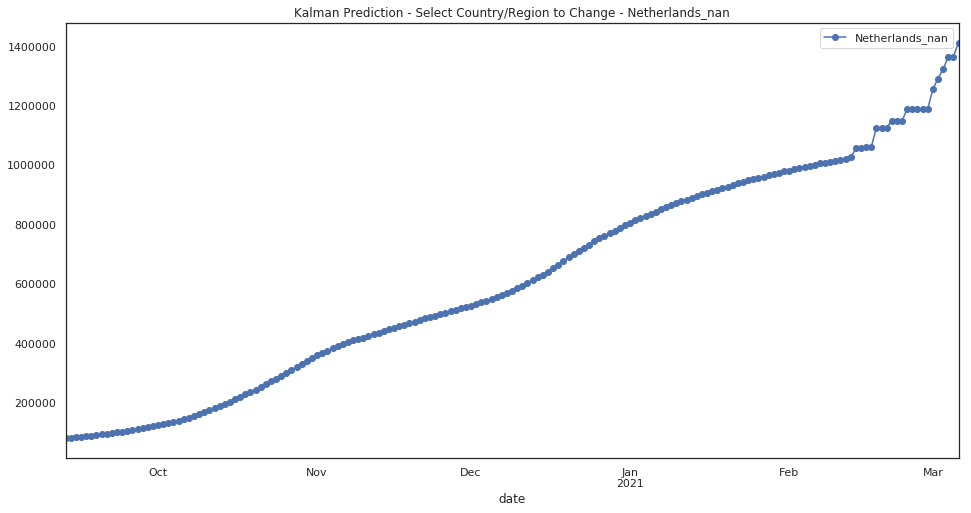

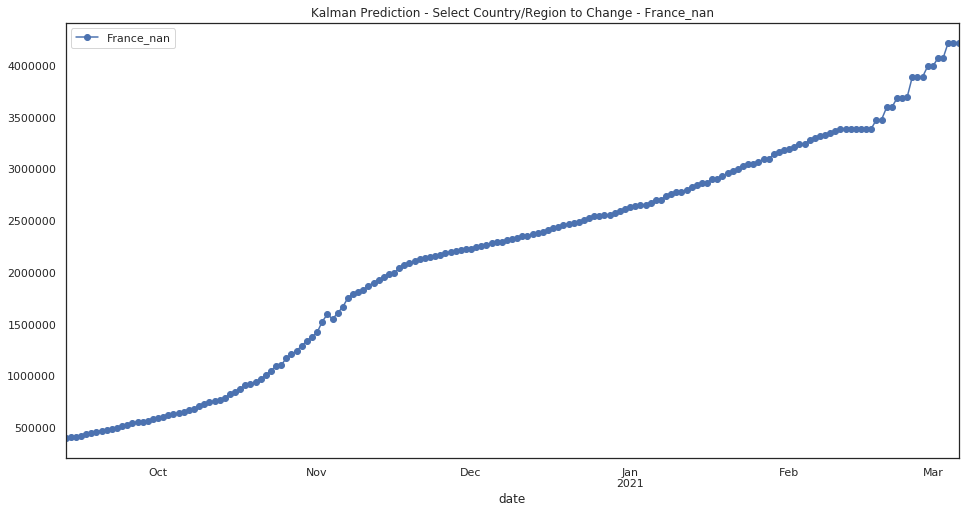

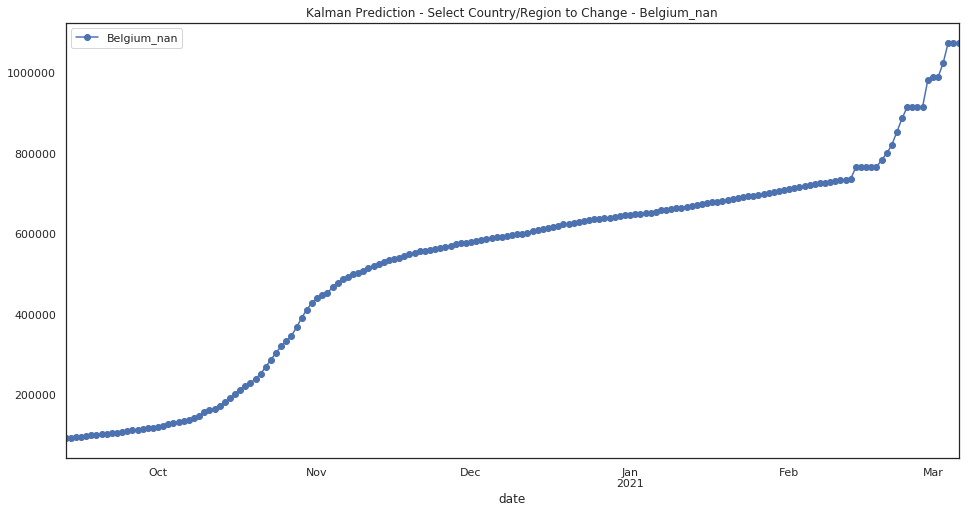

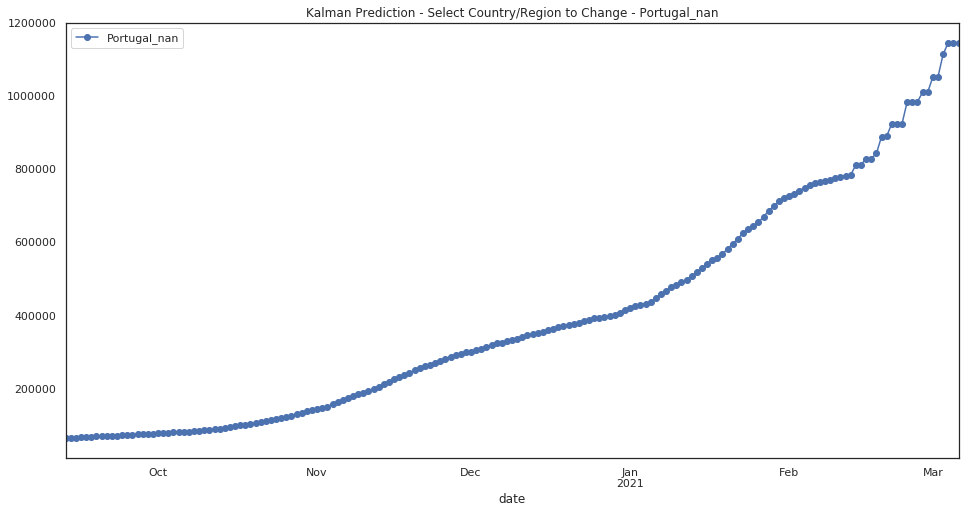

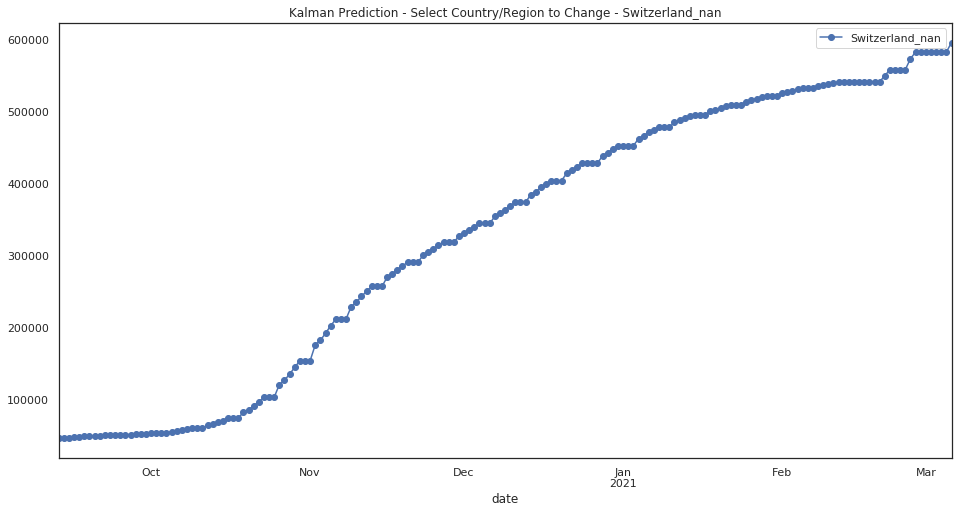

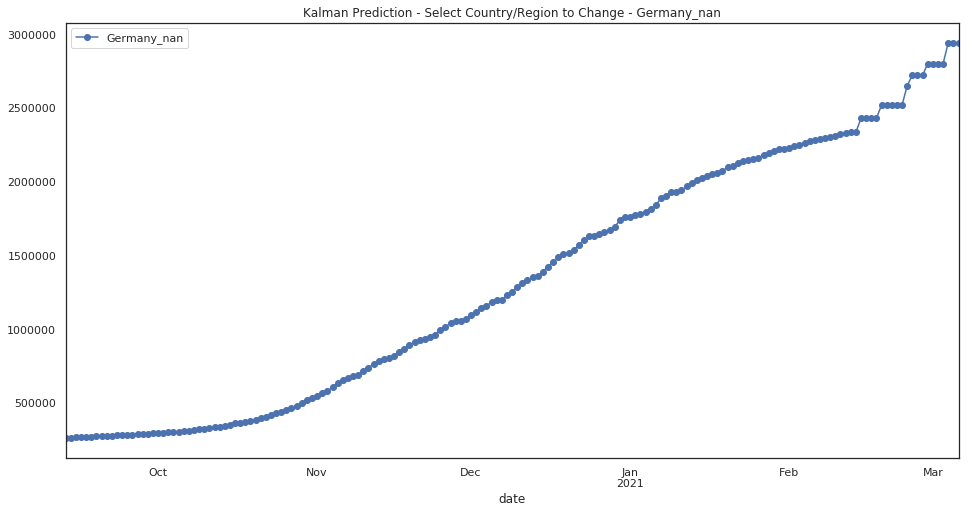

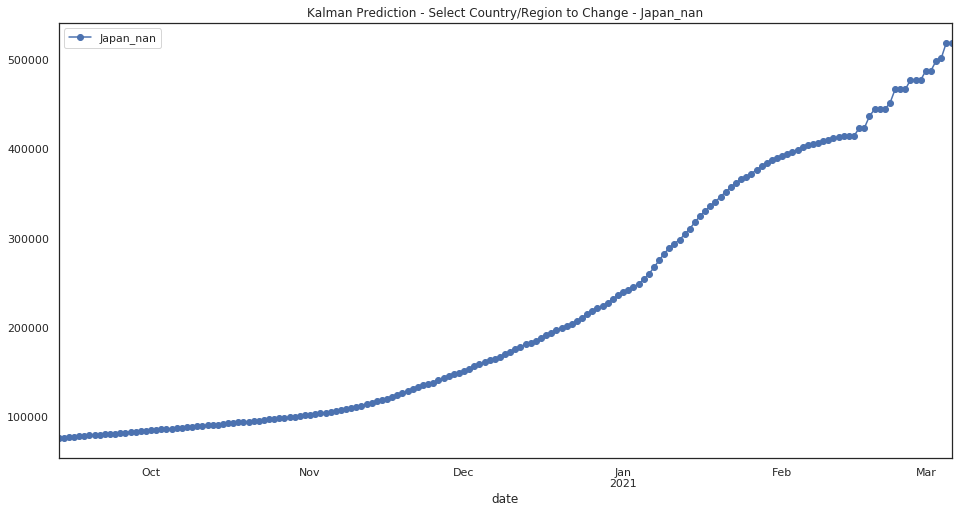

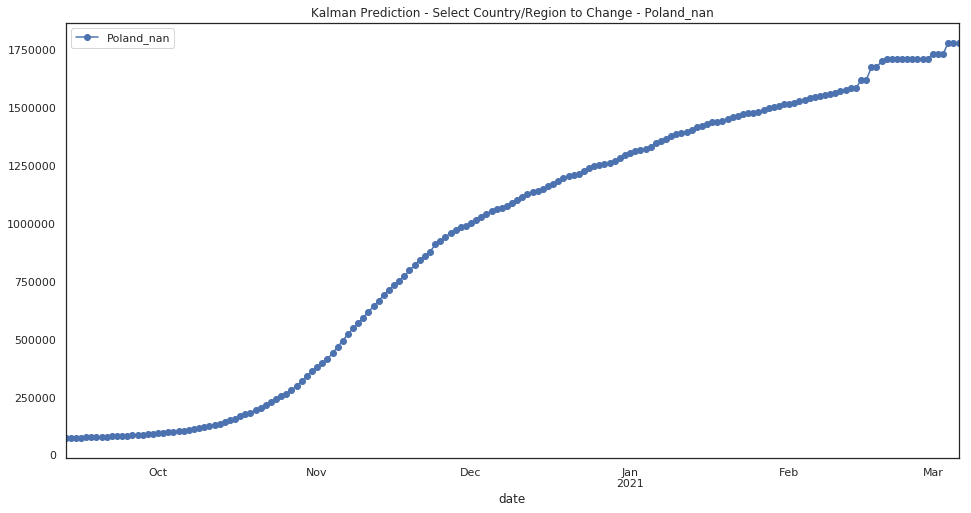

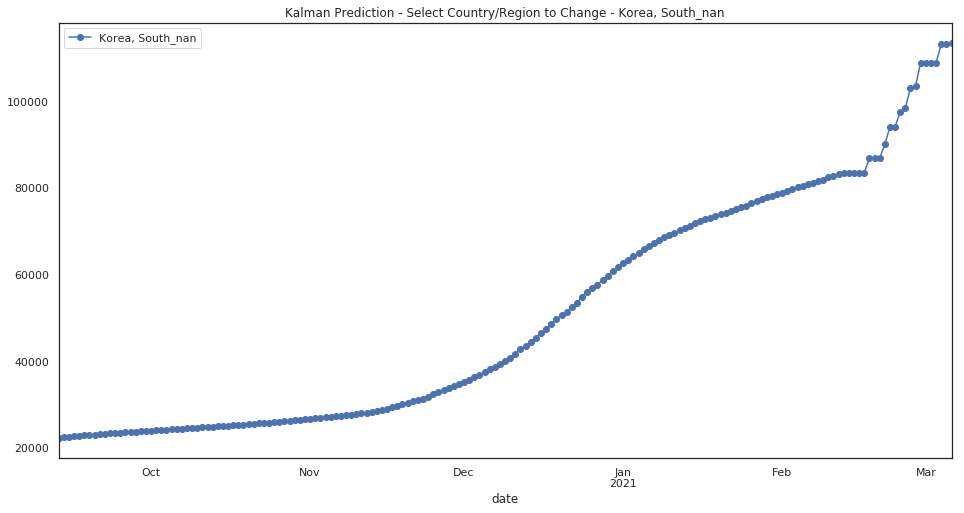

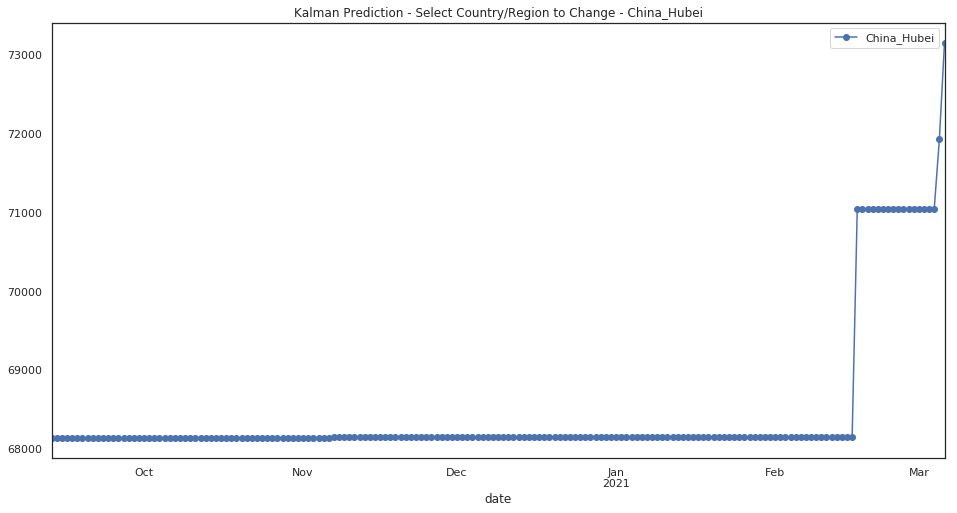

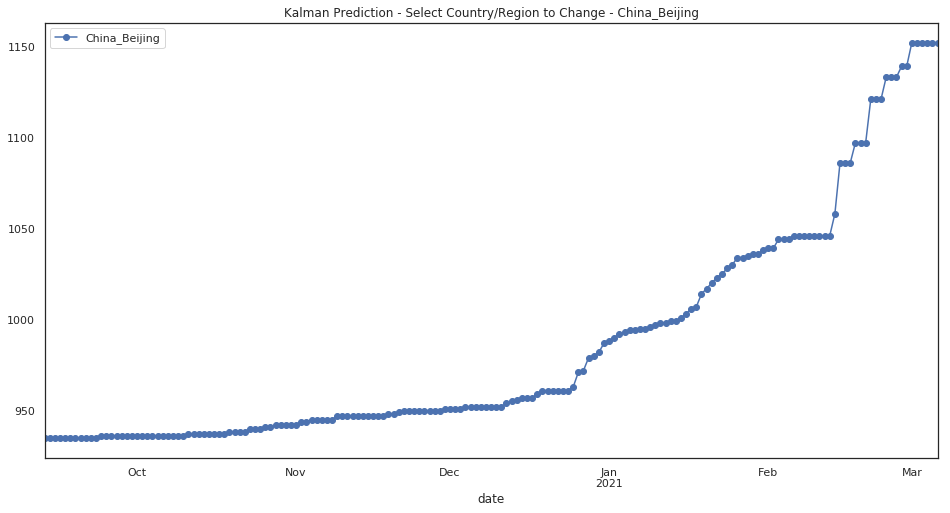

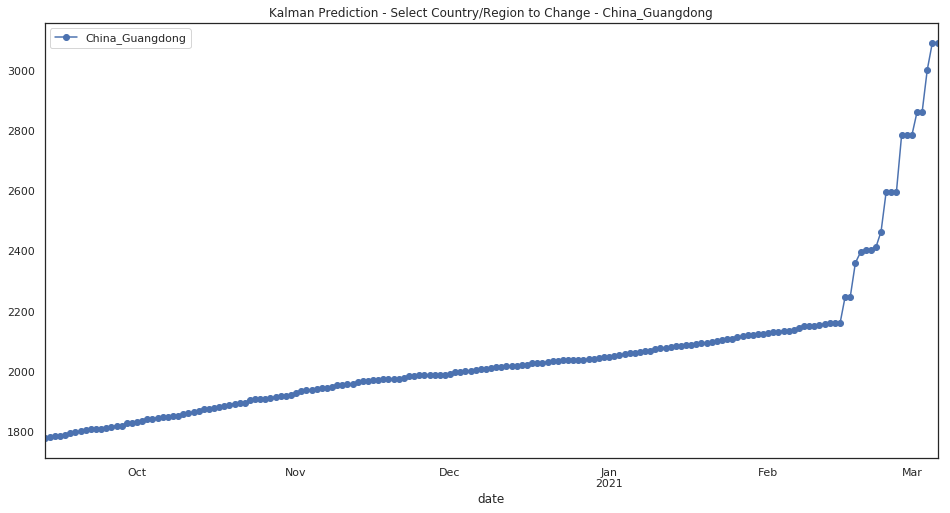

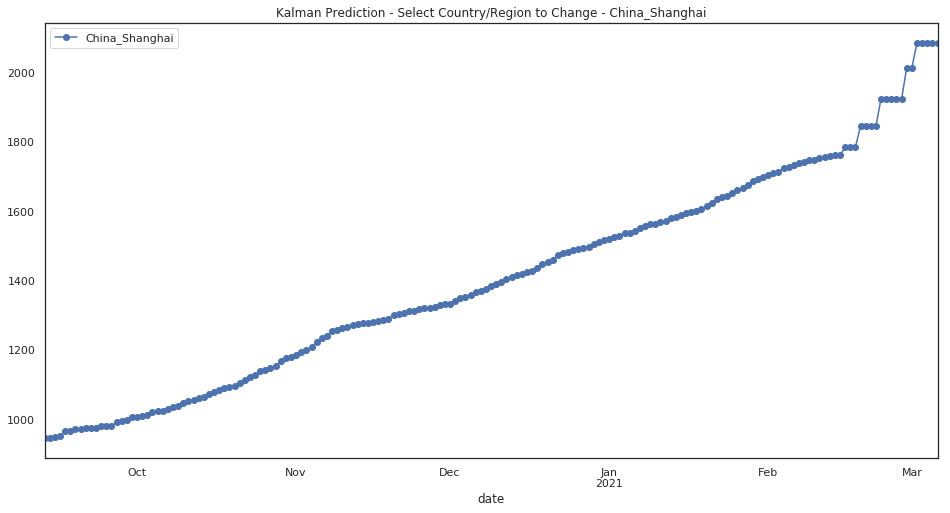

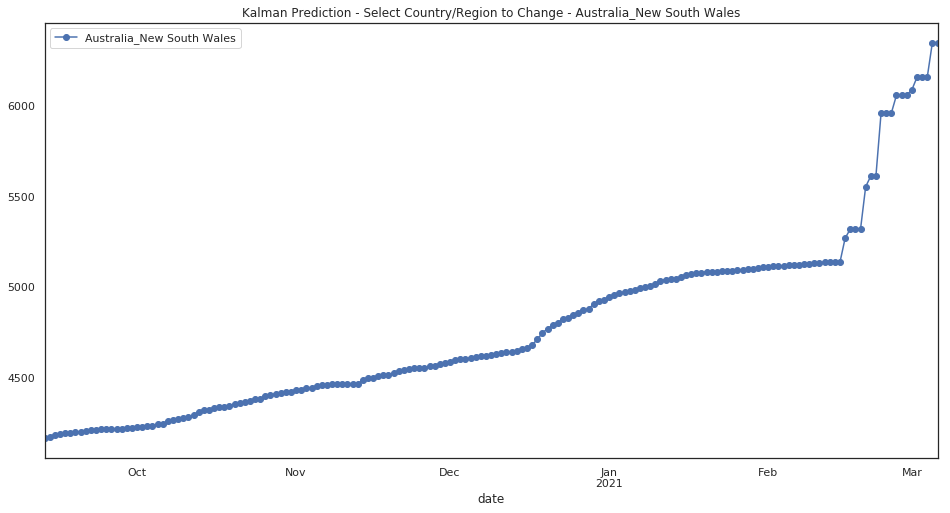

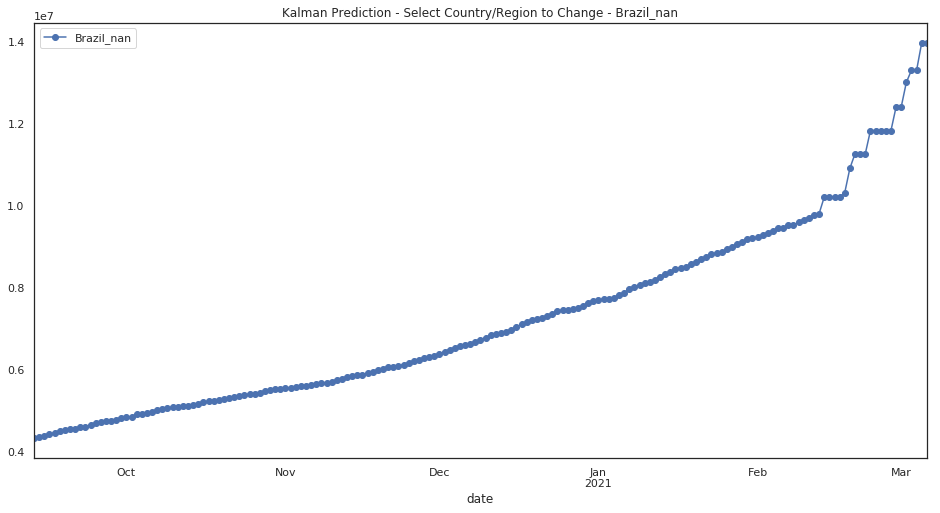

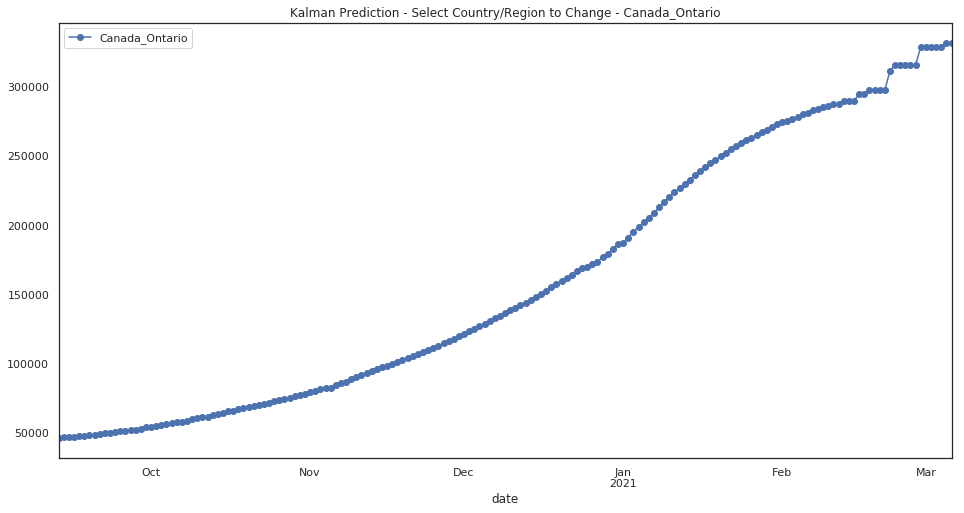

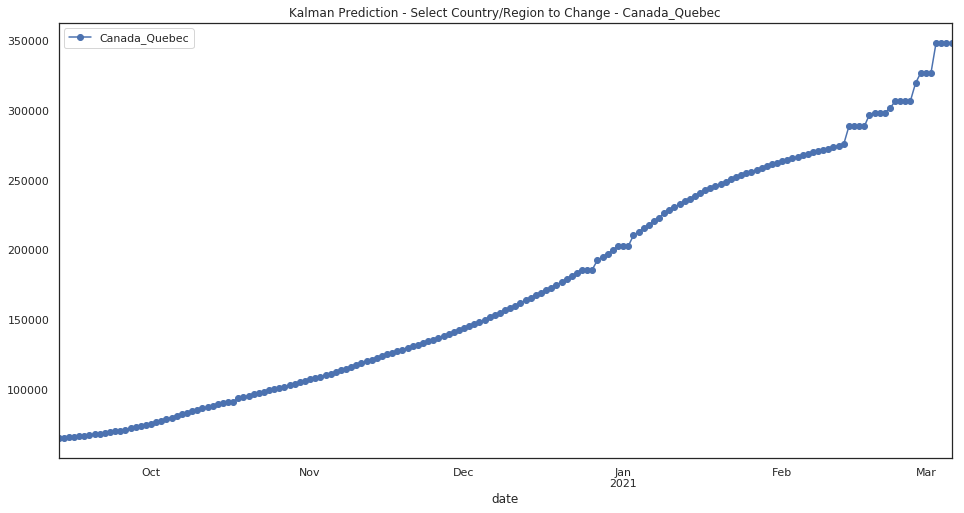

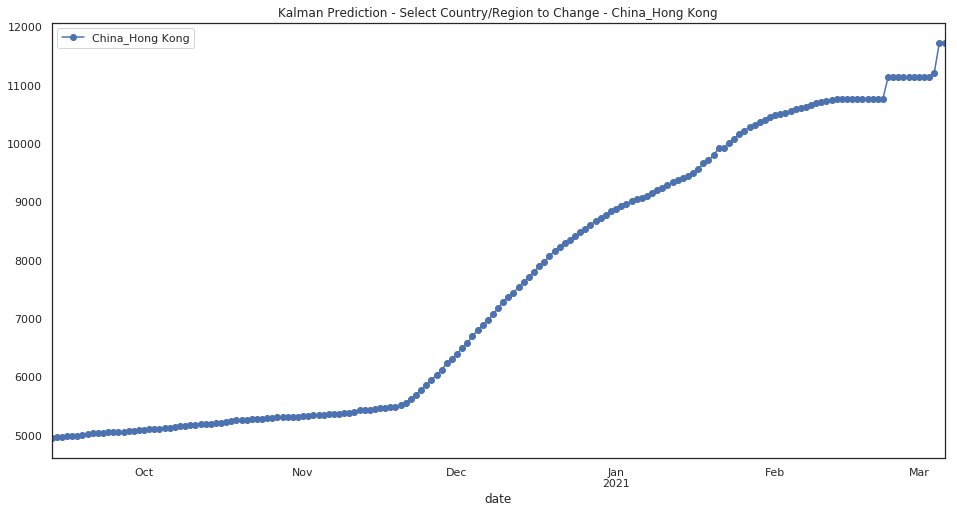

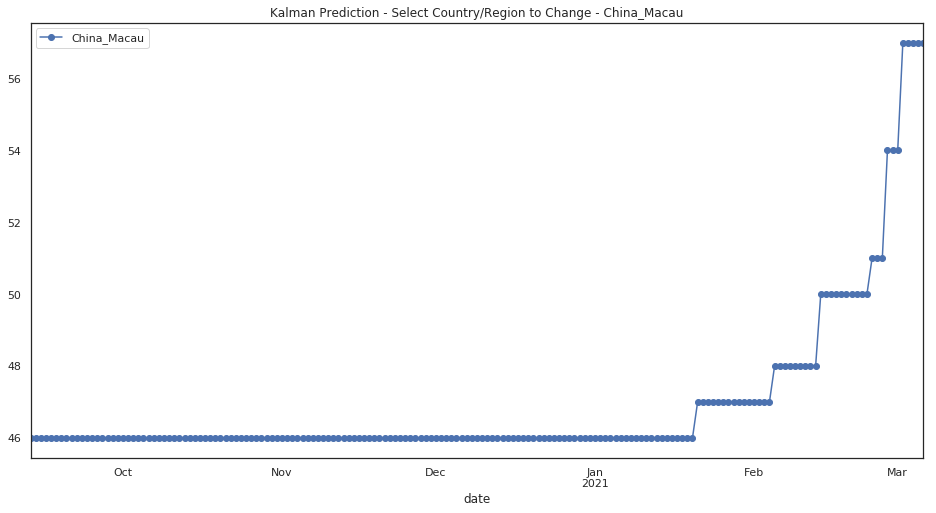

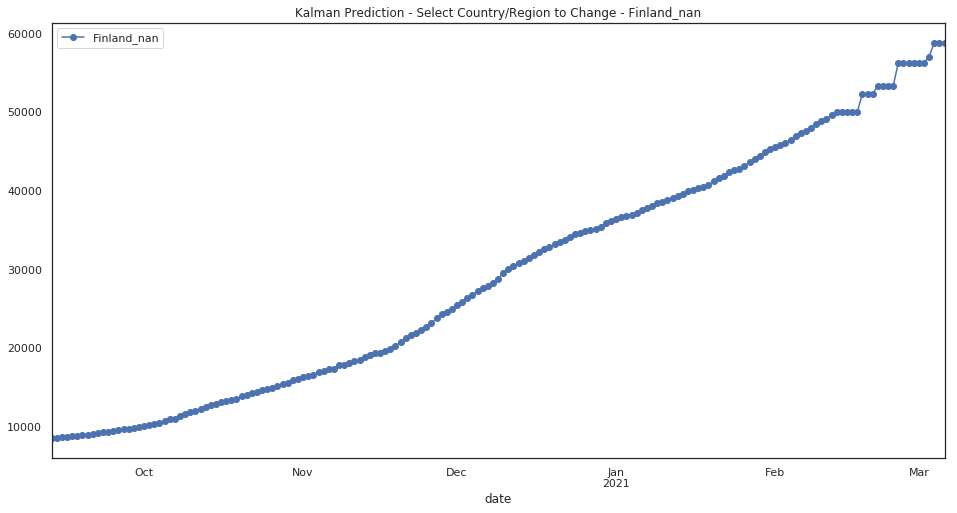

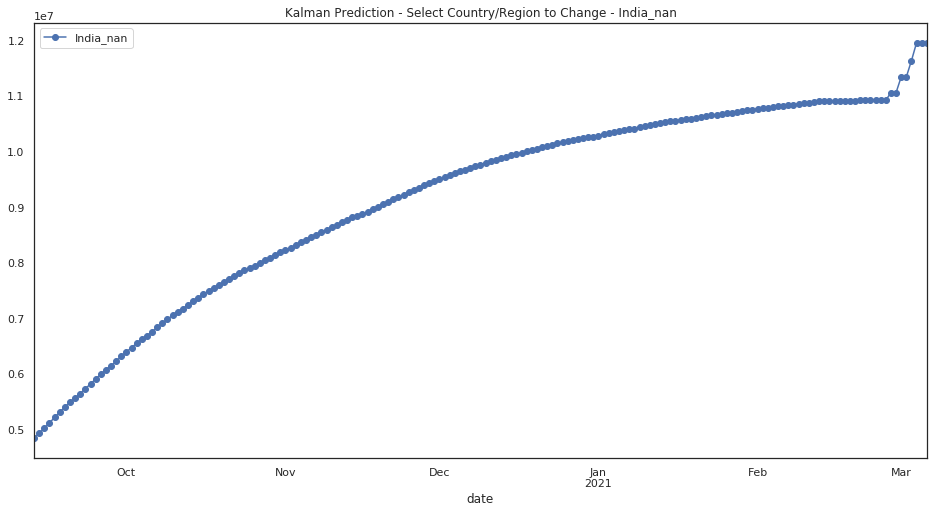

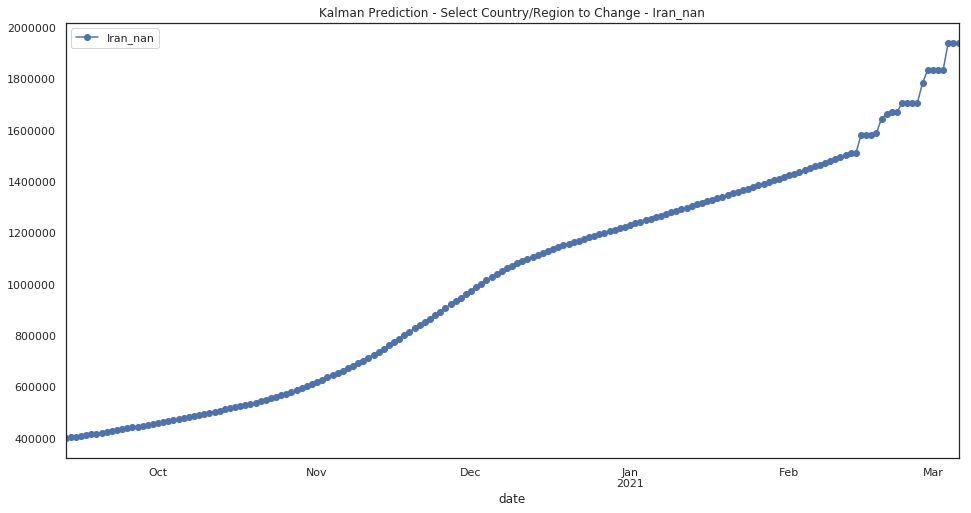

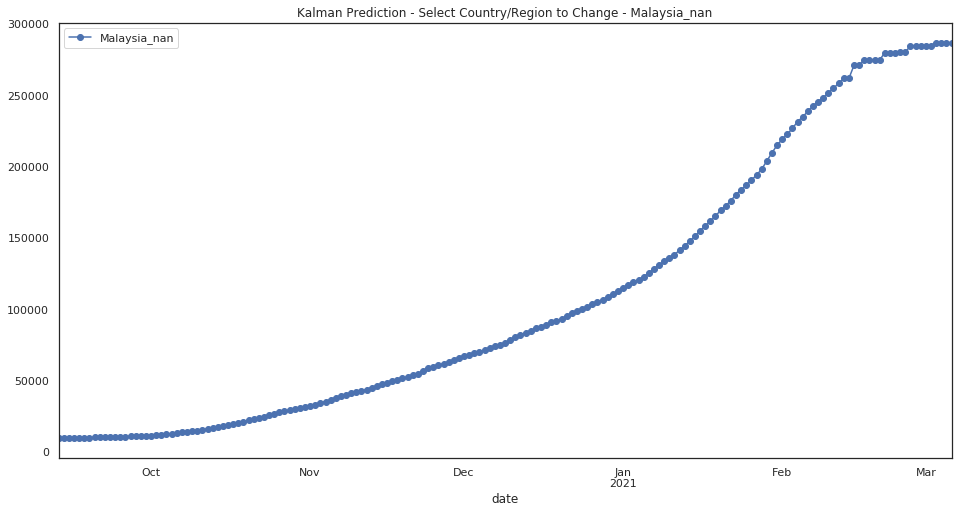

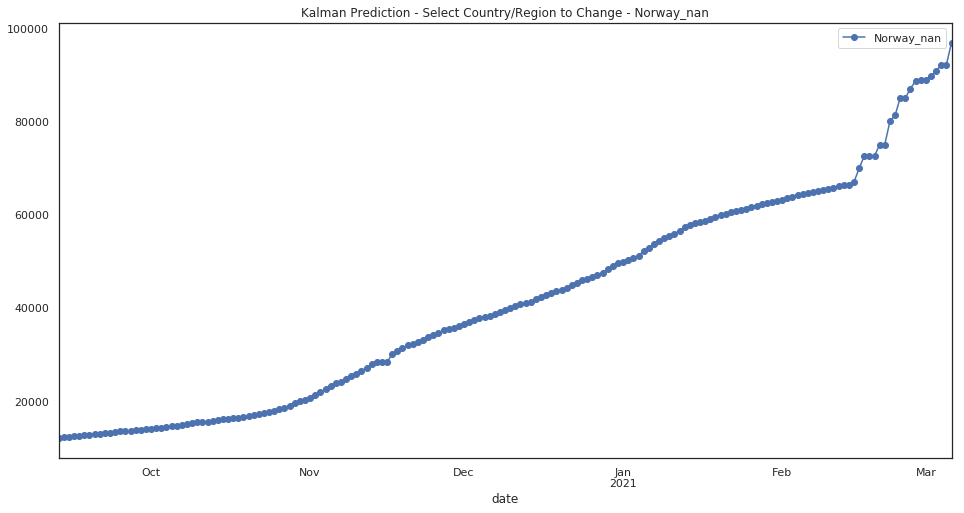

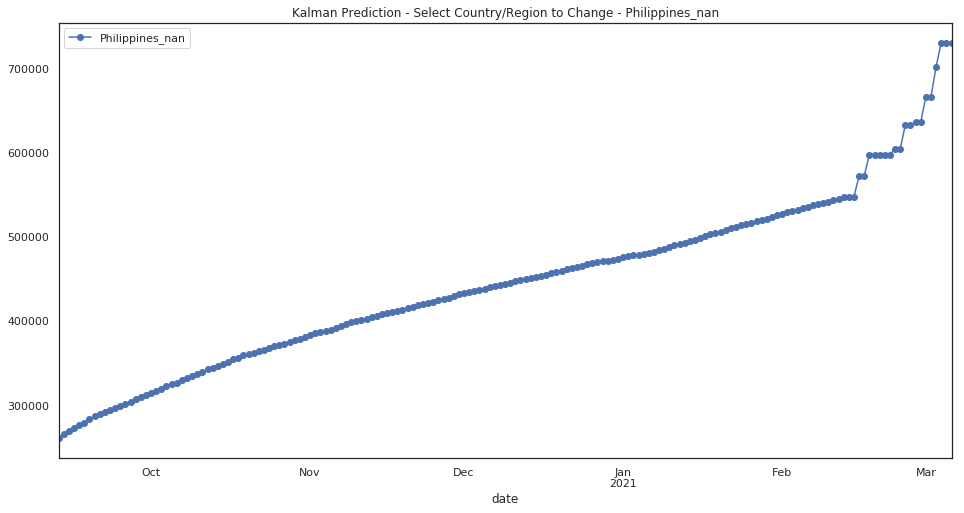

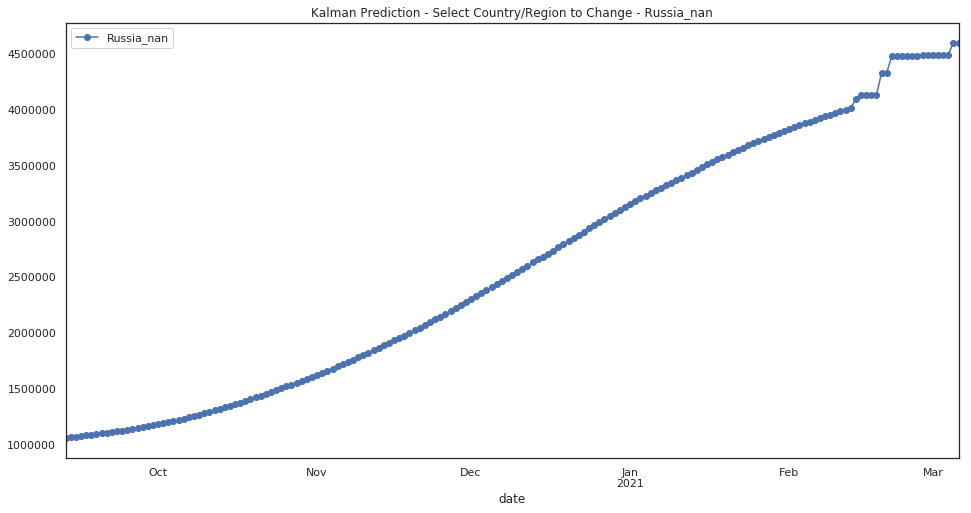

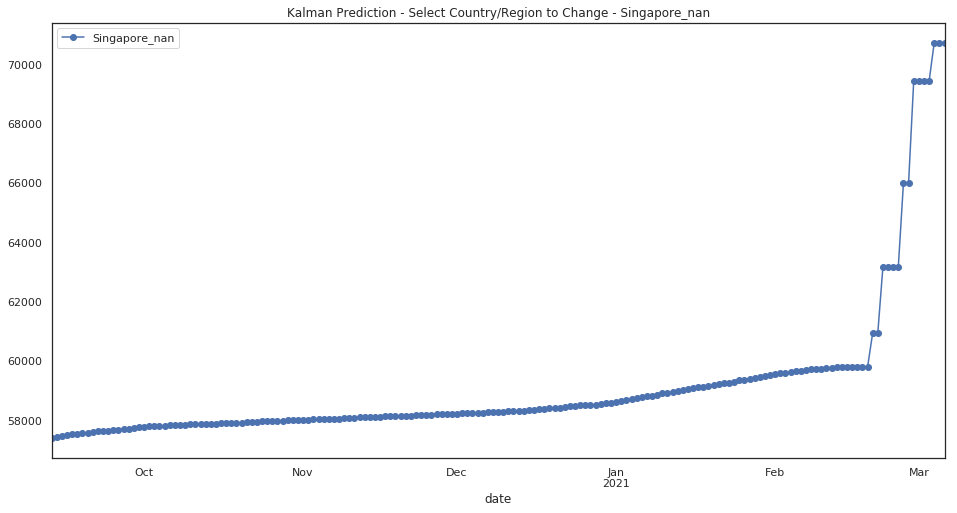

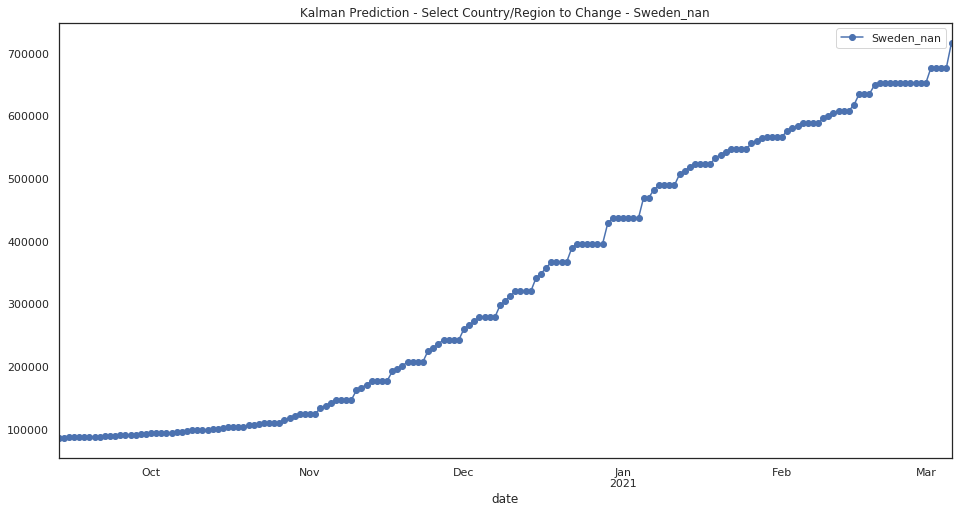

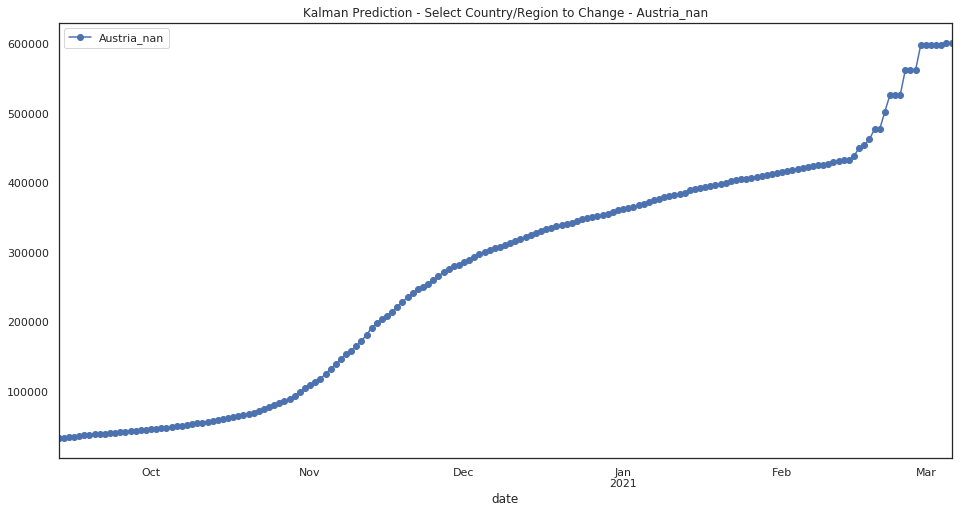

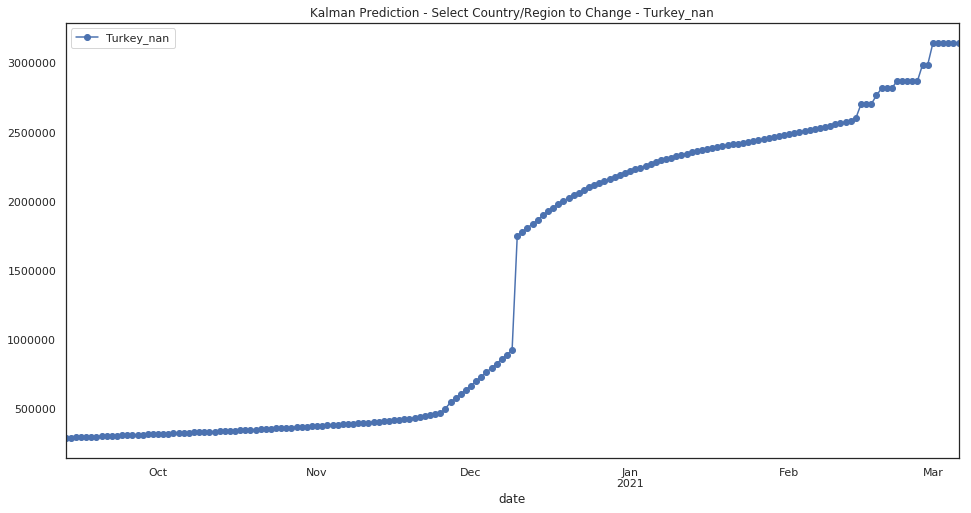

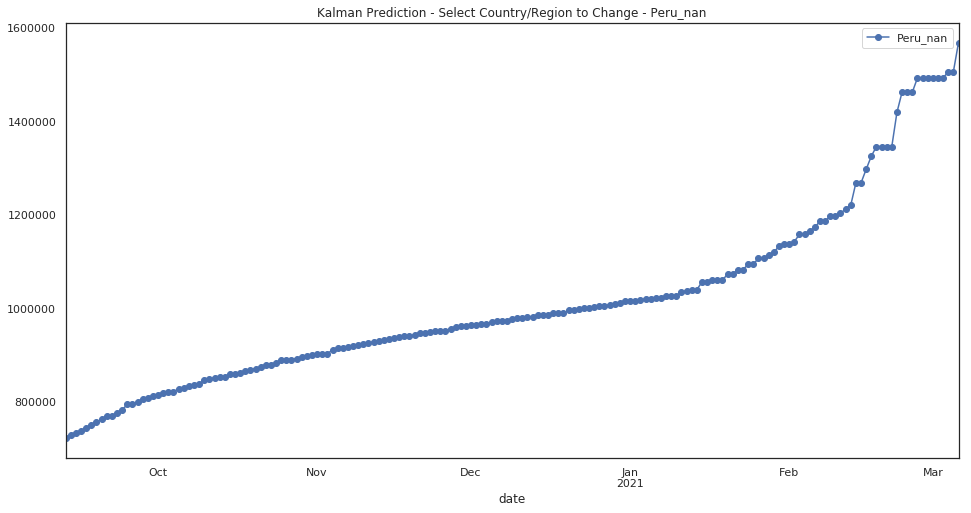

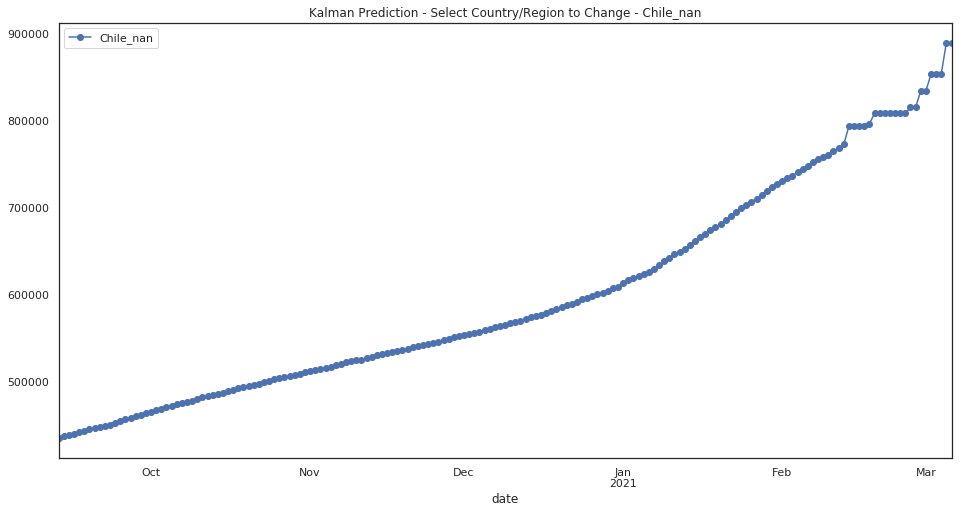

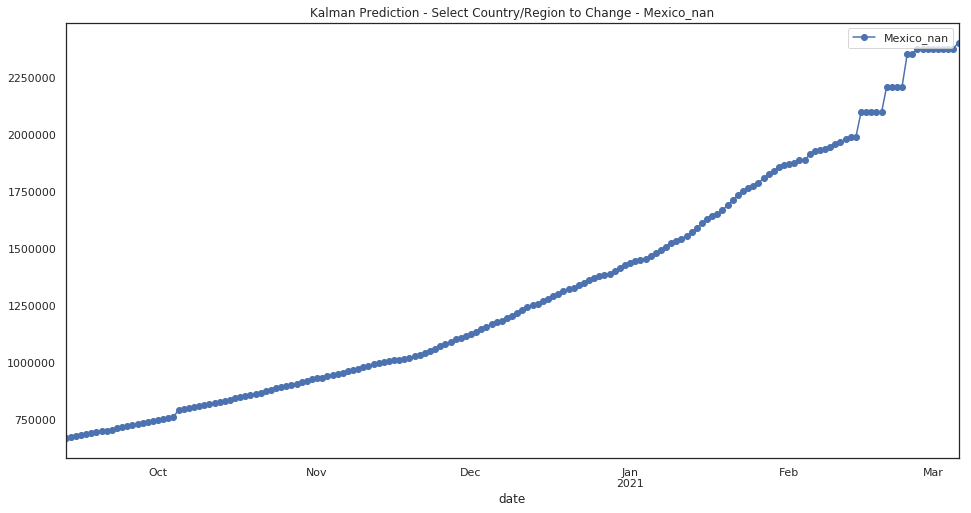

In [67]:
### Joao - Dynamic plot all regions individually
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [68]:
max_p0=all_new[:]
max_p0=max_p0.max()
max_date=max_p0[:1]
max_p0=max_p0[1:]
max_p0=pd.DataFrame(max_p0)
max_p0=max_p0.astype(str)
max_p0['pred_confirmed']=max_p0[max_p0.columns[0]].str.split(' ').str[-1].astype(float)
max_p0[max_p0.columns[0]]=max_p0[max_p0.columns[0]][:-len(max_p0['pred_confirmed'])]
max_p0=max_p0.sort_values(by='pred_confirmed', ascending=False)
#
print("### -- Confirmed max cases per country at last prediction date -- ###")
print(max_date)
max_p0[:]

### -- Confirmed max cases per country at last prediction date -- ###
date    2021-03-06 00:00:00
dtype: object


0  pred_confirmed
United States_nan                           NaN      42843262.0
Brazil_nan                                  NaN      13985807.0
India_nan                                   NaN      11962218.0
United Kingdom_nan                          NaN       4696767.0
Russia_nan                                  NaN       4598593.0
France_nan                                  NaN       4222839.0
Spain_nan                                   NaN       4092925.0
Italy_nan                                   NaN       3796450.0
Turkey_nan                                  NaN       3147768.0
Colombia_nan                                NaN       3069599.0
Germany_nan                                 NaN       2944563.0
Argentina_nan                               NaN       2719733.0
Mexico_nan                                  NaN       2403264.0
Iran_nan                                    NaN       1941841.0
South Africa_nan                            NaN       1893881.0
Poland_nan                                  NaN       1780177.0
Ukraine_nan                                 NaN       1719235.0
Peru_nan                                    NaN       1568570.0
Indonesia_nan                               NaN       1500599.0
Netherlands_nan                             NaN       1412165.0
Czechia_nan                                 NaN       1283926.0
Portugal_nan                                NaN       1145688.0
Belgium_nan                                 NaN       1075370.0
Romania_nan                                 NaN       1005797.0
Israel_nan                                  NaN        893577.0
Chile_nan                                   NaN        889601.0
Iraq_nan                                    NaN        760884.0
Bangladesh_nan                              NaN        757123.0
Philippines_nan                             NaN        730318.0
Sweden_nan                                  NaN        716923.0
...                                         ...             ...
Canada_Prince Edward Island                 NaN           157.0
Australia_Australian Capital Territory      NaN           154.0
Timor-Leste_nan                             NaN           148.0
Australia_Northern Territory                NaN           114.0
Canada_Yukon                                NaN            85.0
China_Ningxia                               NaN            82.0
France_New Caledonia                        NaN            73.0
Canada_Northwest Territories                NaN            72.0
United Kingdom_Falkland Islands (Malvinas)  NaN            69.0
Fiji_nan                                    NaN            64.0
China_Macau                                 NaN            57.0
Saint Kitts and Nevis_nan                   NaN            53.0
Laos_nan                                    NaN            46.0
Denmark_Greenland                           NaN            34.0
Holy See_nan                                NaN            34.0
France_Saint Pierre and Miquelon            NaN            31.0
United Kingdom_Montserrat                   NaN            23.0
United Kingdom_Anguilla                     NaN            22.0
China_Qinghai                               NaN            20.0
Canada_Grand Princess                       NaN            19.0
Solomon Islands_nan                         NaN            19.0
Canada_Repatriated Travellers               NaN            15.0
France_Wallis and Futuna                    NaN            10.0
MS Zaandam_nan                              NaN             9.0
Marshall Islands_nan                        NaN             4.0
Samoa_nan                                   NaN             2.0
Vanuatu_nan                                 NaN             1.0
Micronesia_nan                              NaN             1.0
China_Tibet                                 NaN             1.0
Canada_Diamond Princess                     NaN             0.0

[273 rows x 2 columns]

In [69]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [70]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [71]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-2,2]*100 -1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-4,2]*100 -1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-8,2]*100 -1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(10000000) # Fill 10M population if null
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
#test_iter['infected_rate'] =((test_iter['last_day']+1)*10000)/((test_iter['population']+1)*100)*100
test_iter['infected_rate']=(((test_iter['last_day'] +1)*100)/((test_iter['population'] +1)*100000) *10)
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [72]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [73]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        
### Joao - Save long term predictions
pred.to_csv('data/pred_'+str(num_days_R_prediction)+'_days.csv', index = False, header=True)
###
pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [74]:
pred[:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-09-13          55799.0      32226.0      64016.0      23603.0   
2020-09-14          55847.0      32370.0      64225.0      23684.0   
2020-09-15          38772.0      11520.0      48496.0       1438.0   
2020-09-16          38815.0      11672.0      48734.0       1438.0   
2020-09-17          38855.0      11816.0      48966.0       1483.0   
2020-09-18          38872.0      11948.0      49194.0       1483.0   
2020-09-19          38897.0      12073.0      49413.0       1564.0   
2020-09-20          38919.0      12226.0      49623.0       1564.0   
2020-09-21          39242.0      12534.0      50149.0       2007.0   
2020-09-22          39284.0      12689.0      50342.0       1681.0   
2020-09-23          39331.0      12838.0      50530.0       2119.0   
2020-09-24          39348.0      12980.0      50711.0       1753.0   
2020-09-25          39368.0      13084.0      50888.0       2149.0   
2020-09-26          39377.0      13209.0      51051.0       1836.0   
2020-09-27          39407.0      13338.0      51206.0       2162.0   
2020-09-28          39422.0      13465.0      51354.0       2274.0   
2020-09-29          39441.0      13559.0      51508.0       1966.0   
2020-09-30          39456.0      13701.0      51670.0       2399.0   
2020-10-01          39472.0      13855.0      51833.0       2050.0   
2020-10-02          39479.0      13984.0      51992.0       2411.0   
2020-10-03          39488.0      14141.0      52143.0       2110.0   
2020-10-04          39526.0      14304.0      52284.0       2384.0   
2020-10-05          39597.0      14452.0      52419.0       2608.0   
2020-10-06          39661.0      14614.0      52547.0       2370.0   
2020-10-07          39729.0      14759.0      52669.0       2996.0   
2020-10-08          39796.0      14926.0      52806.0       2568.0   
2020-10-09          39867.0      15090.0      52952.0       3079.0   
2020-10-10          39882.0      15261.0      53091.0       2696.0   
2020-10-11          39973.0      15433.0      53226.0       3044.0   
2020-10-12          40033.0      15601.0      53462.0       3302.0   
...                     ...          ...          ...          ...   
2021-02-06          55503.0      84192.0     108800.0      10172.0   
2021-02-07          55518.0      85321.0     109136.0      10206.0   
2021-02-08          55535.0      86290.0     109495.0      10251.0   
2021-02-09          55560.0      87449.0     109685.0      10275.0   
2021-02-10          55577.0      88644.0     109932.0      10312.0   
2021-02-11          55598.0      89734.0     110176.0      10352.0   
2021-02-12          55624.0      90801.0     110444.0      10391.0   
2021-02-13          55652.0      91923.0     110657.0      10427.0   
2021-02-14          55659.0      96212.0     114690.0      10500.0   
2021-02-15          55657.0      97578.0     116394.0      10626.0   
2021-02-16          56952.0      96761.0     115500.0      10947.0   
2021-02-17          57212.0      97544.0     115578.0      11376.0   
2021-02-18          59521.0      97773.0     115866.0      11415.0   
2021-02-19          60019.0     102973.0     116157.0      11418.0   
2021-02-20          59845.0     105233.0     116113.0      11418.0   
2021-02-21          62935.0     105456.0     116113.0      11635.0   
2021-02-22          63511.0     106349.0     116221.0      11775.0   
2021-02-23          63386.0     105985.0     116221.0      11775.0   
2021-02-24          63458.0     106357.0     120989.0      12241.0   
2021-02-25          63670.0     106357.0     123100.0      12351.0   
2021-02-26          64094.0     112038.0     122298.0      12351.0   
2021-02-27          64101.0     114917.0     126434.0      12351.0   
2021-02-28          65737.0     113381.0     127733.0      12351.0   
2021-03-01          66319.0     113554.0     126735.0      12351.0   
2021-03-02

In [75]:
### JOAO - FIX - issue if all source days ts[:]
## Comment for -35days start. 26feb.2020 ts=ts[35:]
## 06Aug2020 - For all
pred=pred[:-1]

In [76]:
region1=max_p0[max_p0.columns[0]].astype(str).reset_index().rename(columns={"index": "region"}).get_values()
region=[region[0] for region in region1]
region

['United States_nan',
 'Brazil_nan',
 'India_nan',
 'United Kingdom_nan',
 'Russia_nan',
 'France_nan',
 'Spain_nan',
 'Italy_nan',
 'Turkey_nan',
 'Colombia_nan',
 'Germany_nan',
 'Argentina_nan',
 'Mexico_nan',
 'Iran_nan',
 'South Africa_nan',
 'Poland_nan',
 'Ukraine_nan',
 'Peru_nan',
 'Indonesia_nan',
 'Netherlands_nan',
 'Czechia_nan',
 'Portugal_nan',
 'Belgium_nan',
 'Romania_nan',
 'Israel_nan',
 'Chile_nan',
 'Iraq_nan',
 'Bangladesh_nan',
 'Philippines_nan',
 'Sweden_nan',
 'Pakistan_nan',
 'Serbia_nan',
 'Austria_nan',
 'Switzerland_nan',
 'Morocco_nan',
 'Japan_nan',
 'Saudi Arabia_nan',
 'Hungary_nan',
 'Panama_nan',
 'United Arab Emirates_nan',
 'Jordan_nan',
 'Bolivia_nan',
 'Lebanon_nan',
 'Canada_Quebec',
 'Slovakia_nan',
 'Ecuador_nan',
 'Bulgaria_nan',
 'Canada_Ontario',
 'Azerbaijan_nan',
 'Belarus_nan',
 'Denmark_nan',
 'Nepal_nan',
 'Georgia_nan',
 'Croatia_nan',
 'Kazakhstan_nan',
 'Tunisia_nan',
 'Ireland_nan',
 'Malaysia_nan',
 'Dominican Republic_nan',
 'Egy

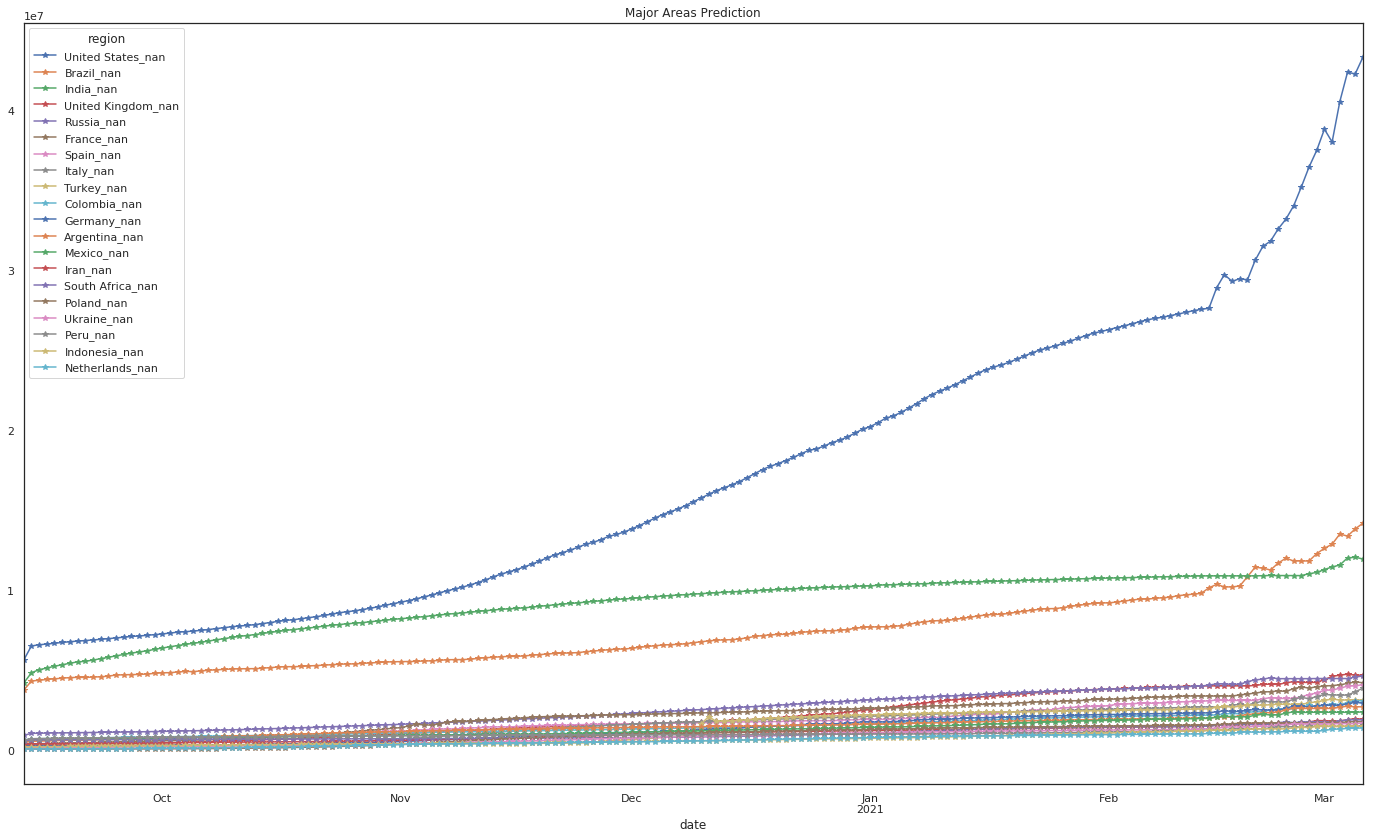

In [77]:
#
p=pred[region[:20]]
p[:].reindex(p.max().sort_values(ascending=False).index, axis=1).plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

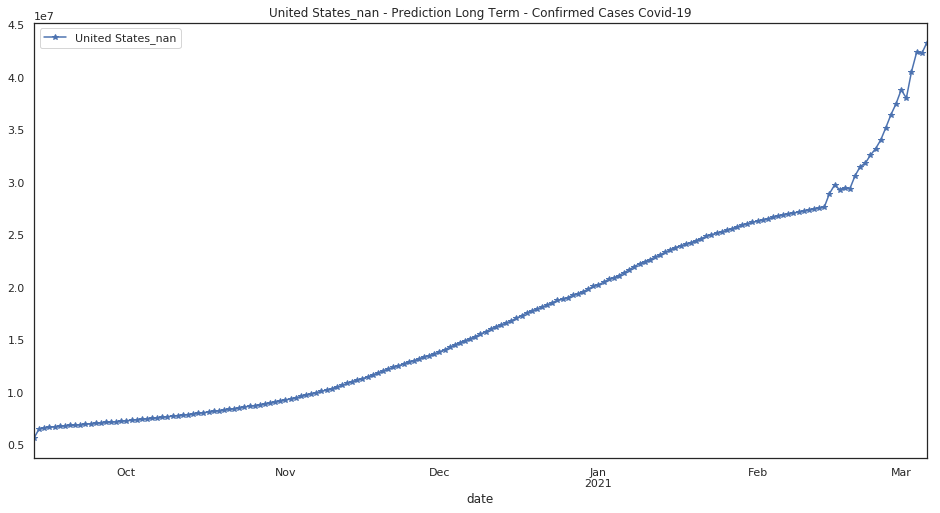

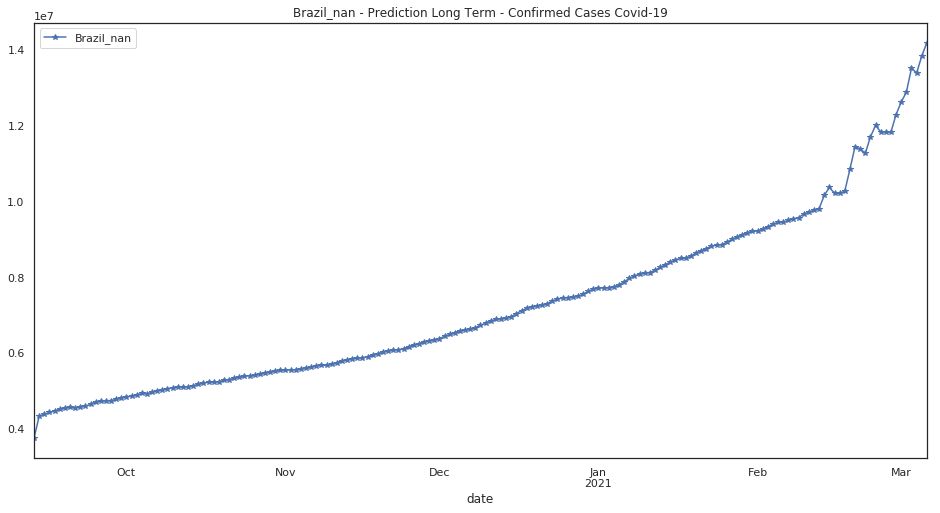

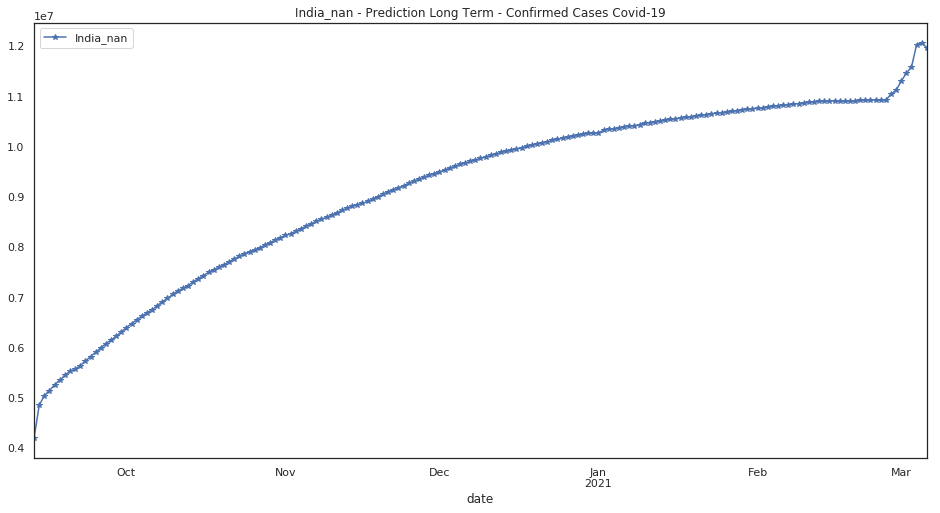

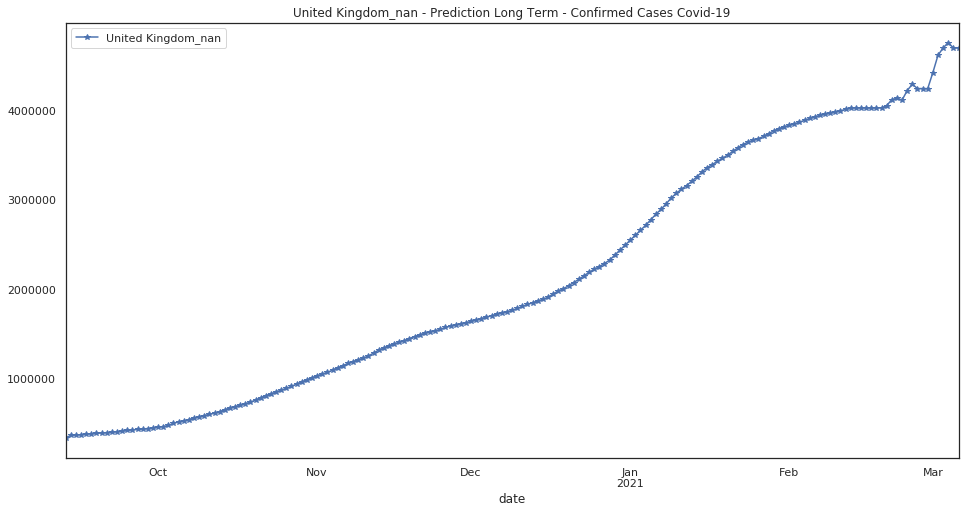

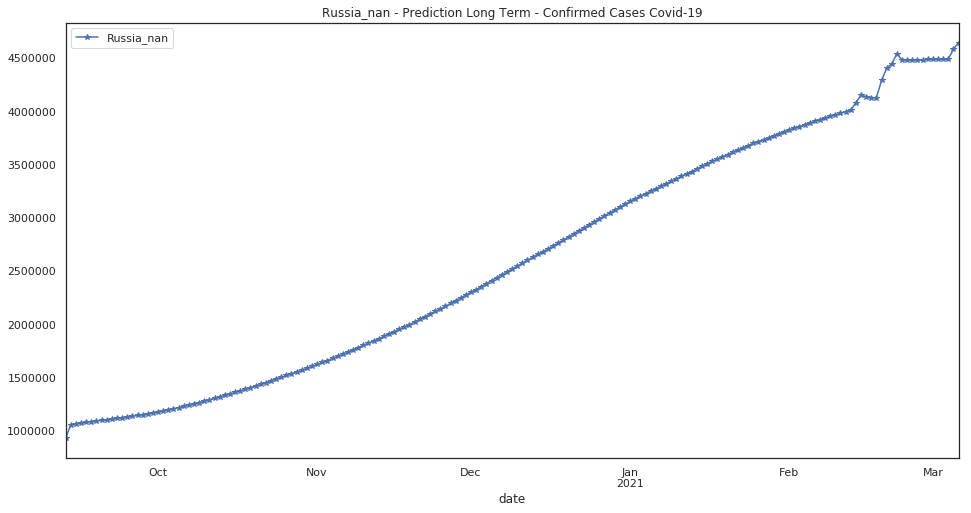

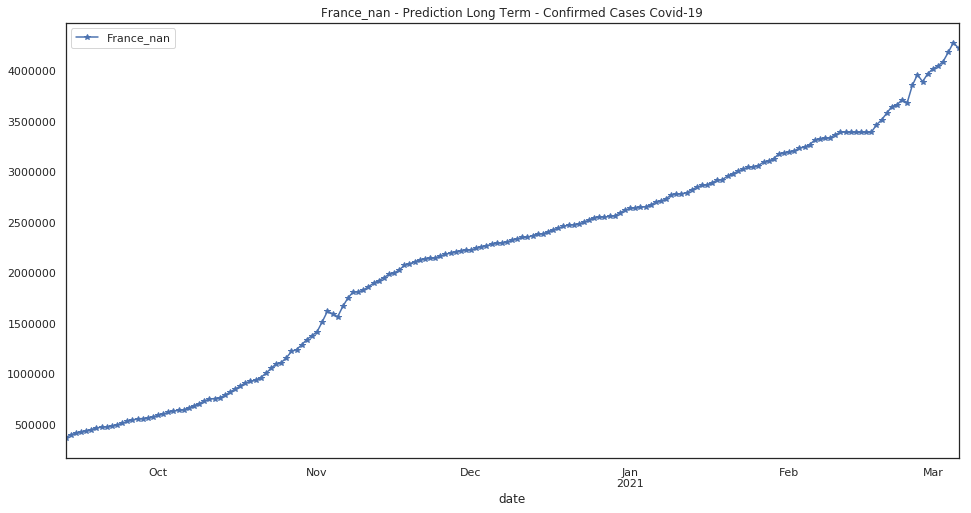

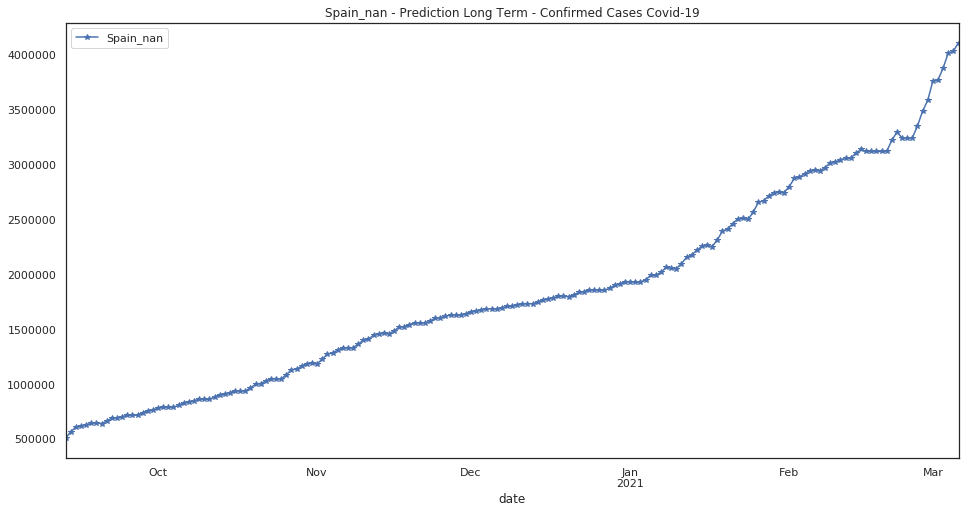

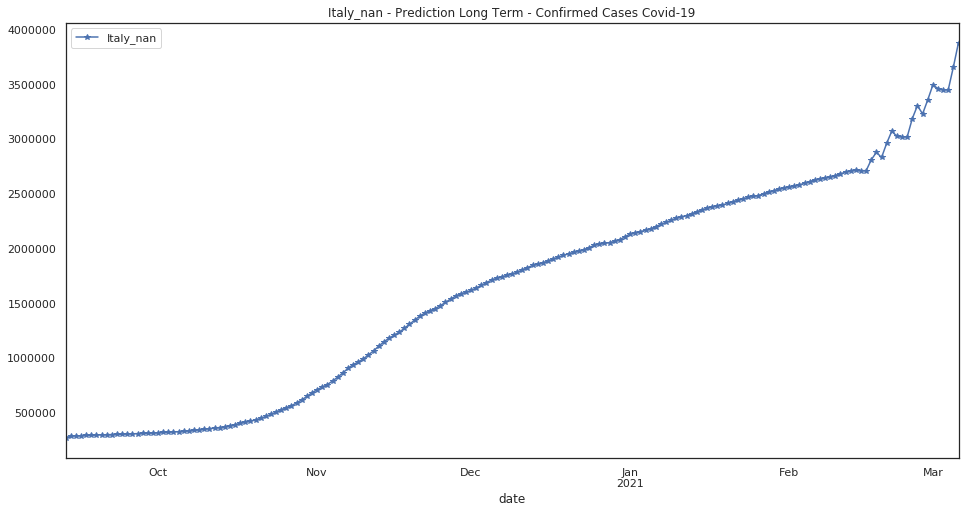

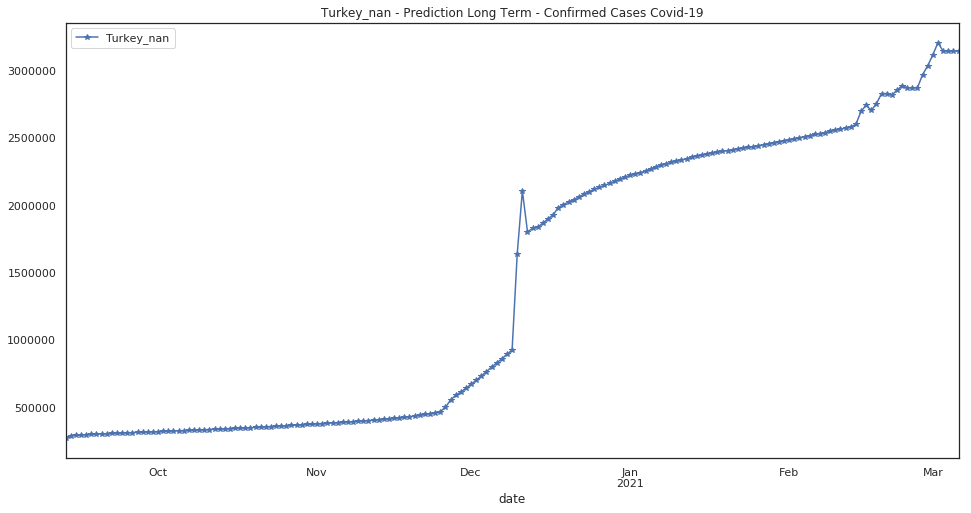

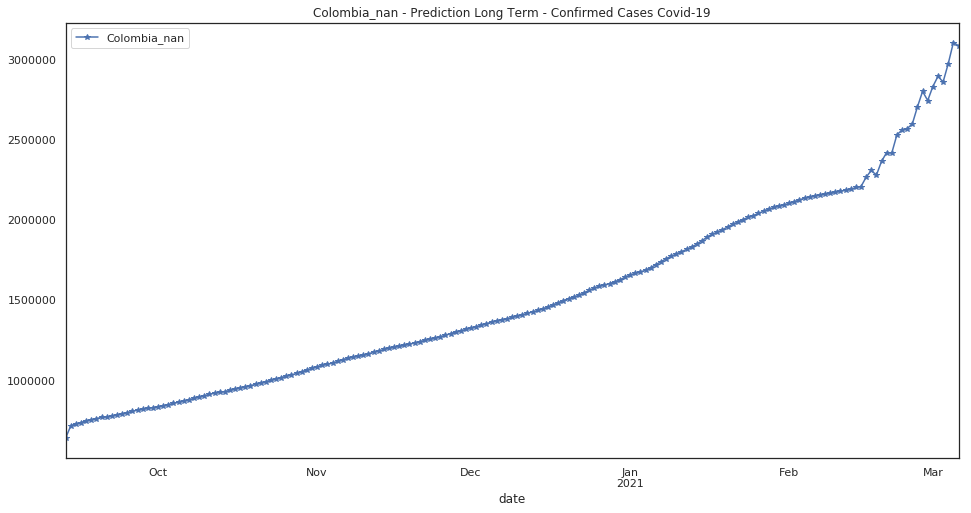

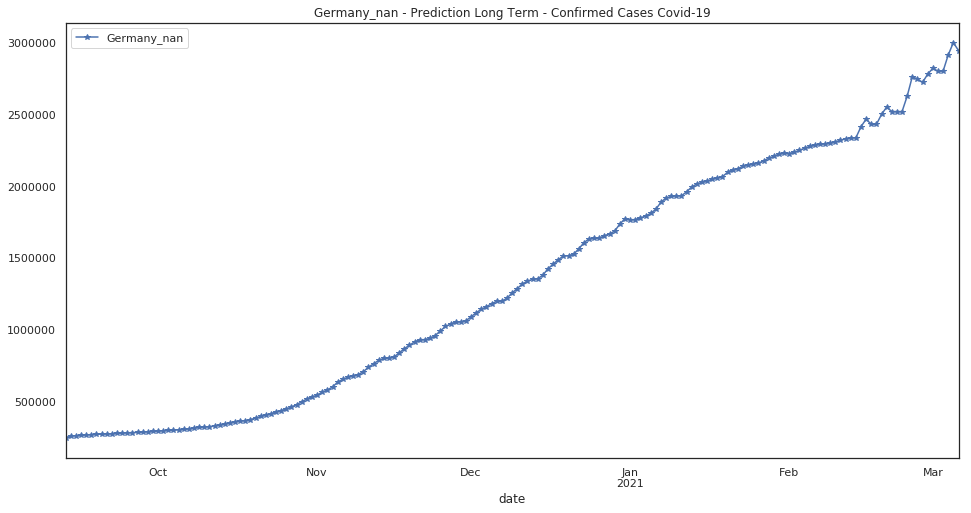

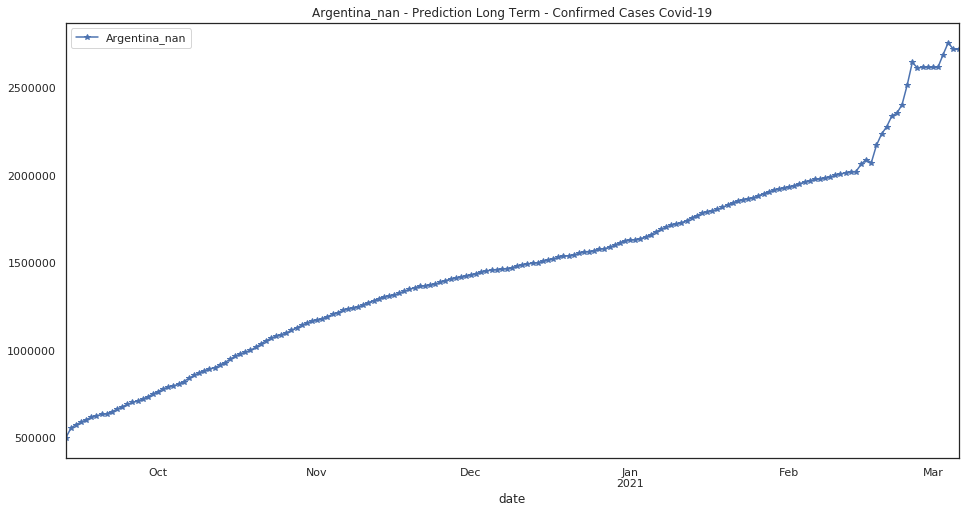

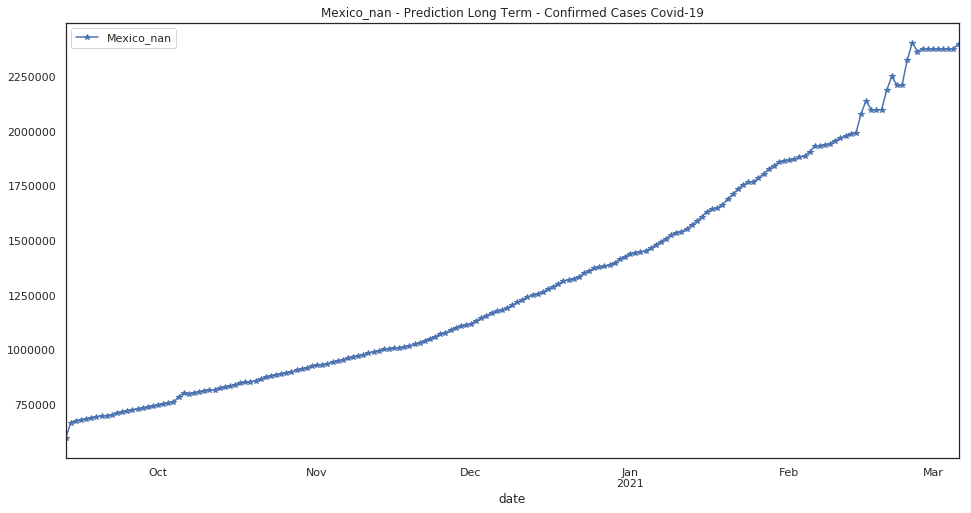

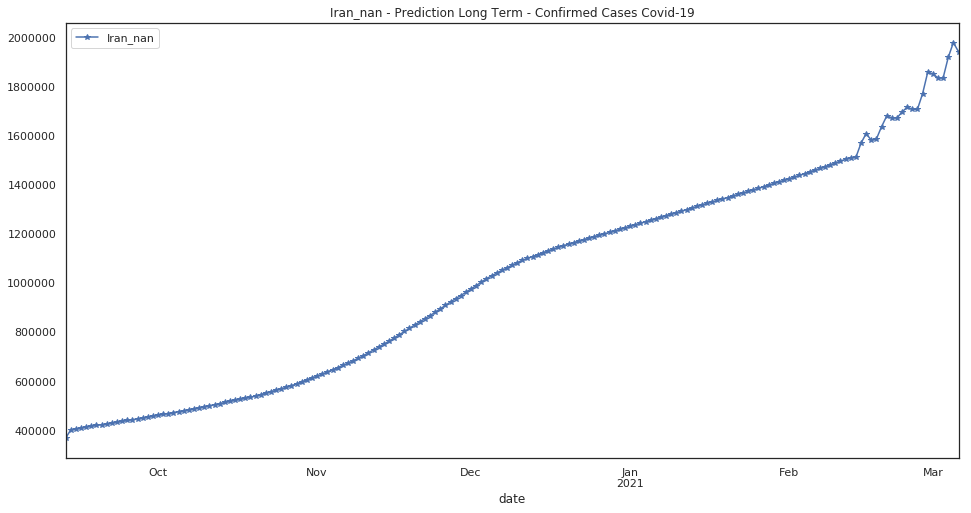

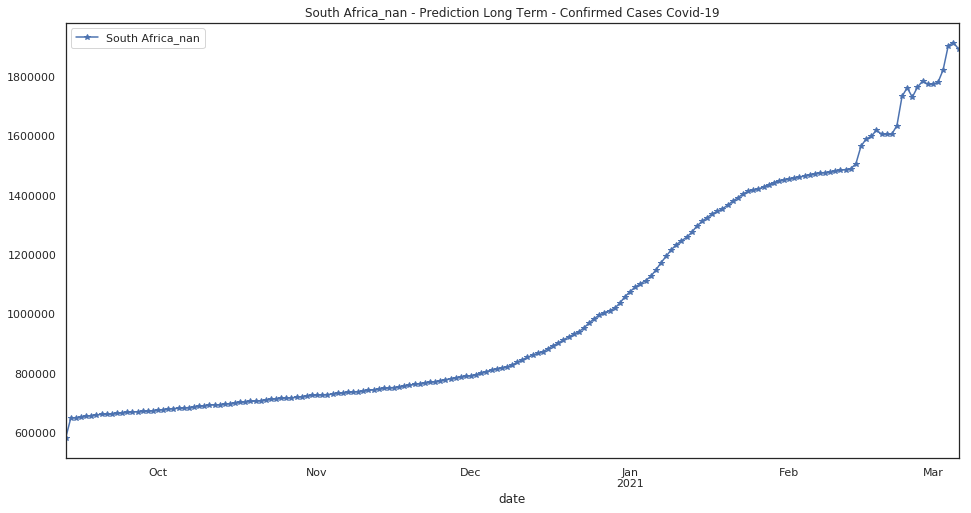

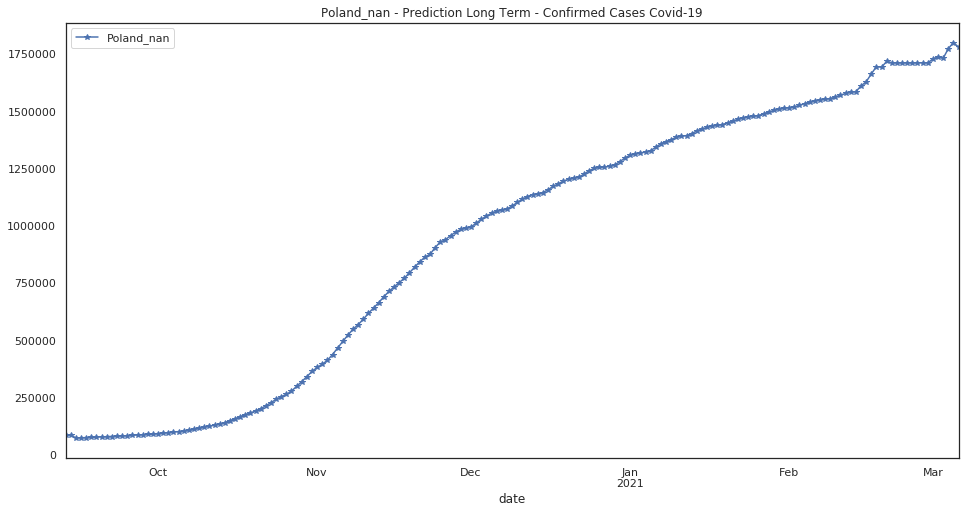

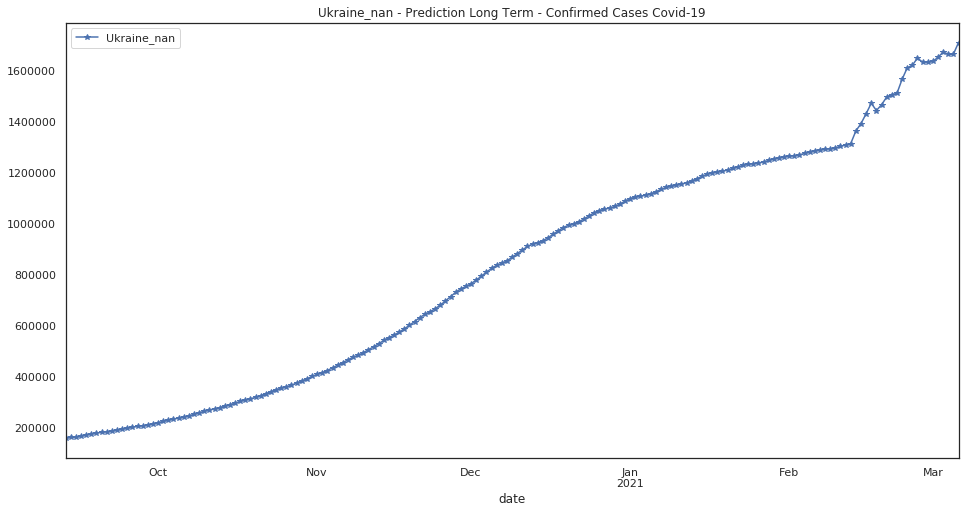

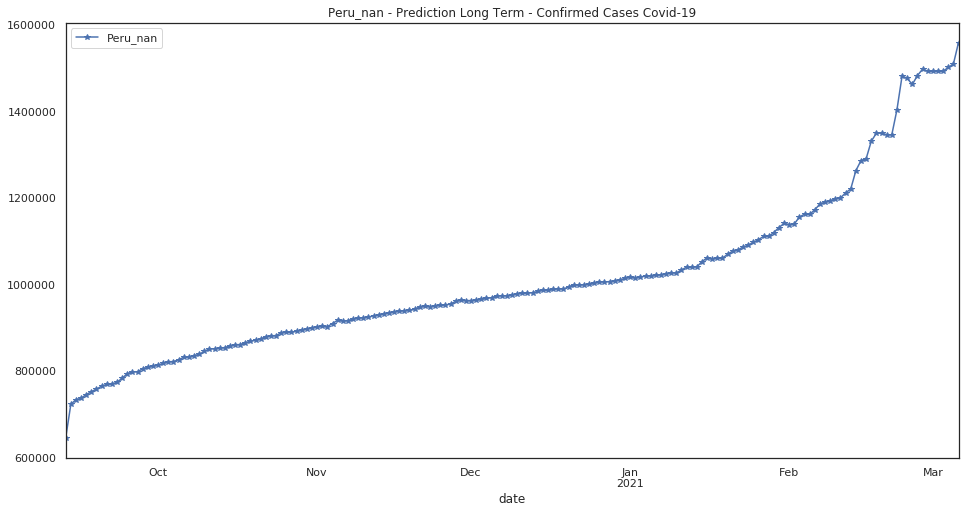

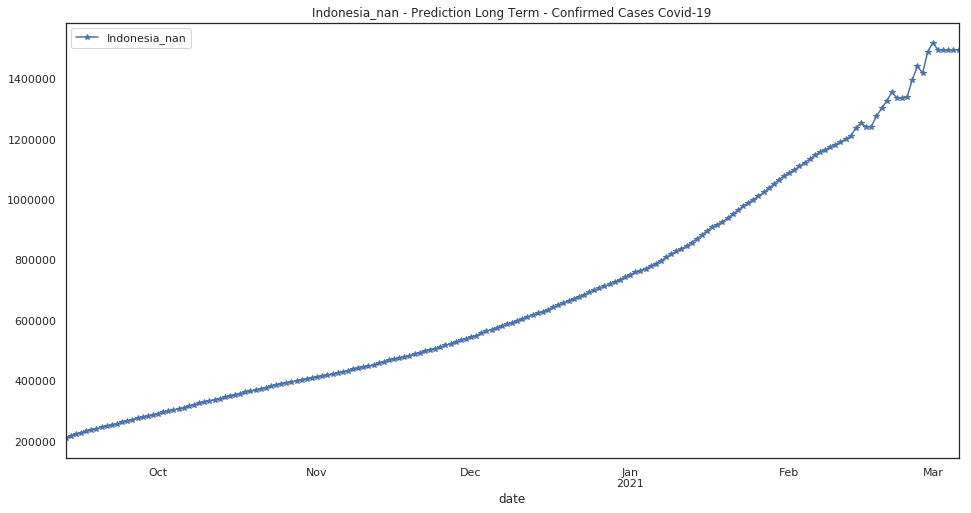

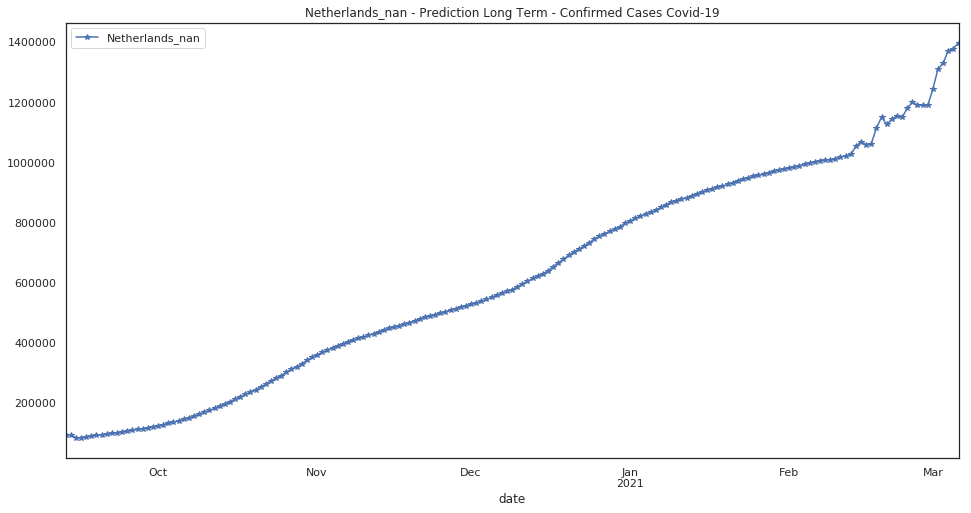

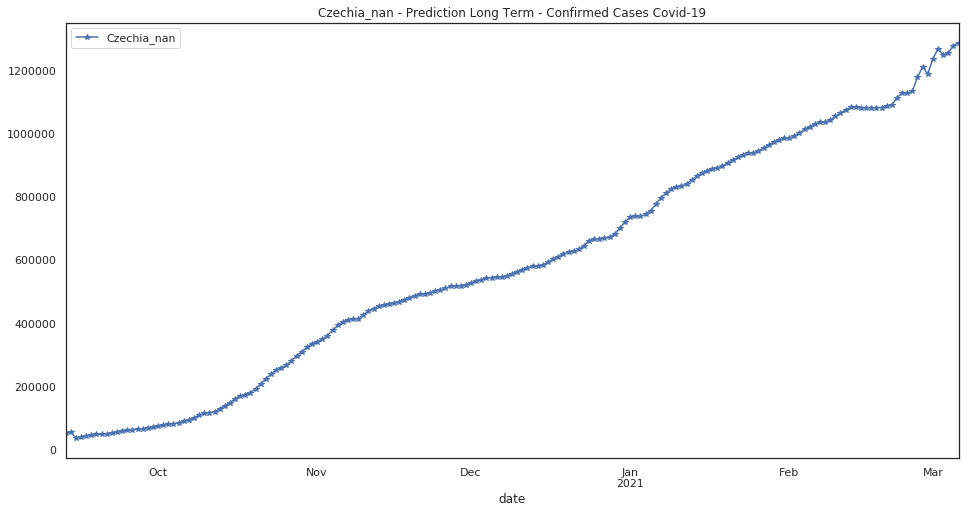

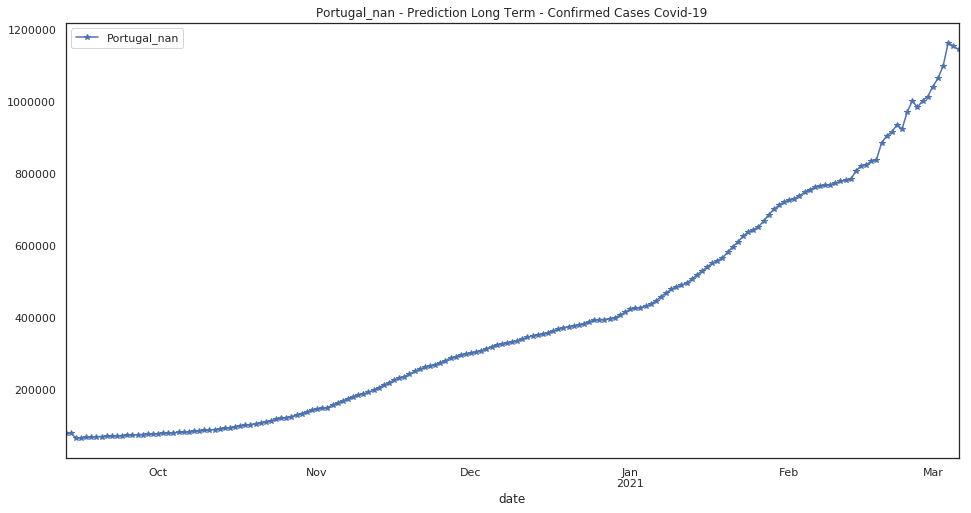

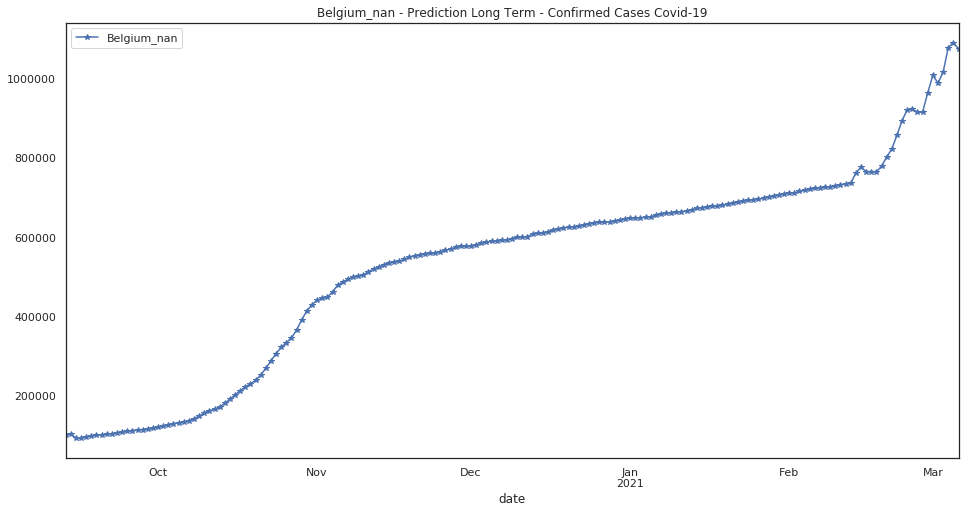

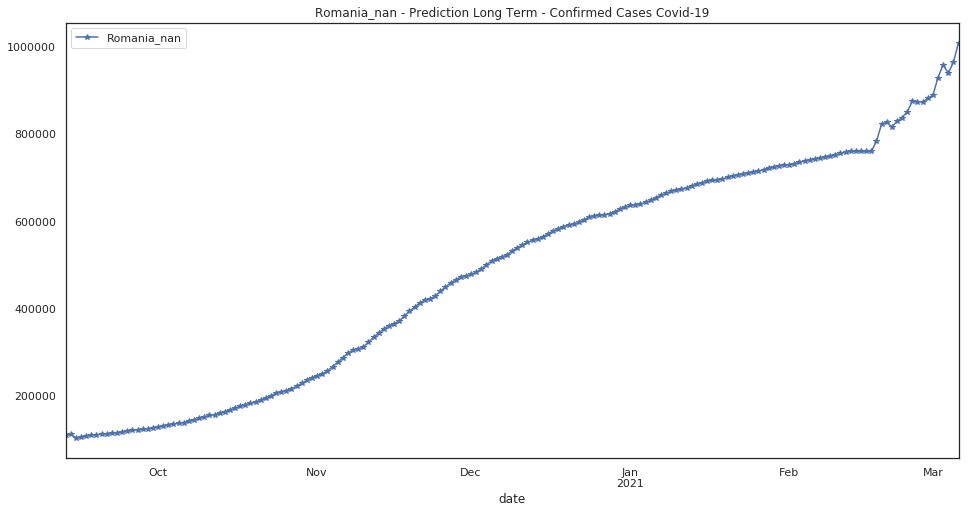

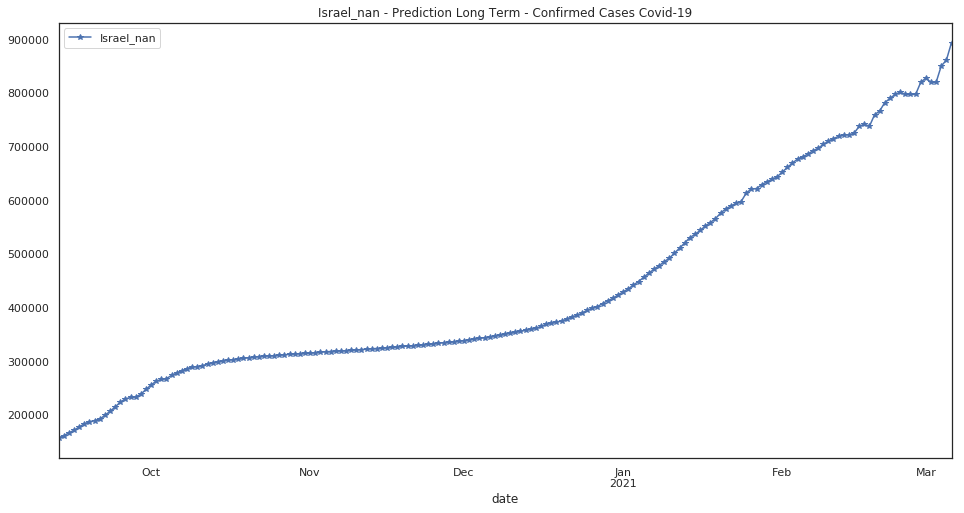

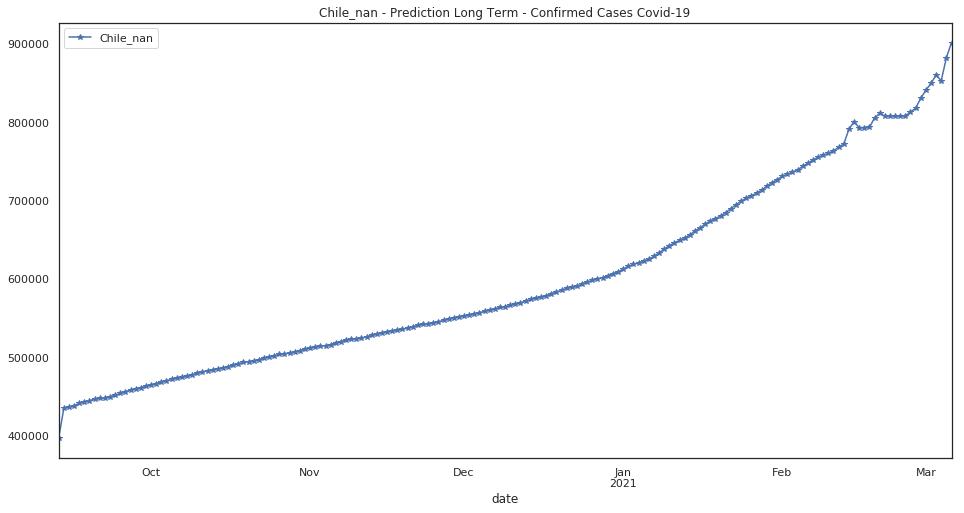

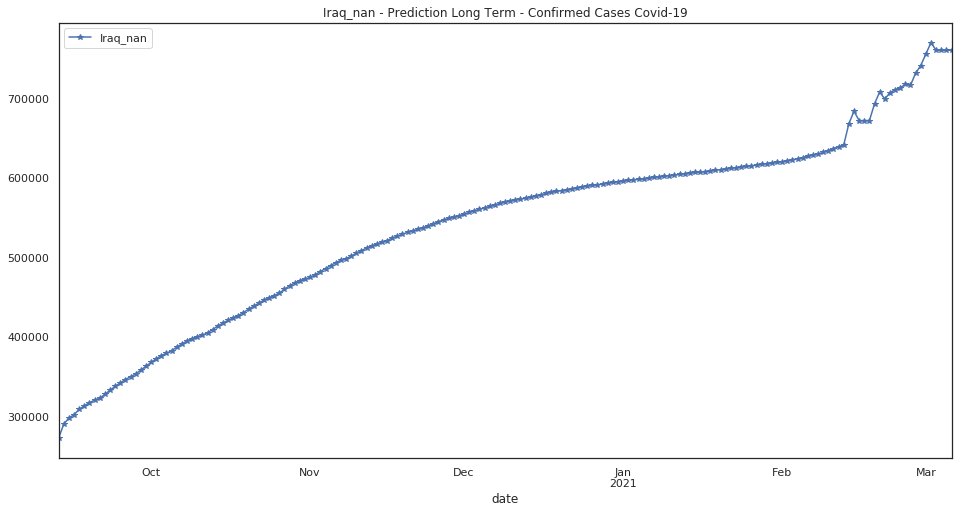

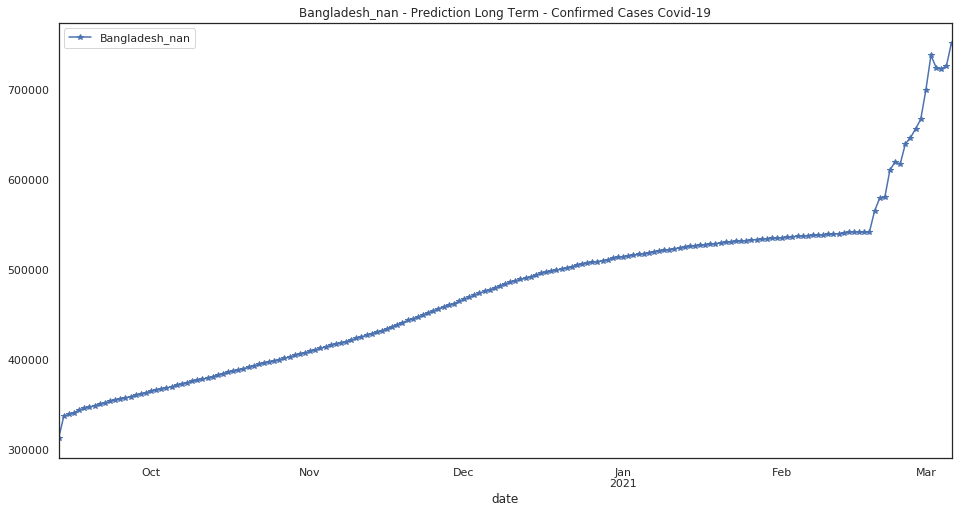

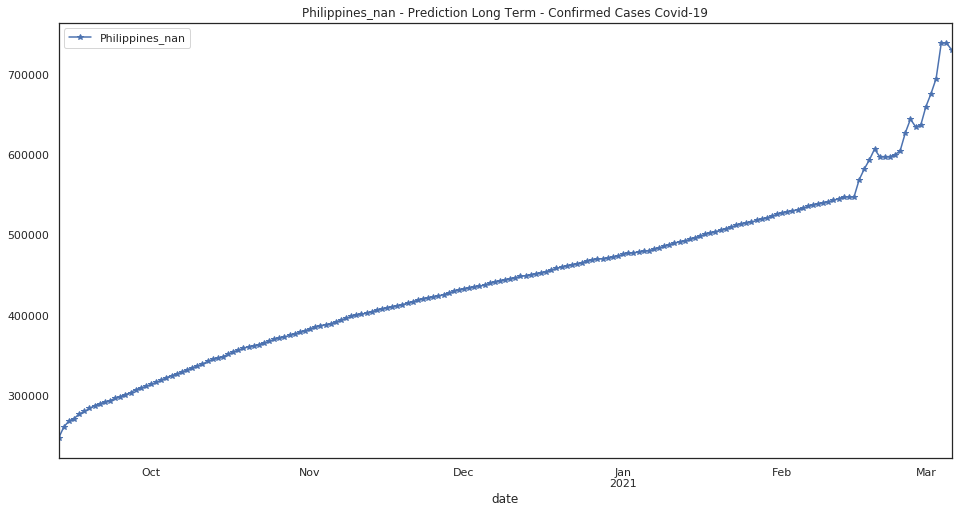

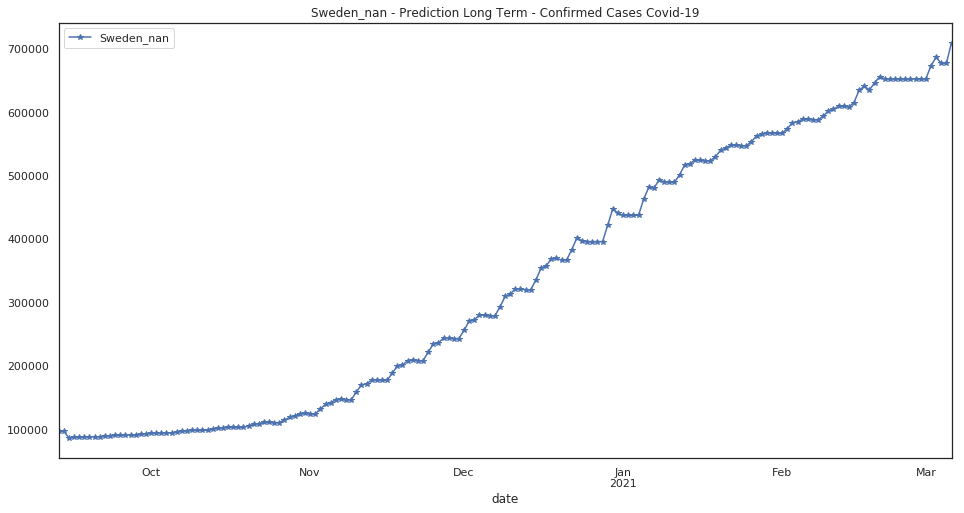

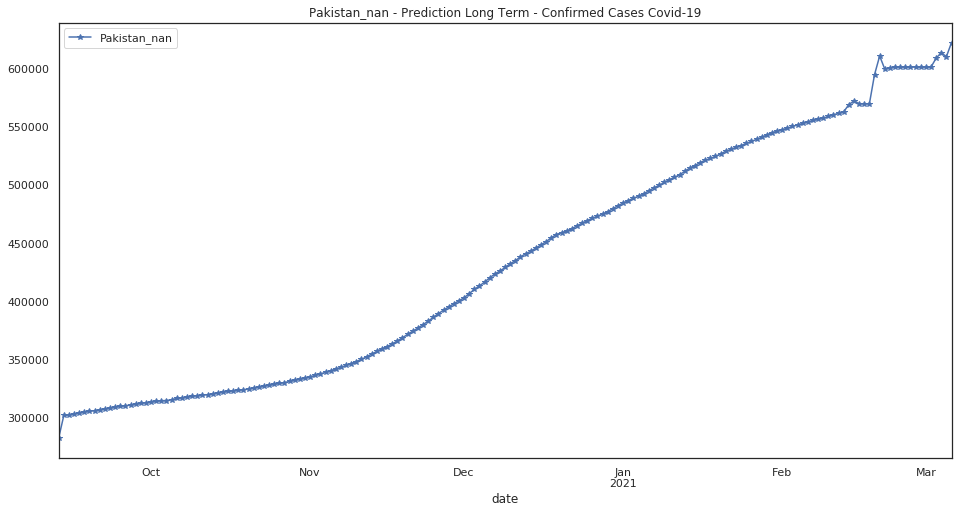

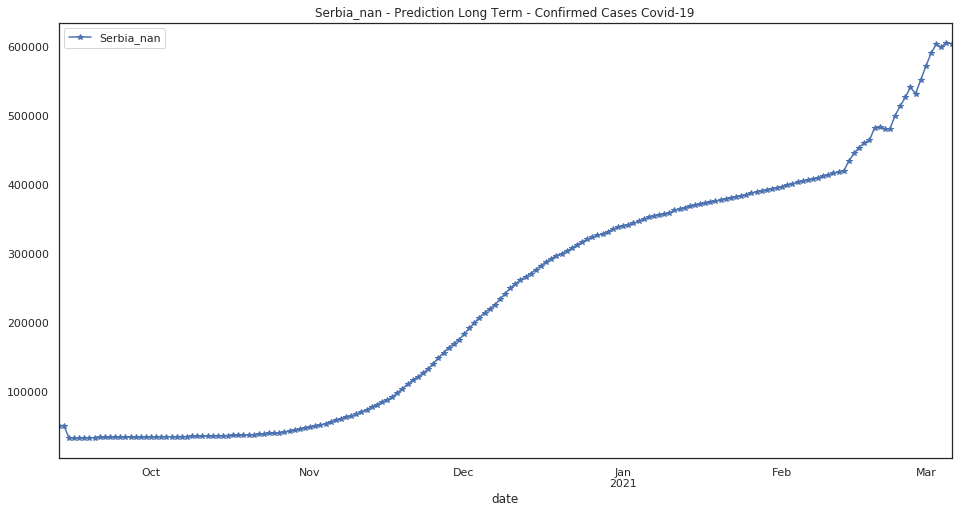

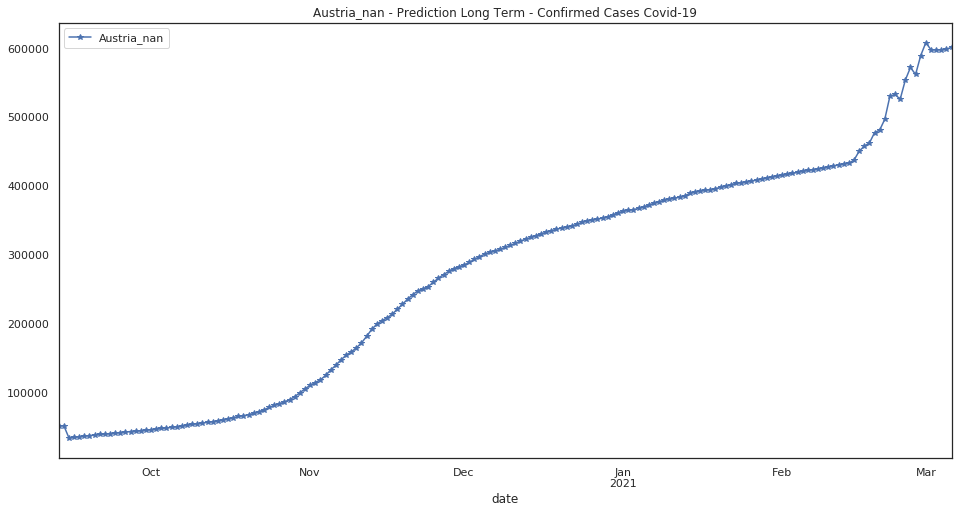

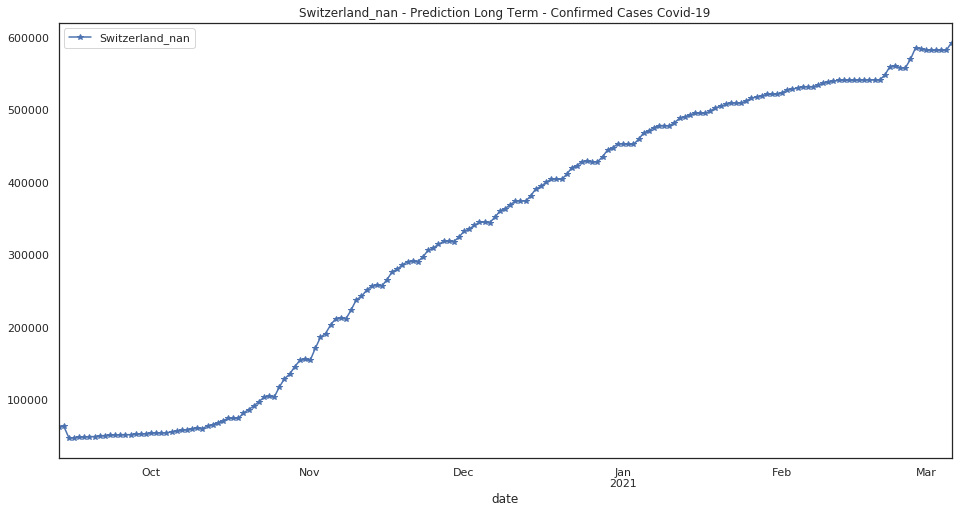

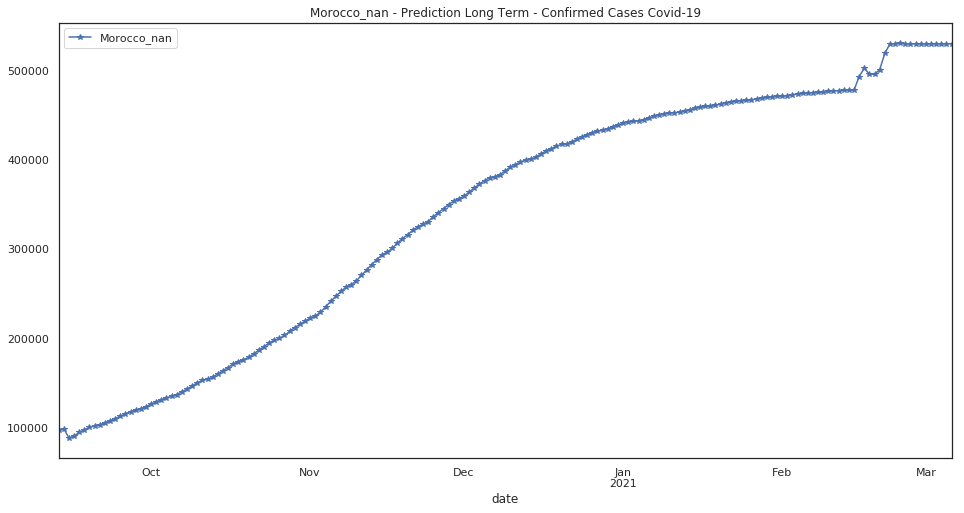

In [78]:
#
rgsx=region[:35]
for i in range (0,len(rgsx)):
        rg_print=rgsx[i]
        pred_prg=pd.DataFrame()
        pred_prg=pred[rg_print]
        pred_prg[:].plot(marker='*',figsize=(16,8),title =rg_print+' - Prediction Long Term - Confirmed Cases Covid-19')
        plt.legend(loc = 'upper left')
        plt.show()
#

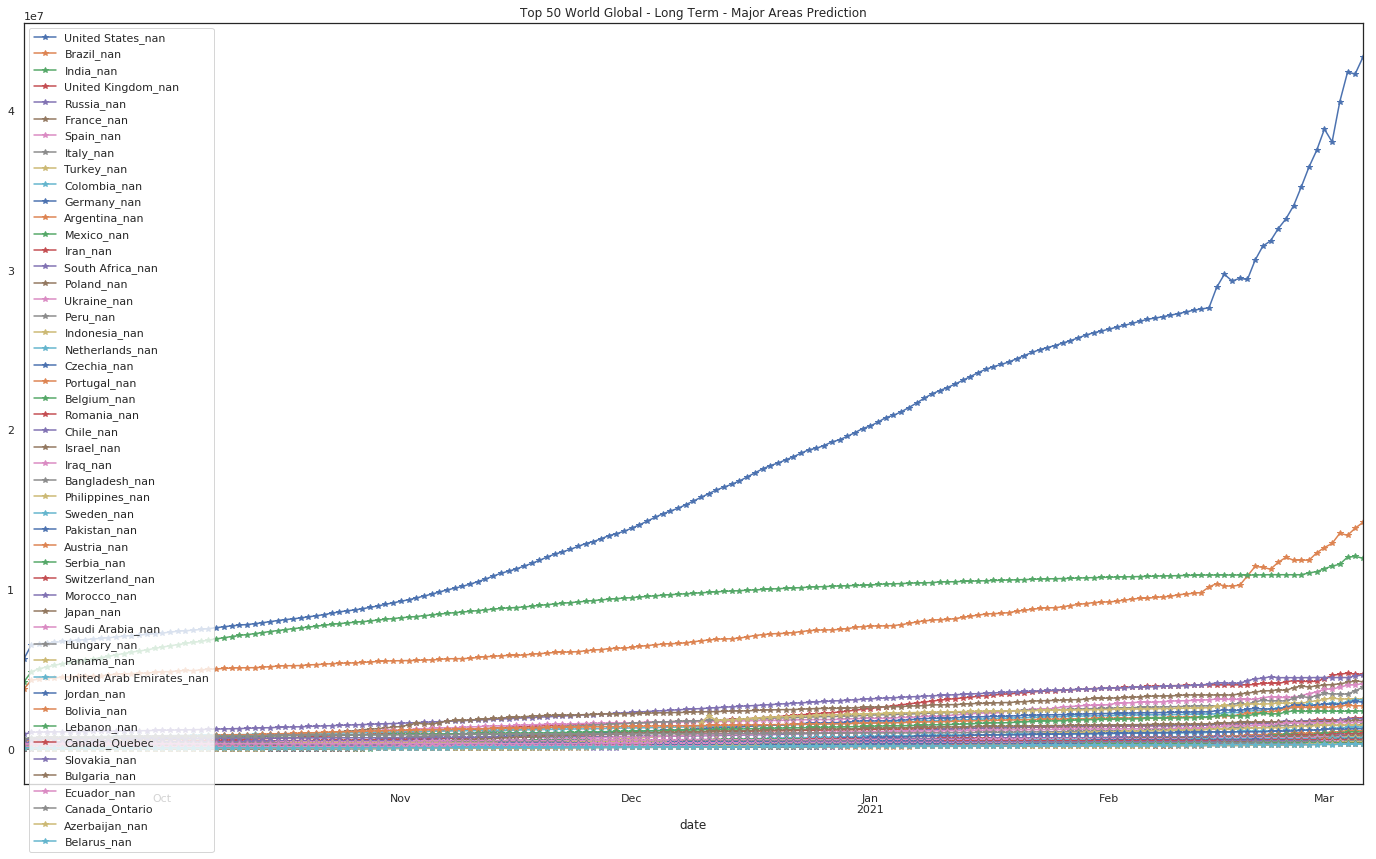

In [79]:
#region=my_train_list
pv2=pred
pv2=pv2.reindex(pv2.max().sort_values(ascending=False).index, axis=1)
pv2[:].iloc[:,0:50].plot(marker='*',figsize=(24,14),title ='Top 50 World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()

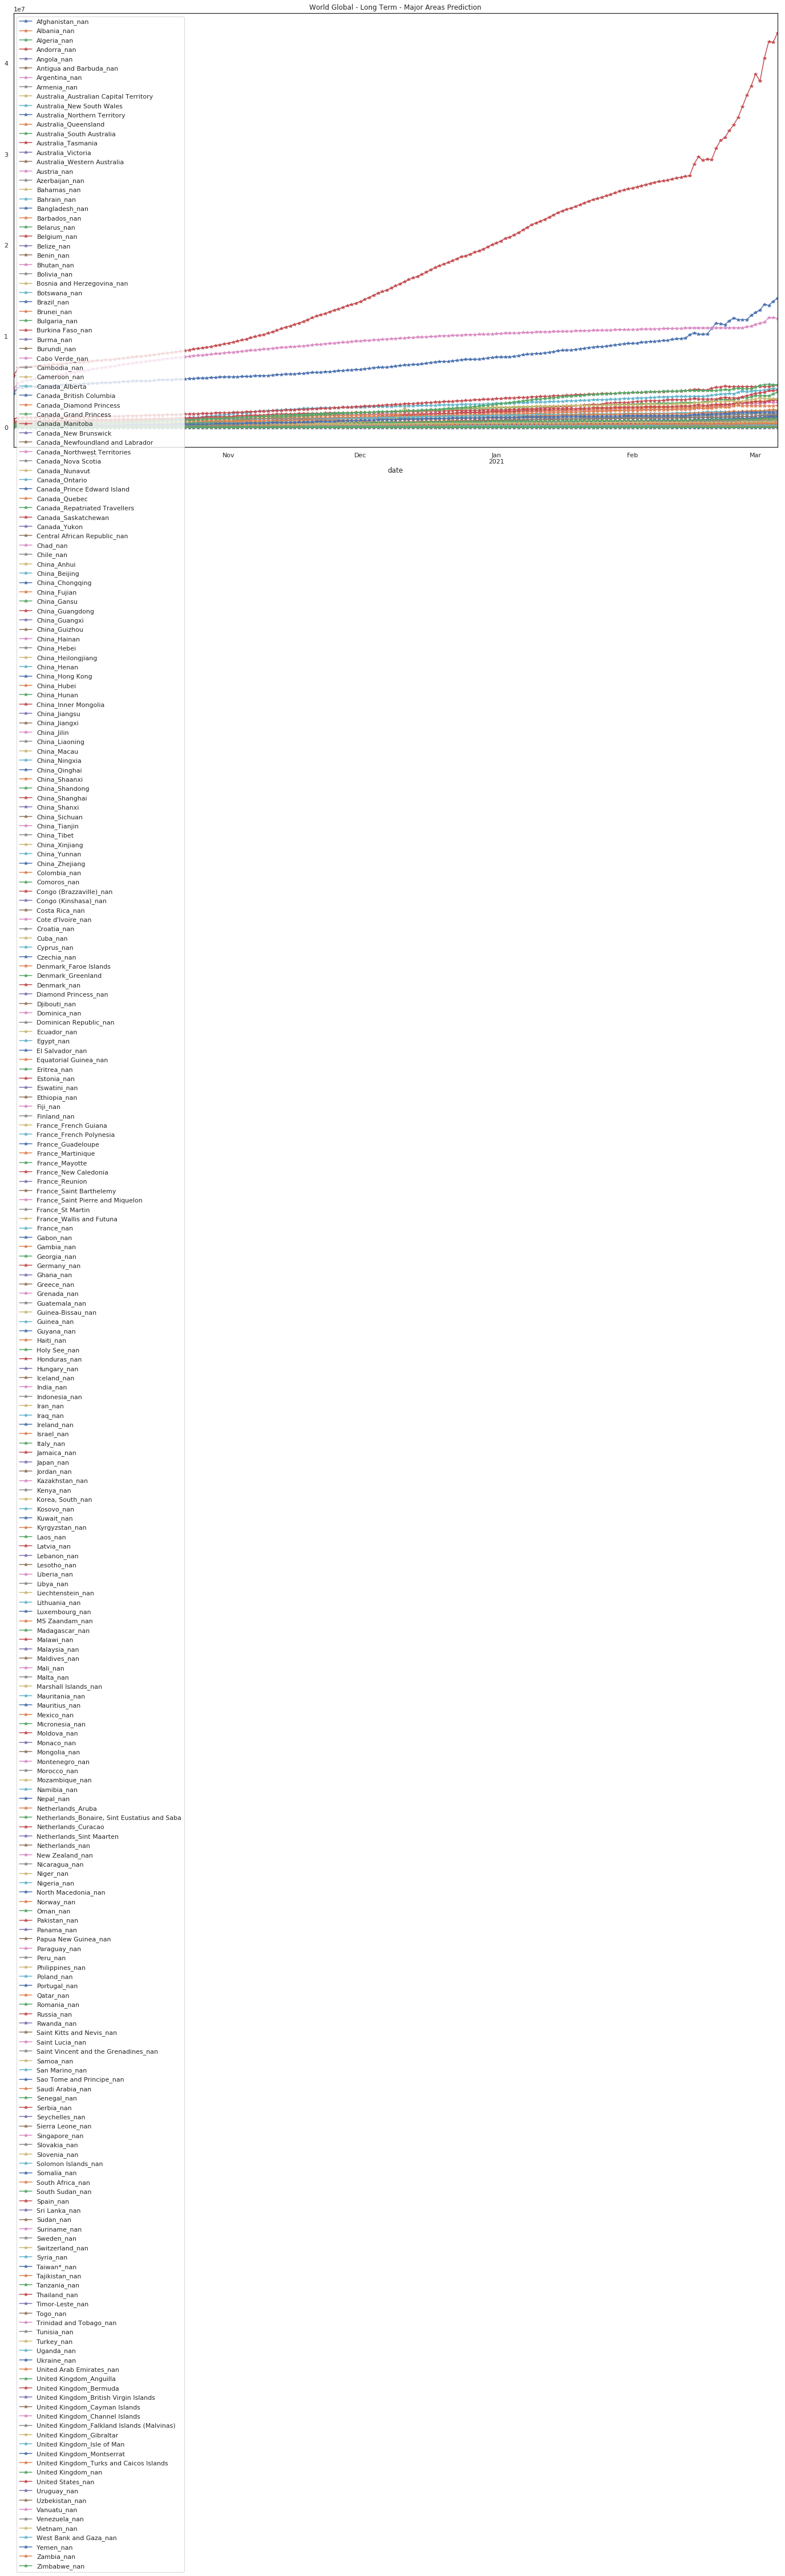

In [80]:
#region=my_train_list
pv2=pred
pv2[:].plot(marker='*',figsize=(24,14),title ='World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()


## Prediction Heatmap

In [81]:
pv1=pv2[:] #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)

In [82]:
p[45:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-10-28          41300.0      20013.0      57140.0       4410.0   
2020-10-29          41425.0      20275.0      57450.0       4517.0   
2020-10-30          41499.0      20619.0      57768.0       4665.0   
2020-10-31          41592.0      20844.0      58064.0       4665.0   
2020-11-01          41664.0      21212.0      58384.0       4756.0   
2020-11-02          41786.0      21479.0      58689.0       4825.0   
2020-11-03          41882.0      21859.0      59077.0       4888.0   
2020-11-04          41975.0      22229.0      59611.0       5105.0   
2020-11-05          42095.0      22648.0      60251.0       5045.0   
2020-11-06          42140.0      23124.0      60897.0       5135.0   
2020-11-07          42203.0      23588.0      61487.0       5487.0   
2020-11-08          42317.0      24096.0      62132.0       5319.0   
2020-11-09          42442.0      24625.0      62767.0       5383.0   
2020-11-10          42611.0      25173.0      63488.0       5463.0   
2020-11-11          42762.0      25675.0      64294.0       5549.0   
2020-11-12          42944.0      26132.0      65142.0       5567.0   
2020-11-13          43116.0      26652.0      66017.0       5669.0   
2020-11-14          43193.0      27132.0      66864.0       5725.0   
2020-11-15          43385.0      27707.0      67711.0       5988.0   
2020-11-16          43591.0      28302.0      68608.0       5872.0   
2020-11-17          43804.0      28997.0      69593.0       5933.0   
2020-11-18          44055.0      29687.0      70635.0       6026.0   
2020-11-19          44302.0      30469.0      71668.0       6018.0   
2020-11-20          44496.0      31285.0      72760.0       6080.0   
2020-11-21          44647.0      32029.0      73797.0       6142.0   
2020-11-22          44833.0      32657.0      74858.0       6207.0   
2020-11-23          45094.0      33459.0      75878.0       6256.0   
2020-11-24          45291.0      34130.0      76974.0       6304.0   
2020-11-25          45513.0      34809.0      78033.0       6363.0   
2020-11-26          45728.0      35508.0      79095.0       6428.0   
...                     ...          ...          ...          ...   
2021-02-05          55444.0      83061.0     108769.0      10137.0   
2021-02-06          55503.0      84192.0     108800.0      10172.0   
2021-02-07          55518.0      85321.0     109136.0      10206.0   
2021-02-08          55535.0      86290.0     109495.0      10251.0   
2021-02-09          55560.0      87449.0     109685.0      10275.0   
2021-02-10          55577.0      88644.0     109932.0      10312.0   
2021-02-11          55598.0      89734.0     110176.0      10352.0   
2021-02-12          55624.0      90801.0     110444.0      10391.0   
2021-02-13          55652.0      91923.0     110657.0      10427.0   
2021-02-14          55659.0      96212.0     114690.0      10500.0   
2021-02-15          55657.0      97578.0     116394.0      10626.0   
2021-02-16          56952.0      96761.0     115500.0      10947.0   
2021-02-17          57212.0      97544.0     115578.0      11376.0   
2021-02-18          59521.0      97773.0     115866.0      11415.0   
2021-02-19          60019.0     102973.0     116157.0      11418.0   
2021-02-20          59845.0     105233.0     116113.0      11418.0   
2021-02-21          62935.0     105456.0     116113.0      11635.0   
2021-02-22          63511.0     106349.0     116221.0      11775.0   
2021-02-23          63386.0     105985.0     116221.0      11775.0   
2021-02-24          63458.0     106357.0     120989.0      12241.0   
2021-02-25          63670.0     106357.0     123100.0      12351.0   
2021-02-26          64094.0     112038.0     122298.0      12351.0   
2021-02-27          64101.0     114917.0     126434.0      12351.0   
2021-02-28          65737.0     113381.0     127733.0      12351.0   
2021-03-01

In [83]:
pfname='data/p+'+str(num_days_R_prediction)+'_confirmed_daily.csv'
p.to_csv(pfname, index = False, header=True)

In [84]:
#!pip install gmplot
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [85]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
### JOAO - Change Global HeapMap print - USA is too small, as USA States datasets are not used! 
#heatmap=heatmap[heatmap['region'].isin(region)]  ## heatmap for region dataset only 
heatmap=heatmap[heatmap['region'].isin(confirmed['region'])] ## Global heatmap
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')


In [86]:
heatmap_m[:]

region        Lat        Long  \
0                               Afghanistan_nan  33.939110   67.709953   
1                                   Albania_nan  41.153300   20.168300   
2                                   Algeria_nan  28.033900    1.659600   
3                                   Andorra_nan  42.506300    1.521800   
4                                    Angola_nan -11.202700   17.873900   
5                       Antigua and Barbuda_nan  17.060800  -61.796400   
6                                 Argentina_nan -38.416100  -63.616700   
7                                   Armenia_nan  40.069100   45.038200   
8        Australia_Australian Capital Territory -35.473500  149.012400   
9                     Australia_New South Wales -33.868800  151.209300   
10                 Australia_Northern Territory -12.463400  130.845600   
11                         Australia_Queensland -27.469800  153.025100   
12                    Australia_South Australia -34.928500  138.600700   
13                           Australia_Tasmania -42.882100  147.327200   
14                           Australia_Victoria -37.813600  144.963100   
15                  Australia_Western Australia -31.950500  115.860500   
16                                  Austria_nan  47.516200   14.550100   
17                               Azerbaijan_nan  40.143100   47.576900   
18                                  Bahamas_nan  25.025885  -78.035889   
19                                  Bahrain_nan  26.027500   50.550000   
20                               Bangladesh_nan  23.685000   90.356300   
21                                 Barbados_nan  13.193900  -59.543200   
22                                  Belarus_nan  53.709800   27.953400   
23                                  Belgium_nan  50.833300    4.469936   
24                                   Belize_nan  17.189900  -88.497600   
25                                    Benin_nan   9.307700    2.315800   
26                                   Bhutan_nan  27.514200   90.433600   
27                                  Bolivia_nan -16.290200  -63.588700   
28                   Bosnia and Herzegovina_nan  43.915900   17.679100   
29                                 Botswana_nan -22.328500   24.684900   
..                                          ...        ...         ...   
249                                Thailand_nan  15.870032  100.992541   
250                             Timor-Leste_nan  -8.874217  125.727539   
251                                    Togo_nan   8.619500    0.824800   
252                     Trinidad and Tobago_nan  10.691800  -61.222500   
253                                 Tunisia_nan  33.886917    9.537499   
254                                  Turkey_nan  38.963700   35.243300   
255                           United States_nan  40.000000 -100.000000   
256                                  Uganda_nan   1.373333   32.290275   
257                                 Ukraine_nan  48.379400   31.165600   
258                    United Arab Emirates_nan  23.424076   53.847818   
259                     United Kingdom_Anguilla  18.220600  -63.068600   
260                      United Kingdom_Bermuda  32.307800  -64.750500   
261       United Kingdom_British Virgin Islands  18.420700  -64.640000   
262               United Kingdom_Cayman Islands  19.313300  -81.254600   
263              United Kingdom_Channel Islands  49.372300   -2.364400   
264  United Kingdom_Falkland Islands (Malvinas) -51.796300  -59.523600   
265                    United Kingdom_Gibraltar  36.140800   -5.353600   
266                  United Kingdom_Isle of Man  54.236100   -4.548100   
267                   United Kingdom_Montserrat  16.742498  -62.187366   
268     United Kingdom_Turks and Caicos Islands  21.694000  -71.797900   
269                          United Kingdom_nan  55.378100   -3.436000   
270                                 Uruguay_nan -32.522800  -55.765800   
271                              Uzbekistan_n

In [87]:
# Fill empty lat,long with 0
heatmap_m['Lat']=heatmap_m['Lat'].fillna(0)
heatmap_m['Long']=heatmap_m['Long'].fillna(0)
#
heatmap_m_fn="heatmap_m_"+str(num_days_R_prediction)+".csv"
heatmap_m.to_csv(r'data/'+heatmap_m_fn, index = False, header=True)

In [88]:
#!pip install folium
import folium
import re

lat=40.99474
lang=6.87237

p21_cluster=folium.Map(location=[lat,lang],zoom_start=2)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction

for lat,lng,num,totpred,ldaygrowth in zip(heatmap_m.Lat,heatmap_m.Long,range(0,heatmap_m.shape[0]), heatmap_m[heatmap_m.columns[-1]],  (heatmap_m[heatmap_m.columns[-1]]-heatmap_m[heatmap_m.columns[ndayarray]])/ndaysavg ):
    use_color=heatmap_m['region'][num][0]
    print_region=re.sub('_nan',  '', heatmap_m['region'][num])
    popup = folium.Popup( print_region+' ConfirmedPred='+str(round(totpred))+' Roling7DayAVG='+str(round(ldaygrowth))+' Date='+date_pred , parse_html=True)
    #
    folium.Marker(
                    [lat,lng],
                    popup=popup,
                    icon=folium.Icon(color=colors[use_color])
            ).add_to(p21_cluster)
p21_cluster

In [89]:
# Top 50 Regions in the World impacted
#
max_cont=max_countries_map
region_m2=region[:max_cont]
#
heatmap_m2=heatmap_m[heatmap_m['region'].isin(region_m2)].reset_index()
#
heatmap_m2[:]

index                    region        Lat        Long  \
0       6             Argentina_nan -38.416100  -63.616700   
1      16               Austria_nan  47.516200   14.550100   
2      17            Azerbaijan_nan  40.143100   47.576900   
3      20            Bangladesh_nan  23.685000   90.356300   
4      22               Belarus_nan  53.709800   27.953400   
5      23               Belgium_nan  50.833300    4.469936   
6      27               Bolivia_nan -16.290200  -63.588700   
7      30                Brazil_nan -14.235000  -51.925300   
8      32              Bulgaria_nan  42.733900   25.485800   
9      51            Canada_Ontario  51.253800  -85.323200   
10     53             Canada_Quebec  52.939900  -73.549100   
11     59                 Chile_nan -35.675100  -71.543000   
12     93              Colombia_nan   4.570900  -74.297300   
13    102               Czechia_nan  49.817500   15.473000   
14    110               Ecuador_nan  -1.831200  -78.183400   
15    131                France_nan  46.227600    2.213700   
16    136               Germany_nan  51.165691   10.451526   
17    148               Hungary_nan  47.162500   19.503300   
18    150                 India_nan  20.593684   78.962880   
19    151             Indonesia_nan  -0.789300  113.921300   
20    152                  Iran_nan  32.427908   53.688046   
21    153                  Iraq_nan  33.223191   43.679291   
22    155                Israel_nan  31.046051   34.851612   
23    156                Israel_nan  31.046051   34.851612   
24    157                 Italy_nan  41.871940   12.567380   
25    159                 Japan_nan  36.204824  138.252924   
26    160                Jordan_nan  31.240000   36.510000   
27    169               Lebanon_nan  33.854700   35.862300   
28    170               Lebanon_nan  33.854700   35.862300   
29    187                Mexico_nan  23.634500 -102.552800   
30    193               Morocco_nan  31.791700   -7.092600   
31    201           Netherlands_nan  52.132600    5.291300   
32    209              Pakistan_nan  30.375300   69.345100   
33    210                Panama_nan   8.538000  -80.782100   
34    213                  Peru_nan  -9.190000  -75.015200   
35    214           Philippines_nan  12.879721  121.774017   
36    215                Poland_nan  51.919400   19.145100   
37    216              Portugal_nan  39.399900   -8.224500   
38    218               Romania_nan  45.943200   24.966800   
39    219                Russia_nan  61.524010  105.318756   
40    227          Saudi Arabia_nan  23.885942   45.079162   
41    229                Serbia_nan  44.016500   21.005900   
42    233              Slovakia_nan  48.669000   19.699000   
43    237          South Africa_nan -30.559500   22.937500   
44    239                 Spain_nan  40.463667   -3.749220   
45    243                Sweden_nan  60.128161   18.643501   
46    244           Switzerland_nan  46.818200    8.227500   
47    254                Turkey_nan  38.963700   35.243300   
48    255         United States_nan  40.000000 -100.000000   
49    257               Ukraine_nan  48.379400   31.165600   
50    258  United Arab Emirates_nan  23.424076   53.847818   
51    269        United Kingdom_nan  55.378100   -3.436000   

    2020-09-13 00:00:00  2020-09-14 00:00:00  2020-09-15 00:00:00  \
0              501041.0             555537.0             577470.0   
1               51012.0              51341.0              33541.0   
2               55464.0              55530.0              38403.0   
3              313219.0             337520.0             339372.0   
4               86345.0              86507.0              74360.0   
5              102957.0             103690.0              94306.0   
6              131676.0             132389.0             127619.0   
7             3753139.0            4330455.0            4380193.0   
8               37882.0              38005.0              18061.0   
9               62492.0    

In [90]:
import folium
import re

lat=40.99474
lang=6.87237

p21_reg_cluster=folium.Map(location=[lat,lang],zoom_start=2)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_reg_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction

for lat2,lng2,num2,totpred2,ldaygrowth2 in zip(heatmap_m2.Lat,heatmap_m2.Long,range(0,heatmap_m2.shape[0]), heatmap_m2[heatmap_m2.columns[-1]], (heatmap_m2[heatmap_m2.columns[-1]]-heatmap_m2[heatmap_m2.columns[ndayarray]])/ndaysavg ):
    use_color2=heatmap_m2['region'][num2][0]
    print_region=re.sub('_nan',  '', heatmap_m2['region'][num2])
    popup2 = folium.Popup( print_region+' ConfirmedPred='+str(round(totpred2))+' Roling7DayAVG='+str(round(ldaygrowth2))+' Date='+date_pred , parse_html=True)  
    #
    folium.Marker(
                    [lat2,lng2],
                    popup=popup2,
                    icon=folium.Icon(color=colors[use_color2])
            ).add_to(p21_reg_cluster)
p21_reg_cluster

In [91]:
#
datemap=datetime.today().strftime('%Y-%m-%d')
p21_cluster.save("heatmaps/Heatmap_Folium-Global-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")
#
p21_reg_cluster.save("heatmaps/Heatmap_Folium-Regional-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")

In [92]:
print("Stats and Forecast Done for Today!")
print("I'm done with this past month of March, April and May!")
print(" April-May-June-July are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this past month of March, April and May!
 April-May-June-July are going to be hard with this Global Lock-Down!


In [93]:
exit()